# Kaggle Challenge 4-1
Kaggle의 PlayGrounds Series에 참가해보려고 한다. Season 4-1은 Bianry Classification with a Bank Churn Dataset 문제이다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/train.csv')
test_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/test.csv')
answer_df = test_df[['id']]

In [2]:
train_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


not null set이므로, 결측치에 대한 처리는 고려하지 않는다.

이번 문제는, train은 Exited는 binary로 주어지나, test는 Exited가 나올 확률을 예측하는 것이 목적이다.

## Feature 설명

- Id : 컬럼 구분 id
- CustomerId : 고객번호
- Surname : 성씨
- Credit Score : 신용점수. 높을수록 대출을 받기 좋은 상황
- Geography : 지역
- Gender : 성별
- Age : 나이
- Tenure : 몇년동안 은행서비스, 계좌서비스 등을 이용했는가?
- Balance : 은행 잔고
- NumOfProducts : 소지한 주요 상품 수
- HasCrCard: 신용 카드를 가지고 있는가?
- IsActivenumber : 신용카드가 유효한가?
- EstimatedSalary : 추정 급여

## EDA

In [5]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


아무리 생각해도 id, 고객id, 이름에 따라서 뭐가 달라질거 같지는 않다.

### creditscore

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

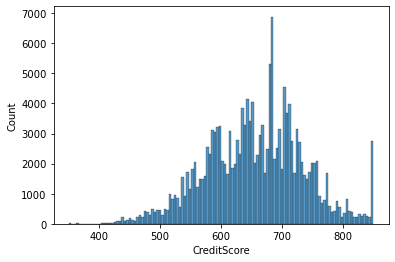

In [6]:
sns.histplot(train_df['CreditScore'])

600~700사이에서 다수가 분포해있다. 800 이상의 고신용이나 500 이하의 저신용은 드물다. 
통계적 확인은 필요하겠으나, 정규분포에 나쁘지 않게 분포했을 것이다. 다만, 신용점수는 "절대평가"임을 고려해야한다.

In [7]:
train_df['CreditScore'].describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

최소 350점 ~ 최대 850점의 분포이다.
REMARK. kaggle에서 관련 토론 자료를 확인해본 결과 해당 데이터셋의 신용점수 기준이 최하 350, 최대 850이다.

나중에 predict때, 결국 확률을 예측해야 하므로, 적절한 scaler가 필요하다. scaler는 절대평가를 반영, Min-Max로 진행한다.

### geography

In [8]:
train_df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

단 3개의 지역만이 주어져 있다. 지역의 경우는 국가의 경제 상황에 따라서 대출 허용 빈도 등이 달라질 수 있다.
따라서 국가의 변수를 무시할 수만은 없을 것이다.

### Gender

In [9]:
train_df['Gender'].value_counts()

Male      93150
Female    71884
Name: Gender, dtype: int64

Gender의 변수는 고려 여부 자체를 결정해야 할 것 같다.

### Age

우선, info에서 Age에 이상 현상이 발견된 것으로 추정된다. 그 이유가, Age는 정수형이어야 하는데 float으로 인식되고 있다.

In [10]:
# 정수형이 아닌 것이 있는지 체크
for x in train_df['Age']:
    if x-round(x) != 0:
        print(x)

36.44
32.34


정수형 변수가 아닌 것이 발견되어, 이에 대한 전처리가 반드시 필요하다.! 반올림으로 처리하자.

<AxesSubplot:xlabel='Age', ylabel='Count'>

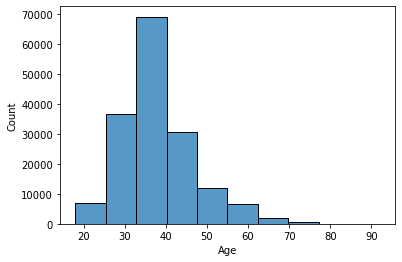

In [11]:
sns.histplot(train_df['Age'], bins = 10)

20살 이하, 30살, 40살, 50살, 60살, 60살 초과로 나누자.
그리고 one-hot

### Tenure

정수형으로 나타나고 있다.

In [12]:
train_df['Tenure'].value_counts()

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

값의 범위가 넓지 않다. 이것도 사용년수이나 클수록 이탈율에 어떤 영향을 미칠지 모르기 때문에, 역시 전처리 전에 관계 분석이 필요

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Count'>

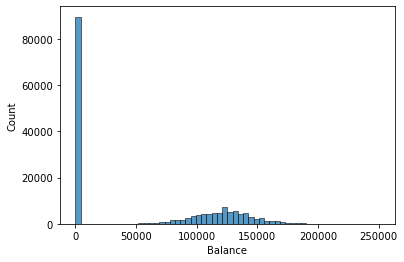

In [13]:
sns.histplot(train_df['Balance'])

잔액은 없는 사람이 더 많은 이상 현상이 보인다. 얼마나 관계성이 있는지 따로 봐야 할듯 하다.

### NumOfProducts

In [14]:
train_df['NumOfProducts'].value_counts()

2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

주요 상품이 4개 정도로 한정되어 있는것으로 보인다. 

### HasCrCard, isActiveMember

In [15]:
train_df['HasCrCard'].value_counts()

1.0    124428
0.0     40606
Name: HasCrCard, dtype: int64

75% 정도는 카드를 가지고 있다.

In [16]:
train_df['IsActiveMember'].value_counts()

0.0    82885
1.0    82149
Name: IsActiveMember, dtype: int64

카드를 가지고 있는 사람중 60~70% 정도만이 카드가 활성화되어있다.

### EstimatedSalary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

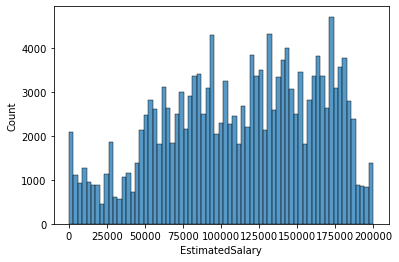

In [17]:
sns.histplot(train_df['EstimatedSalary'])

급여 분포는 다음과 같다. 이것도 0에서 최댓값을 뺀 것으로 해야 scaler이 통일되므로 max에서 계산하자.

### Exited

In [18]:
train_df['Exited'].value_counts()

0    130113
1     34921
Name: Exited, dtype: int64

y변수가 불균형하다. 불균형에 대처하는 방법에 대해 고민해야 할 것이다.

## 전처리

이번 문제에서는 결정적으로 "확률" 자체를 예측해야 한다. 따라서, 클래스를 예측하였더라도, 확률값을 돌려줄 수 있는 모델을 생각해야 한다. 분류모델들에서 확률값을 돌려주는 기능이 포함되어 있다. 지울 필요 없다.

In [19]:
train_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


- id, CustomerId, Surname : drop
- creditScore : Min_max Scaler를 활용하자. (x-350)/500 으로 하면 된다.
- Geography, Gender : One-Hot Encoding
- Age : Min-Max Scaler를 활용하자.
- Tenure : 역시 연차가 높을수록 균일하게 높은 가중치를 주게 Min_Max Scaler
- Num of Products : 동일하게 진행
- Estimated Salary : 평균 연봉과의 차이를 고려하기 위해 이것은 Standard Scaler로 진행
- HasCrCard, IsActiveMember: 그대로 진행

문제는 Balance다. 이것이 얼마나 영향이 있는지를 봐야 할 거 같다.

In [20]:
train_df_nobal = train_df.loc[train_df.Balance == 0]
train_df_nobal['Exited'].value_counts()

0    75156
1    14492
Name: Exited, dtype: int64

In [21]:
train_df_bal = train_df.loc[train_df.Balance != 0]
train_df_bal['Exited'].value_counts()

0    54957
1    20429
Name: Exited, dtype: int64

0의 값이 너무 많아서 그대로 사용은 어려울 것 같으나 0이냐 아니냐에 따라는 유의미한 차이를 보이고 있어 binary화 시키자
잔고가 있으면 1 없으면 0

In [22]:
# drop
train_df = train_df.drop(['id', 'CustomerId', 'Surname'], axis = 1)
test_df = test_df.drop(['id', 'CustomerId', 'Surname'], axis = 1)

In [23]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns = ['Geography', 'Gender'])
test_df = pd.get_dummies(test_df, columns = ['Geography', 'Gender'])

In [24]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1,1,0


잔고에 대해서 0-1과 min-max를 실험해보자.

In [25]:
#train_df['is_bal'] = train_df['Balance'].apply(lambda x : 1 if x > 0 else 0)
#test_df['is_bal'] = test_df['Balance'].apply(lambda x : 1 if x > 0 else 0)
#train_df = train_df.drop(['Balance'], axis = 1)
#test_df = test_df.drop(['Balance'], axis = 1)

max_bal = max(train_df['Balance'])
train_df['Balance'] = train_df.Balance.apply(lambda x : x/max_bal)
test_df['Balance'] = test_df.Balance.apply(lambda x : x/max_bal)

나이는 값을 나누고 전처리

In [26]:
train_df['Age'] = train_df['Age'].apply(lambda x: int(x))
test_df['Age'] = test_df['Age'].apply(lambda x: int(x))

테뉴어와 Product는 값이 명백하므로, 이에 대한 변환은 쉽게 하자.

In [27]:
def get_gen(x):
    if x < 20:
        return 'under_20s'
    elif x < 30:
        return '20s'
    elif x < 40:
        return '30s'
    elif x < 50:
        return '40s'
    elif x < 60:
        return '50s'
    else:
        return 'over_60s'
    
train_df['age_gen'] = train_df.Age.apply(lambda x : get_gen(x))
test_df['age_gen'] = test_df.Age.apply(lambda x : get_gen(x))
train_df = pd.get_dummies(train_df, columns = ['age_gen'])
test_df = pd.get_dummies(test_df, columns = ['age_gen'])

In [28]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,age_gen_20s,age_gen_30s,age_gen_40s,age_gen_50s,age_gen_over_60s,age_gen_under_20s
0,668,33,3,0.000000,2,1.0,0.0,181449.97,0,1,0,0,0,1,0,1,0,0,0,0
1,627,33,1,0.000000,2,1.0,1.0,49503.50,0,1,0,0,0,1,0,1,0,0,0,0
2,678,40,10,0.000000,2,1.0,0.0,184866.69,0,1,0,0,0,1,0,0,1,0,0,0
3,581,34,2,0.593398,1,1.0,1.0,84560.88,0,1,0,0,0,1,0,1,0,0,0,0
4,716,33,5,0.000000,2,1.0,1.0,15068.83,0,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33,2,0.000000,1,1.0,1.0,131834.75,0,0,0,1,1,0,0,1,0,0,0,0
165030,792,35,3,0.000000,1,0.0,0.0,131834.45,0,1,0,0,0,1,0,1,0,0,0,0
165031,565,31,5,0.000000,1,1.0,1.0,127429.56,0,1,0,0,0,1,0,1,0,0,0,0
165032,554,30,7,0.643819,1,0.0,1.0,71173.03,0,0,0,1,1,0,0,1,0,0,0,0


In [29]:
train_df['Tenure'] = train_df.Tenure.apply(lambda x : x/10)
test_df['Tenure'] = test_df.Tenure.apply(lambda x : x/10)
train_df['NumOfProducts'] = train_df.NumOfProducts.apply(lambda x: x/4)
test_df['NumOfProducts'] = test_df.NumOfProducts.apply(lambda x : x/4)
train_df['CreditScore'] = train_df.CreditScore.apply(lambda x : (x-350)/500)
test_df['CreditScore'] = test_df.CreditScore.apply(lambda x: (x-350)/500)

In [30]:
#train과 test에서의 scaler 기준은 동일해야 하므로, train의 급여 최댓값으로만 나눈다. 
# 그리고 0은 아예 0이어야 하여 최소를 강제로 0으로 
max_sal = max(train_df['EstimatedSalary'])
train_df['EstimatedSalary'] = train_df.EstimatedSalary.apply(lambda x : x/max_sal)
test_df['EstimatedSalary'] = test_df.EstimatedSalary.apply(lambda x : x/max_sal)

## Logistic Regression 이용

우선은 로지스틱 리그레션을 이용하고, 그 뒤로는 그냥 회귀모델을 이용해버리자.

In [31]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Exited'], axis = 1)
y = train_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

우선은 깡으로 모델을 만든 뒤에 좀 더 예측률을 높여보자!
채점에 사용되는 지표로 평가한다 (roc-auc score)

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [33]:
roc_auc_score(pred, y_test)

0.7804783339815646

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_test)

array([[24779,  4058],
       [ 1244,  2926]], dtype=int64)

실제로 proba를 좀 봐볼까?

In [35]:
proba = model.predict_proba(X_test)
print(proba)

[[0.76465186 0.23534814]
 [0.97318916 0.02681084]
 [0.94268484 0.05731516]
 ...
 [0.98835915 0.01164085]
 [0.98278737 0.01721263]
 [0.90813667 0.09186333]]


이렇게 class가 1일 확률을 예측 가능하다만...

### 다른 모델은 불가능할까? 예를들어...랜덤포레스트

된다!

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 7, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(roc_auc_score(pred, y_test))

0.8223463559905932


depth_7 일때가 0.55 정도로 상승률이 좋은 시점이라, 이 깊이를 과적합을 막기 위해 사용해보자.

In [37]:
proba = model.predict_proba(X_test)
print(proba)

[[0.84935352 0.15064648]
 [0.54200702 0.45799298]
 [0.9617805  0.0382195 ]
 ...
 [0.93971869 0.06028131]
 [0.97691832 0.02308168]
 [0.89802434 0.10197566]]


앞에처럼 예측 모델이 확률을 제시한다!

### 예시답안 제출

한번 답안지를 만들어보자

In [38]:
final_pred = model.predict_proba(test_df)

In [39]:
def get_final_df(final_pred):
    ans_list = []
    for f in final_pred:
        ans_list.append(f[1])
    answer_df['Exited'] = ans_list
    answer_df.to_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/answer.csv', index = False)
    
#get_final_df(final_pred)

우선 LightGBM을 써보자

In [40]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth = 6, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(roc_auc_score(pred, y_test))

0.8167407199489611


LGBM을 기준 모델로 만든다
다만, 이번에는 전체를 학습시켜서 학습 성능을 올리자

In [41]:
model = LGBMClassifier(max_depth = 6, random_state = 42)
model.fit(X, y)

final_pred = model.predict_proba(test_df)
#get_final_df(final_pred)

### 다른 모델 사용

In [42]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print(roc_auc_score(pred, y_test))

나이브 베이즈는 부적합

### Automl 도입

In [43]:
# pip install pycaret
#from pycaret.classification import *
# train_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/train.csv')
#exp_class = setup(data = train_df, target = 'Exited', session_id = 42)

In [44]:
# best_model = compare_models(fold=3, sort='f1')

gbc가 여기서는 가장 좋은 성능을 보인다. 문제에서는 AUC도 물었기에 두개 모두를 참고하면.. gbc를 고려해볼 법 하다

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = 3, n_estimators = 150, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(roc_auc_score(pred, y_test))

0.8177444949707364


5가 적합한 느낌이다. 적용해보자

In [46]:
# model = GradientBoostingClassifier(max_depth = 5, random_state = 42, n_estimators = 150)
# model.fit(X, y)

# final_pred_gbm = model.predict_proba(test_df)
# #get_final_df(final_pred)

### catboost?

범주형 변수가 많아서, catboost의 사용을 고려해 볼 수 있다.

In [47]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(max_depth = 5, random_state = 42, n_estimators = 150)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(roc_auc_score(pred, y_test))

Learning rate set to 0.472043
0:	learn: 0.4877187	total: 179ms	remaining: 26.7s
1:	learn: 0.4098456	total: 193ms	remaining: 14.3s
2:	learn: 0.3703782	total: 205ms	remaining: 10.1s
3:	learn: 0.3490124	total: 216ms	remaining: 7.89s
4:	learn: 0.3389827	total: 227ms	remaining: 6.6s
5:	learn: 0.3319534	total: 239ms	remaining: 5.74s
6:	learn: 0.3285749	total: 250ms	remaining: 5.1s
7:	learn: 0.3259156	total: 261ms	remaining: 4.63s
8:	learn: 0.3249386	total: 272ms	remaining: 4.26s
9:	learn: 0.3240353	total: 283ms	remaining: 3.97s
10:	learn: 0.3230219	total: 295ms	remaining: 3.73s
11:	learn: 0.3224873	total: 307ms	remaining: 3.53s
12:	learn: 0.3221003	total: 319ms	remaining: 3.36s
13:	learn: 0.3216598	total: 331ms	remaining: 3.21s
14:	learn: 0.3212244	total: 342ms	remaining: 3.07s
15:	learn: 0.3207641	total: 353ms	remaining: 2.96s
16:	learn: 0.3205657	total: 364ms	remaining: 2.85s
17:	learn: 0.3203659	total: 377ms	remaining: 2.77s
18:	learn: 0.3201986	total: 388ms	remaining: 2.68s
19:	learn: 0.

In [48]:
# model = CatBoostClassifier(max_depth = 5, random_state = 42, n_estimators = 150)
# model.fit(X, y)

# final_pred = model.predict_proba(test_df)
# get_final_df(final_pred)

catboost, lgbm, gbm 3개가 최적이다. 이 3개의 평균을 내보자

### model ensemble

In [49]:
#model_lgbmc = LGBMClassifier(max_depth = 6, random_state = 42)
#model_lgbmc.fit(X, y)

#final_pred_lgbm = model.predict_proba(test_df)

#model_gbc = GradientBoostingClassifier(max_depth = 5, random_state = 42, n_estimators = 150)
#model_gbc.fit(X, y)

#final_pred_gbm = model.predict_proba(test_df)

#model_cbc= CatBoostClassifier(max_depth = 5, random_state = 42, n_estimators = 150)
#model_cbc.fit(X, y)

#final_pred_cat = model.predict_proba(test_df)

In [50]:
#final_ensemble = (final_pred_lgbm + final_pred_gbm + final_pred_cat)/3
# get_final_df(final_ensemble)

직접 scikit-learn으로도 구현이 된다. 한번 해보자

In [51]:
from sklearn.ensemble import VotingClassifier
#vo_clf = VotingClassifier(estimators = [('lgbm',model_lgbmc),
#                                        ('gb', model_gbc),
#                                        ('cb', model_cbc)], voting = 'soft')
#vo_clf.fit(X, y)
#final_ensemble_voclf = vo_clf.predict_proba(test_df)
#get_final_df(final_ensemble_voclf)

위의 경우가 현재의 베스트다.....

## GridSearchCV

GBC가 너무 오래 걸린다. lgbm, cbc, random forest 3개를 섞어서 하자.

In [54]:
#lgbm
from sklearn.model_selection import GridSearchCV
'''
params = {
    'max_depth' : [3, 4, 5, 6, 7],
    'objective' : ['binary'],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators':[50, 100, 150, 200]
}
lgbm = LGBMClassifier()
grid_model = GridSearchCV(lgbm, param_grid = params, cv = 3, scoring = 'roc_auc')
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
'''
# LR 0.1 DEPTH4 ESTM 150이 최적

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'objective': 'binary'}


In [55]:
#cbc
'''
params = {
    'max_depth' : [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators':[50, 100, 150, 200]
}
cbc = CatBoostClassifier()
grid_model = GridSearchCV(cbc, param_grid = params, cv = 3, scoring = 'roc_auc')
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
'''
# {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

0:	learn: 0.6429218	total: 8ms	remaining: 392ms
1:	learn: 0.6018741	total: 14.7ms	remaining: 352ms
2:	learn: 0.5680603	total: 20.8ms	remaining: 327ms
3:	learn: 0.5398551	total: 26.7ms	remaining: 307ms
4:	learn: 0.5149921	total: 33.2ms	remaining: 299ms
5:	learn: 0.4943322	total: 39.3ms	remaining: 288ms
6:	learn: 0.4771306	total: 46.9ms	remaining: 288ms
7:	learn: 0.4613162	total: 52.8ms	remaining: 277ms
8:	learn: 0.4476043	total: 59ms	remaining: 269ms
9:	learn: 0.4357805	total: 68.8ms	remaining: 275ms
10:	learn: 0.4257956	total: 77.7ms	remaining: 275ms
11:	learn: 0.4160669	total: 84.7ms	remaining: 268ms
12:	learn: 0.4082517	total: 93.3ms	remaining: 266ms
13:	learn: 0.4015984	total: 99.9ms	remaining: 257ms
14:	learn: 0.3950180	total: 107ms	remaining: 251ms
15:	learn: 0.3896407	total: 113ms	remaining: 240ms
16:	learn: 0.3840457	total: 120ms	remaining: 232ms
17:	learn: 0.3789940	total: 126ms	remaining: 224ms
18:	learn: 0.3750807	total: 132ms	remaining: 215ms
19:	learn: 0.3713444	total: 141m

27:	learn: 0.3494472	total: 187ms	remaining: 480ms
28:	learn: 0.3479769	total: 195ms	remaining: 477ms
29:	learn: 0.3458587	total: 202ms	remaining: 472ms
30:	learn: 0.3444492	total: 208ms	remaining: 464ms
31:	learn: 0.3427776	total: 216ms	remaining: 458ms
32:	learn: 0.3416178	total: 222ms	remaining: 451ms
33:	learn: 0.3406428	total: 245ms	remaining: 475ms
34:	learn: 0.3392555	total: 251ms	remaining: 466ms
35:	learn: 0.3384699	total: 258ms	remaining: 458ms
36:	learn: 0.3373080	total: 264ms	remaining: 449ms
37:	learn: 0.3363432	total: 270ms	remaining: 441ms
38:	learn: 0.3355874	total: 277ms	remaining: 434ms
39:	learn: 0.3349427	total: 284ms	remaining: 426ms
40:	learn: 0.3340484	total: 291ms	remaining: 418ms
41:	learn: 0.3334270	total: 297ms	remaining: 410ms
42:	learn: 0.3328877	total: 303ms	remaining: 402ms
43:	learn: 0.3323275	total: 309ms	remaining: 393ms
44:	learn: 0.3318169	total: 315ms	remaining: 385ms
45:	learn: 0.3312659	total: 322ms	remaining: 378ms
46:	learn: 0.3308957	total: 328

0:	learn: 0.6435783	total: 8.65ms	remaining: 856ms
1:	learn: 0.6035787	total: 16.6ms	remaining: 815ms
2:	learn: 0.5696536	total: 22.8ms	remaining: 737ms
3:	learn: 0.5416188	total: 29.7ms	remaining: 712ms
4:	learn: 0.5176342	total: 35.5ms	remaining: 674ms
5:	learn: 0.4976033	total: 41.4ms	remaining: 649ms
6:	learn: 0.4792625	total: 48ms	remaining: 638ms
7:	learn: 0.4636159	total: 54.2ms	remaining: 623ms
8:	learn: 0.4504512	total: 60.5ms	remaining: 612ms
9:	learn: 0.4382143	total: 66.8ms	remaining: 602ms
10:	learn: 0.4282461	total: 73ms	remaining: 591ms
11:	learn: 0.4187118	total: 83.3ms	remaining: 611ms
12:	learn: 0.4112873	total: 93.6ms	remaining: 626ms
13:	learn: 0.4050582	total: 104ms	remaining: 637ms
14:	learn: 0.3981169	total: 114ms	remaining: 646ms
15:	learn: 0.3929628	total: 124ms	remaining: 649ms
16:	learn: 0.3876103	total: 132ms	remaining: 646ms
17:	learn: 0.3831115	total: 145ms	remaining: 659ms
18:	learn: 0.3783332	total: 155ms	remaining: 662ms
19:	learn: 0.3747313	total: 164m

74:	learn: 0.3236277	total: 586ms	remaining: 586ms
75:	learn: 0.3235434	total: 594ms	remaining: 578ms
76:	learn: 0.3234624	total: 602ms	remaining: 570ms
77:	learn: 0.3233677	total: 608ms	remaining: 561ms
78:	learn: 0.3233105	total: 615ms	remaining: 552ms
79:	learn: 0.3232144	total: 621ms	remaining: 543ms
80:	learn: 0.3231270	total: 627ms	remaining: 534ms
81:	learn: 0.3228379	total: 634ms	remaining: 526ms
82:	learn: 0.3227719	total: 640ms	remaining: 517ms
83:	learn: 0.3225210	total: 646ms	remaining: 508ms
84:	learn: 0.3224101	total: 653ms	remaining: 499ms
85:	learn: 0.3223240	total: 660ms	remaining: 491ms
86:	learn: 0.3222721	total: 666ms	remaining: 482ms
87:	learn: 0.3222148	total: 672ms	remaining: 473ms
88:	learn: 0.3221635	total: 678ms	remaining: 465ms
89:	learn: 0.3221048	total: 684ms	remaining: 456ms
90:	learn: 0.3220667	total: 693ms	remaining: 449ms
91:	learn: 0.3220279	total: 699ms	remaining: 441ms
92:	learn: 0.3219871	total: 708ms	remaining: 434ms
93:	learn: 0.3218784	total: 714

84:	learn: 0.3218572	total: 592ms	remaining: 453ms
85:	learn: 0.3217318	total: 608ms	remaining: 452ms
86:	learn: 0.3216776	total: 618ms	remaining: 448ms
87:	learn: 0.3216280	total: 628ms	remaining: 443ms
88:	learn: 0.3215617	total: 638ms	remaining: 437ms
89:	learn: 0.3215149	total: 648ms	remaining: 432ms
90:	learn: 0.3214671	total: 659ms	remaining: 427ms
91:	learn: 0.3214074	total: 669ms	remaining: 422ms
92:	learn: 0.3213461	total: 684ms	remaining: 419ms
93:	learn: 0.3212651	total: 696ms	remaining: 415ms
94:	learn: 0.3212230	total: 706ms	remaining: 409ms
95:	learn: 0.3211785	total: 716ms	remaining: 403ms
96:	learn: 0.3211072	total: 725ms	remaining: 396ms
97:	learn: 0.3210395	total: 736ms	remaining: 390ms
98:	learn: 0.3209670	total: 744ms	remaining: 383ms
99:	learn: 0.3209232	total: 768ms	remaining: 384ms
100:	learn: 0.3208561	total: 777ms	remaining: 377ms
101:	learn: 0.3208190	total: 785ms	remaining: 370ms
102:	learn: 0.3207526	total: 796ms	remaining: 363ms
103:	learn: 0.3207040	total:

105:	learn: 0.3254600	total: 958ms	remaining: 398ms
106:	learn: 0.3253687	total: 969ms	remaining: 389ms
107:	learn: 0.3253292	total: 976ms	remaining: 380ms
108:	learn: 0.3252554	total: 986ms	remaining: 371ms
109:	learn: 0.3252083	total: 994ms	remaining: 362ms
110:	learn: 0.3251736	total: 1s	remaining: 352ms
111:	learn: 0.3251346	total: 1.01s	remaining: 343ms
112:	learn: 0.3250731	total: 1.02s	remaining: 333ms
113:	learn: 0.3250216	total: 1.02s	remaining: 324ms
114:	learn: 0.3249811	total: 1.03s	remaining: 314ms
115:	learn: 0.3249423	total: 1.04s	remaining: 305ms
116:	learn: 0.3248609	total: 1.05s	remaining: 297ms
117:	learn: 0.3248323	total: 1.06s	remaining: 288ms
118:	learn: 0.3247930	total: 1.07s	remaining: 279ms
119:	learn: 0.3247312	total: 1.08s	remaining: 270ms
120:	learn: 0.3247008	total: 1.08s	remaining: 260ms
121:	learn: 0.3246585	total: 1.09s	remaining: 251ms
122:	learn: 0.3246072	total: 1.1s	remaining: 242ms
123:	learn: 0.3245264	total: 1.11s	remaining: 233ms
124:	learn: 0.32

127:	learn: 0.3193814	total: 1.67s	remaining: 939ms
128:	learn: 0.3193499	total: 1.69s	remaining: 928ms
129:	learn: 0.3193119	total: 1.7s	remaining: 914ms
130:	learn: 0.3192619	total: 1.71s	remaining: 901ms
131:	learn: 0.3192335	total: 1.72s	remaining: 889ms
132:	learn: 0.3192071	total: 1.74s	remaining: 876ms
133:	learn: 0.3191701	total: 1.75s	remaining: 863ms
134:	learn: 0.3191400	total: 1.76s	remaining: 849ms
135:	learn: 0.3191118	total: 1.78s	remaining: 836ms
136:	learn: 0.3190743	total: 1.79s	remaining: 824ms
137:	learn: 0.3190525	total: 1.81s	remaining: 813ms
138:	learn: 0.3189830	total: 1.82s	remaining: 799ms
139:	learn: 0.3189408	total: 1.83s	remaining: 785ms
140:	learn: 0.3188814	total: 1.84s	remaining: 771ms
141:	learn: 0.3188573	total: 1.85s	remaining: 756ms
142:	learn: 0.3188286	total: 1.86s	remaining: 743ms
143:	learn: 0.3187944	total: 1.87s	remaining: 728ms
144:	learn: 0.3187472	total: 1.89s	remaining: 715ms
145:	learn: 0.3187162	total: 1.9s	remaining: 702ms
146:	learn: 0.

92:	learn: 0.3205425	total: 1.06s	remaining: 1.23s
93:	learn: 0.3205045	total: 1.08s	remaining: 1.22s
94:	learn: 0.3204514	total: 1.09s	remaining: 1.21s
95:	learn: 0.3203934	total: 1.1s	remaining: 1.2s
96:	learn: 0.3203512	total: 1.12s	remaining: 1.19s
97:	learn: 0.3202899	total: 1.13s	remaining: 1.18s
98:	learn: 0.3202597	total: 1.14s	remaining: 1.17s
99:	learn: 0.3202261	total: 1.15s	remaining: 1.15s
100:	learn: 0.3201682	total: 1.17s	remaining: 1.14s
101:	learn: 0.3201374	total: 1.18s	remaining: 1.13s
102:	learn: 0.3199738	total: 1.19s	remaining: 1.12s
103:	learn: 0.3199348	total: 1.21s	remaining: 1.11s
104:	learn: 0.3198930	total: 1.22s	remaining: 1.1s
105:	learn: 0.3198341	total: 1.23s	remaining: 1.09s
106:	learn: 0.3198118	total: 1.25s	remaining: 1.08s
107:	learn: 0.3197838	total: 1.27s	remaining: 1.08s
108:	learn: 0.3197585	total: 1.29s	remaining: 1.07s
109:	learn: 0.3196682	total: 1.31s	remaining: 1.07s
110:	learn: 0.3196349	total: 1.32s	remaining: 1.06s
111:	learn: 0.3195862	t

56:	learn: 0.3281505	total: 628ms	remaining: 1.57s
57:	learn: 0.3279826	total: 641ms	remaining: 1.57s
58:	learn: 0.3278883	total: 650ms	remaining: 1.55s
59:	learn: 0.3277829	total: 660ms	remaining: 1.54s
60:	learn: 0.3275490	total: 670ms	remaining: 1.53s
61:	learn: 0.3274355	total: 679ms	remaining: 1.51s
62:	learn: 0.3273453	total: 689ms	remaining: 1.5s
63:	learn: 0.3272153	total: 703ms	remaining: 1.49s
64:	learn: 0.3271149	total: 716ms	remaining: 1.49s
65:	learn: 0.3269597	total: 726ms	remaining: 1.47s
66:	learn: 0.3268678	total: 736ms	remaining: 1.46s
67:	learn: 0.3268016	total: 745ms	remaining: 1.45s
68:	learn: 0.3267279	total: 755ms	remaining: 1.43s
69:	learn: 0.3266503	total: 765ms	remaining: 1.42s
70:	learn: 0.3265513	total: 774ms	remaining: 1.41s
71:	learn: 0.3264597	total: 784ms	remaining: 1.39s
72:	learn: 0.3263068	total: 795ms	remaining: 1.38s
73:	learn: 0.3262158	total: 809ms	remaining: 1.38s
74:	learn: 0.3261643	total: 822ms	remaining: 1.37s
75:	learn: 0.3261003	total: 838m

26:	learn: 0.3410013	total: 210ms	remaining: 179ms
27:	learn: 0.3390300	total: 222ms	remaining: 174ms
28:	learn: 0.3375549	total: 230ms	remaining: 166ms
29:	learn: 0.3362750	total: 236ms	remaining: 158ms
30:	learn: 0.3348455	total: 245ms	remaining: 150ms
31:	learn: 0.3338724	total: 252ms	remaining: 142ms
32:	learn: 0.3326343	total: 262ms	remaining: 135ms
33:	learn: 0.3319937	total: 269ms	remaining: 127ms
34:	learn: 0.3313161	total: 276ms	remaining: 118ms
35:	learn: 0.3302755	total: 283ms	remaining: 110ms
36:	learn: 0.3293557	total: 290ms	remaining: 102ms
37:	learn: 0.3286732	total: 298ms	remaining: 94ms
38:	learn: 0.3281272	total: 305ms	remaining: 86ms
39:	learn: 0.3278560	total: 312ms	remaining: 78ms
40:	learn: 0.3271728	total: 322ms	remaining: 70.7ms
41:	learn: 0.3266362	total: 332ms	remaining: 63.2ms
42:	learn: 0.3262565	total: 338ms	remaining: 55.1ms
43:	learn: 0.3259682	total: 346ms	remaining: 47.2ms
44:	learn: 0.3257038	total: 353ms	remaining: 39.2ms
45:	learn: 0.3254591	total: 3

39:	learn: 0.3278560	total: 427ms	remaining: 641ms
40:	learn: 0.3271728	total: 437ms	remaining: 629ms
41:	learn: 0.3266362	total: 446ms	remaining: 616ms
42:	learn: 0.3262565	total: 457ms	remaining: 606ms
43:	learn: 0.3259682	total: 466ms	remaining: 593ms
44:	learn: 0.3257038	total: 472ms	remaining: 577ms
45:	learn: 0.3254591	total: 479ms	remaining: 563ms
46:	learn: 0.3252373	total: 487ms	remaining: 549ms
47:	learn: 0.3249628	total: 494ms	remaining: 535ms
48:	learn: 0.3247609	total: 501ms	remaining: 522ms
49:	learn: 0.3244988	total: 508ms	remaining: 508ms
50:	learn: 0.3242590	total: 516ms	remaining: 496ms
51:	learn: 0.3240404	total: 523ms	remaining: 483ms
52:	learn: 0.3237133	total: 530ms	remaining: 470ms
53:	learn: 0.3234972	total: 537ms	remaining: 457ms
54:	learn: 0.3232844	total: 545ms	remaining: 446ms
55:	learn: 0.3231756	total: 551ms	remaining: 433ms
56:	learn: 0.3230284	total: 558ms	remaining: 421ms
57:	learn: 0.3227889	total: 565ms	remaining: 409ms
58:	learn: 0.3226266	total: 573

0:	learn: 0.6410019	total: 10.2ms	remaining: 1.01s
1:	learn: 0.5984117	total: 17.3ms	remaining: 846ms
2:	learn: 0.5642057	total: 24.1ms	remaining: 780ms
3:	learn: 0.5343519	total: 31.2ms	remaining: 749ms
4:	learn: 0.5096269	total: 37.7ms	remaining: 717ms
5:	learn: 0.4878946	total: 47.2ms	remaining: 739ms
6:	learn: 0.4696728	total: 54.6ms	remaining: 726ms
7:	learn: 0.4538279	total: 62.3ms	remaining: 716ms
8:	learn: 0.4399841	total: 69ms	remaining: 697ms
9:	learn: 0.4280836	total: 76.9ms	remaining: 692ms
10:	learn: 0.4178363	total: 83.6ms	remaining: 677ms
11:	learn: 0.4092843	total: 90.3ms	remaining: 663ms
12:	learn: 0.4002197	total: 97.1ms	remaining: 650ms
13:	learn: 0.3935290	total: 104ms	remaining: 642ms
14:	learn: 0.3868747	total: 111ms	remaining: 631ms
15:	learn: 0.3810528	total: 118ms	remaining: 620ms
16:	learn: 0.3759741	total: 126ms	remaining: 613ms
17:	learn: 0.3706237	total: 133ms	remaining: 604ms
18:	learn: 0.3668607	total: 140ms	remaining: 595ms
19:	learn: 0.3637199	total: 14

72:	learn: 0.3211936	total: 624ms	remaining: 658ms
73:	learn: 0.3211286	total: 641ms	remaining: 659ms
74:	learn: 0.3210321	total: 655ms	remaining: 655ms
75:	learn: 0.3209758	total: 668ms	remaining: 651ms
76:	learn: 0.3209028	total: 683ms	remaining: 648ms
77:	learn: 0.3208543	total: 694ms	remaining: 640ms
78:	learn: 0.3207909	total: 704ms	remaining: 633ms
79:	learn: 0.3207321	total: 714ms	remaining: 625ms
80:	learn: 0.3206946	total: 724ms	remaining: 617ms
81:	learn: 0.3206162	total: 733ms	remaining: 608ms
82:	learn: 0.3205627	total: 744ms	remaining: 601ms
83:	learn: 0.3205157	total: 755ms	remaining: 593ms
84:	learn: 0.3203618	total: 765ms	remaining: 585ms
85:	learn: 0.3202484	total: 774ms	remaining: 576ms
86:	learn: 0.3201624	total: 786ms	remaining: 569ms
87:	learn: 0.3200930	total: 797ms	remaining: 561ms
88:	learn: 0.3200498	total: 805ms	remaining: 552ms
89:	learn: 0.3199986	total: 817ms	remaining: 544ms
90:	learn: 0.3199459	total: 826ms	remaining: 536ms
91:	learn: 0.3198917	total: 833

91:	learn: 0.3195289	total: 752ms	remaining: 474ms
92:	learn: 0.3194572	total: 761ms	remaining: 467ms
93:	learn: 0.3194215	total: 768ms	remaining: 458ms
94:	learn: 0.3193706	total: 776ms	remaining: 449ms
95:	learn: 0.3193331	total: 784ms	remaining: 441ms
96:	learn: 0.3192993	total: 791ms	remaining: 432ms
97:	learn: 0.3192663	total: 798ms	remaining: 424ms
98:	learn: 0.3191724	total: 806ms	remaining: 415ms
99:	learn: 0.3191477	total: 813ms	remaining: 406ms
100:	learn: 0.3190575	total: 820ms	remaining: 398ms
101:	learn: 0.3190237	total: 827ms	remaining: 389ms
102:	learn: 0.3189264	total: 834ms	remaining: 381ms
103:	learn: 0.3188973	total: 841ms	remaining: 372ms
104:	learn: 0.3188479	total: 849ms	remaining: 364ms
105:	learn: 0.3188139	total: 856ms	remaining: 355ms
106:	learn: 0.3187861	total: 865ms	remaining: 348ms
107:	learn: 0.3187212	total: 875ms	remaining: 340ms
108:	learn: 0.3187026	total: 884ms	remaining: 333ms
109:	learn: 0.3186689	total: 894ms	remaining: 325ms
110:	learn: 0.3186224

116:	learn: 0.3228628	total: 939ms	remaining: 265ms
117:	learn: 0.3228238	total: 948ms	remaining: 257ms
118:	learn: 0.3227889	total: 957ms	remaining: 249ms
119:	learn: 0.3227545	total: 963ms	remaining: 241ms
120:	learn: 0.3226857	total: 971ms	remaining: 233ms
121:	learn: 0.3226251	total: 977ms	remaining: 224ms
122:	learn: 0.3225745	total: 987ms	remaining: 217ms
123:	learn: 0.3225305	total: 995ms	remaining: 209ms
124:	learn: 0.3224890	total: 1s	remaining: 200ms
125:	learn: 0.3224438	total: 1.01s	remaining: 192ms
126:	learn: 0.3224103	total: 1.02s	remaining: 184ms
127:	learn: 0.3223615	total: 1.02s	remaining: 176ms
128:	learn: 0.3223051	total: 1.03s	remaining: 168ms
129:	learn: 0.3222555	total: 1.04s	remaining: 160ms
130:	learn: 0.3222228	total: 1.04s	remaining: 152ms
131:	learn: 0.3221899	total: 1.05s	remaining: 144ms
132:	learn: 0.3221382	total: 1.06s	remaining: 136ms
133:	learn: 0.3221013	total: 1.07s	remaining: 128ms
134:	learn: 0.3220630	total: 1.07s	remaining: 119ms
135:	learn: 0.3

128:	learn: 0.3172647	total: 1.64s	remaining: 900ms
129:	learn: 0.3171970	total: 1.65s	remaining: 887ms
130:	learn: 0.3171476	total: 1.66s	remaining: 875ms
131:	learn: 0.3171111	total: 1.67s	remaining: 862ms
132:	learn: 0.3170714	total: 1.68s	remaining: 849ms
133:	learn: 0.3170367	total: 1.7s	remaining: 836ms
134:	learn: 0.3169920	total: 1.71s	remaining: 823ms
135:	learn: 0.3169519	total: 1.72s	remaining: 809ms
136:	learn: 0.3169060	total: 1.73s	remaining: 797ms
137:	learn: 0.3168627	total: 1.74s	remaining: 784ms
138:	learn: 0.3168224	total: 1.76s	remaining: 773ms
139:	learn: 0.3167846	total: 1.77s	remaining: 759ms
140:	learn: 0.3167543	total: 1.78s	remaining: 745ms
141:	learn: 0.3167110	total: 1.79s	remaining: 732ms
142:	learn: 0.3166746	total: 1.8s	remaining: 719ms
143:	learn: 0.3166341	total: 1.81s	remaining: 705ms
144:	learn: 0.3166073	total: 1.82s	remaining: 692ms
145:	learn: 0.3165619	total: 1.84s	remaining: 681ms
146:	learn: 0.3165232	total: 1.85s	remaining: 669ms
147:	learn: 0.

88:	learn: 0.3185384	total: 1.26s	remaining: 1.57s
89:	learn: 0.3184744	total: 1.28s	remaining: 1.56s
90:	learn: 0.3184360	total: 1.29s	remaining: 1.55s
91:	learn: 0.3184114	total: 1.31s	remaining: 1.54s
92:	learn: 0.3183566	total: 1.33s	remaining: 1.53s
93:	learn: 0.3182896	total: 1.34s	remaining: 1.51s
94:	learn: 0.3182255	total: 1.35s	remaining: 1.5s
95:	learn: 0.3181750	total: 1.37s	remaining: 1.49s
96:	learn: 0.3181359	total: 1.39s	remaining: 1.47s
97:	learn: 0.3180980	total: 1.4s	remaining: 1.46s
98:	learn: 0.3180132	total: 1.42s	remaining: 1.45s
99:	learn: 0.3179626	total: 1.43s	remaining: 1.43s
100:	learn: 0.3179234	total: 1.45s	remaining: 1.42s
101:	learn: 0.3178588	total: 1.46s	remaining: 1.4s
102:	learn: 0.3178096	total: 1.48s	remaining: 1.39s
103:	learn: 0.3177784	total: 1.49s	remaining: 1.38s
104:	learn: 0.3177419	total: 1.51s	remaining: 1.36s
105:	learn: 0.3177015	total: 1.52s	remaining: 1.35s
106:	learn: 0.3176750	total: 1.53s	remaining: 1.33s
107:	learn: 0.3176253	total

49:	learn: 0.3261155	total: 614ms	remaining: 1.84s
50:	learn: 0.3259769	total: 626ms	remaining: 1.83s
51:	learn: 0.3258922	total: 640ms	remaining: 1.82s
52:	learn: 0.3257843	total: 652ms	remaining: 1.81s
53:	learn: 0.3256976	total: 665ms	remaining: 1.8s
54:	learn: 0.3255848	total: 678ms	remaining: 1.79s
55:	learn: 0.3254372	total: 692ms	remaining: 1.78s
56:	learn: 0.3253231	total: 705ms	remaining: 1.77s
57:	learn: 0.3251799	total: 717ms	remaining: 1.75s
58:	learn: 0.3250754	total: 731ms	remaining: 1.75s
59:	learn: 0.3249953	total: 745ms	remaining: 1.74s
60:	learn: 0.3249088	total: 757ms	remaining: 1.73s
61:	learn: 0.3248218	total: 773ms	remaining: 1.72s
62:	learn: 0.3247343	total: 786ms	remaining: 1.71s
63:	learn: 0.3246596	total: 800ms	remaining: 1.7s
64:	learn: 0.3245638	total: 815ms	remaining: 1.69s
65:	learn: 0.3244536	total: 831ms	remaining: 1.69s
66:	learn: 0.3243962	total: 846ms	remaining: 1.68s
67:	learn: 0.3243392	total: 860ms	remaining: 1.67s
68:	learn: 0.3242926	total: 874ms

21:	learn: 0.3455806	total: 208ms	remaining: 264ms
22:	learn: 0.3427065	total: 218ms	remaining: 256ms
23:	learn: 0.3401928	total: 229ms	remaining: 248ms
24:	learn: 0.3384871	total: 237ms	remaining: 237ms
25:	learn: 0.3368863	total: 245ms	remaining: 226ms
26:	learn: 0.3356018	total: 253ms	remaining: 215ms
27:	learn: 0.3338254	total: 261ms	remaining: 205ms
28:	learn: 0.3328219	total: 269ms	remaining: 195ms
29:	learn: 0.3315257	total: 278ms	remaining: 185ms
30:	learn: 0.3304655	total: 286ms	remaining: 175ms
31:	learn: 0.3295169	total: 294ms	remaining: 166ms
32:	learn: 0.3287124	total: 303ms	remaining: 156ms
33:	learn: 0.3282634	total: 311ms	remaining: 146ms
34:	learn: 0.3273873	total: 319ms	remaining: 137ms
35:	learn: 0.3269329	total: 327ms	remaining: 127ms
36:	learn: 0.3262827	total: 336ms	remaining: 118ms
37:	learn: 0.3256283	total: 344ms	remaining: 109ms
38:	learn: 0.3251483	total: 353ms	remaining: 99.6ms
39:	learn: 0.3247530	total: 362ms	remaining: 90.4ms
40:	learn: 0.3245251	total: 3

41:	learn: 0.3241722	total: 379ms	remaining: 523ms
42:	learn: 0.3237786	total: 389ms	remaining: 516ms
43:	learn: 0.3233827	total: 398ms	remaining: 507ms
44:	learn: 0.3230498	total: 407ms	remaining: 497ms
45:	learn: 0.3228367	total: 415ms	remaining: 487ms
46:	learn: 0.3226632	total: 423ms	remaining: 477ms
47:	learn: 0.3225021	total: 431ms	remaining: 467ms
48:	learn: 0.3222333	total: 440ms	remaining: 458ms
49:	learn: 0.3219867	total: 448ms	remaining: 448ms
50:	learn: 0.3218521	total: 461ms	remaining: 443ms
51:	learn: 0.3217325	total: 471ms	remaining: 434ms
52:	learn: 0.3215962	total: 480ms	remaining: 426ms
53:	learn: 0.3214714	total: 488ms	remaining: 416ms
54:	learn: 0.3212437	total: 497ms	remaining: 407ms
55:	learn: 0.3211354	total: 506ms	remaining: 397ms
56:	learn: 0.3210380	total: 514ms	remaining: 388ms
57:	learn: 0.3209258	total: 521ms	remaining: 378ms
58:	learn: 0.3208336	total: 530ms	remaining: 368ms
59:	learn: 0.3206506	total: 538ms	remaining: 359ms
60:	learn: 0.3205401	total: 547

23:	learn: 0.3453631	total: 204ms	remaining: 647ms
24:	learn: 0.3434145	total: 218ms	remaining: 654ms
25:	learn: 0.3419231	total: 231ms	remaining: 656ms
26:	learn: 0.3400560	total: 243ms	remaining: 656ms
27:	learn: 0.3383761	total: 252ms	remaining: 649ms
28:	learn: 0.3370528	total: 264ms	remaining: 647ms
29:	learn: 0.3358379	total: 276ms	remaining: 643ms
30:	learn: 0.3351372	total: 286ms	remaining: 635ms
31:	learn: 0.3339768	total: 296ms	remaining: 629ms
32:	learn: 0.3331835	total: 306ms	remaining: 621ms
33:	learn: 0.3326231	total: 317ms	remaining: 616ms
34:	learn: 0.3318749	total: 330ms	remaining: 612ms
35:	learn: 0.3313970	total: 340ms	remaining: 604ms
36:	learn: 0.3309958	total: 351ms	remaining: 598ms
37:	learn: 0.3303159	total: 361ms	remaining: 589ms
38:	learn: 0.3299570	total: 371ms	remaining: 580ms
39:	learn: 0.3296168	total: 381ms	remaining: 572ms
40:	learn: 0.3291611	total: 393ms	remaining: 566ms
41:	learn: 0.3286945	total: 406ms	remaining: 560ms
42:	learn: 0.3283084	total: 417

85:	learn: 0.3185397	total: 828ms	remaining: 616ms
86:	learn: 0.3184794	total: 839ms	remaining: 607ms
87:	learn: 0.3184171	total: 847ms	remaining: 597ms
88:	learn: 0.3183742	total: 855ms	remaining: 586ms
89:	learn: 0.3183340	total: 864ms	remaining: 576ms
90:	learn: 0.3182663	total: 872ms	remaining: 565ms
91:	learn: 0.3182045	total: 880ms	remaining: 555ms
92:	learn: 0.3181510	total: 891ms	remaining: 546ms
93:	learn: 0.3181070	total: 900ms	remaining: 536ms
94:	learn: 0.3180470	total: 908ms	remaining: 526ms
95:	learn: 0.3179251	total: 918ms	remaining: 516ms
96:	learn: 0.3178804	total: 926ms	remaining: 506ms
97:	learn: 0.3178045	total: 934ms	remaining: 496ms
98:	learn: 0.3177722	total: 942ms	remaining: 485ms
99:	learn: 0.3177233	total: 950ms	remaining: 475ms
100:	learn: 0.3176568	total: 958ms	remaining: 465ms
101:	learn: 0.3175900	total: 967ms	remaining: 455ms
102:	learn: 0.3175399	total: 975ms	remaining: 445ms
103:	learn: 0.3174910	total: 983ms	remaining: 435ms
104:	learn: 0.3174421	total

113:	learn: 0.3167463	total: 1.06s	remaining: 336ms
114:	learn: 0.3166869	total: 1.07s	remaining: 327ms
115:	learn: 0.3166451	total: 1.08s	remaining: 317ms
116:	learn: 0.3165994	total: 1.09s	remaining: 308ms
117:	learn: 0.3165528	total: 1.1s	remaining: 298ms
118:	learn: 0.3165166	total: 1.11s	remaining: 289ms
119:	learn: 0.3164663	total: 1.12s	remaining: 279ms
120:	learn: 0.3164282	total: 1.13s	remaining: 270ms
121:	learn: 0.3163992	total: 1.14s	remaining: 261ms
122:	learn: 0.3163577	total: 1.15s	remaining: 252ms
123:	learn: 0.3162959	total: 1.15s	remaining: 242ms
124:	learn: 0.3162507	total: 1.16s	remaining: 233ms
125:	learn: 0.3162062	total: 1.17s	remaining: 223ms
126:	learn: 0.3161745	total: 1.18s	remaining: 214ms
127:	learn: 0.3161499	total: 1.19s	remaining: 204ms
128:	learn: 0.3161130	total: 1.2s	remaining: 195ms
129:	learn: 0.3160814	total: 1.2s	remaining: 185ms
130:	learn: 0.3160568	total: 1.21s	remaining: 176ms
131:	learn: 0.3160198	total: 1.22s	remaining: 166ms
132:	learn: 0.3

137:	learn: 0.3203716	total: 1.36s	remaining: 118ms
138:	learn: 0.3203421	total: 1.37s	remaining: 108ms
139:	learn: 0.3203024	total: 1.38s	remaining: 98.3ms
140:	learn: 0.3202684	total: 1.39s	remaining: 88.4ms
141:	learn: 0.3202409	total: 1.39s	remaining: 78.6ms
142:	learn: 0.3201925	total: 1.4s	remaining: 68.7ms
143:	learn: 0.3201506	total: 1.41s	remaining: 58.8ms
144:	learn: 0.3201229	total: 1.42s	remaining: 49ms
145:	learn: 0.3200646	total: 1.43s	remaining: 39.1ms
146:	learn: 0.3200097	total: 1.44s	remaining: 29.3ms
147:	learn: 0.3199414	total: 1.45s	remaining: 19.6ms
148:	learn: 0.3199019	total: 1.46s	remaining: 9.81ms
149:	learn: 0.3198514	total: 1.47s	remaining: 0us
0:	learn: 0.6075313	total: 23.2ms	remaining: 4.62s
1:	learn: 0.5421997	total: 35.4ms	remaining: 3.5s
2:	learn: 0.4945828	total: 48.2ms	remaining: 3.16s
3:	learn: 0.4596129	total: 63.6ms	remaining: 3.12s
4:	learn: 0.4315081	total: 77.6ms	remaining: 3.03s
5:	learn: 0.4112949	total: 89.4ms	remaining: 2.89s
6:	learn: 0.39

153:	learn: 0.3135698	total: 2.51s	remaining: 751ms
154:	learn: 0.3135336	total: 2.53s	remaining: 735ms
155:	learn: 0.3134903	total: 2.55s	remaining: 719ms
156:	learn: 0.3134383	total: 2.57s	remaining: 703ms
157:	learn: 0.3133998	total: 2.59s	remaining: 688ms
158:	learn: 0.3133357	total: 2.6s	remaining: 672ms
159:	learn: 0.3132873	total: 2.62s	remaining: 655ms
160:	learn: 0.3132314	total: 2.64s	remaining: 639ms
161:	learn: 0.3131846	total: 2.65s	remaining: 622ms
162:	learn: 0.3131404	total: 2.67s	remaining: 605ms
163:	learn: 0.3130986	total: 2.68s	remaining: 588ms
164:	learn: 0.3130407	total: 2.69s	remaining: 572ms
165:	learn: 0.3129956	total: 2.71s	remaining: 556ms
166:	learn: 0.3129567	total: 2.73s	remaining: 540ms
167:	learn: 0.3129301	total: 2.74s	remaining: 523ms
168:	learn: 0.3128882	total: 2.76s	remaining: 506ms
169:	learn: 0.3128395	total: 2.77s	remaining: 489ms
170:	learn: 0.3127948	total: 2.79s	remaining: 473ms
171:	learn: 0.3127483	total: 2.8s	remaining: 456ms
172:	learn: 0.

116:	learn: 0.3151854	total: 1.84s	remaining: 1.3s
117:	learn: 0.3151449	total: 1.85s	remaining: 1.29s
118:	learn: 0.3150952	total: 1.87s	remaining: 1.27s
119:	learn: 0.3150382	total: 1.88s	remaining: 1.25s
120:	learn: 0.3149912	total: 1.9s	remaining: 1.24s
121:	learn: 0.3149432	total: 1.91s	remaining: 1.22s
122:	learn: 0.3148775	total: 1.92s	remaining: 1.2s
123:	learn: 0.3148215	total: 1.94s	remaining: 1.19s
124:	learn: 0.3147682	total: 1.95s	remaining: 1.17s
125:	learn: 0.3147249	total: 1.97s	remaining: 1.15s
126:	learn: 0.3146836	total: 1.98s	remaining: 1.14s
127:	learn: 0.3146263	total: 2s	remaining: 1.12s
128:	learn: 0.3145816	total: 2.01s	remaining: 1.1s
129:	learn: 0.3145280	total: 2.02s	remaining: 1.09s
130:	learn: 0.3144747	total: 2.04s	remaining: 1.07s
131:	learn: 0.3144161	total: 2.06s	remaining: 1.06s
132:	learn: 0.3143599	total: 2.07s	remaining: 1.04s
133:	learn: 0.3143025	total: 2.09s	remaining: 1.03s
134:	learn: 0.3142466	total: 2.1s	remaining: 1.01s
135:	learn: 0.314188

81:	learn: 0.3219361	total: 1.26s	remaining: 1.81s
82:	learn: 0.3218645	total: 1.27s	remaining: 1.8s
83:	learn: 0.3218187	total: 1.29s	remaining: 1.78s
84:	learn: 0.3217520	total: 1.3s	remaining: 1.76s
85:	learn: 0.3217440	total: 1.31s	remaining: 1.74s
86:	learn: 0.3216932	total: 1.33s	remaining: 1.73s
87:	learn: 0.3216563	total: 1.34s	remaining: 1.71s
88:	learn: 0.3215816	total: 1.36s	remaining: 1.69s
89:	learn: 0.3215369	total: 1.37s	remaining: 1.67s
90:	learn: 0.3214984	total: 1.38s	remaining: 1.66s
91:	learn: 0.3214437	total: 1.4s	remaining: 1.64s
92:	learn: 0.3213790	total: 1.41s	remaining: 1.62s
93:	learn: 0.3212946	total: 1.42s	remaining: 1.6s
94:	learn: 0.3212529	total: 1.43s	remaining: 1.58s
95:	learn: 0.3212152	total: 1.45s	remaining: 1.57s
96:	learn: 0.3211879	total: 1.46s	remaining: 1.55s
97:	learn: 0.3211195	total: 1.48s	remaining: 1.54s
98:	learn: 0.3210692	total: 1.49s	remaining: 1.52s
99:	learn: 0.3210216	total: 1.5s	remaining: 1.5s
100:	learn: 0.3209767	total: 1.52s	re

0:	learn: 0.6385288	total: 21.5ms	remaining: 1.05s
1:	learn: 0.5937822	total: 30.6ms	remaining: 735ms
2:	learn: 0.5570802	total: 39.6ms	remaining: 620ms
3:	learn: 0.5258858	total: 49.2ms	remaining: 566ms
4:	learn: 0.4984232	total: 58.5ms	remaining: 526ms
5:	learn: 0.4751675	total: 68.4ms	remaining: 501ms
6:	learn: 0.4559476	total: 78ms	remaining: 479ms
7:	learn: 0.4393562	total: 87.8ms	remaining: 461ms
8:	learn: 0.4250064	total: 97.9ms	remaining: 446ms
9:	learn: 0.4117902	total: 109ms	remaining: 435ms
10:	learn: 0.4013770	total: 118ms	remaining: 420ms
11:	learn: 0.3913215	total: 128ms	remaining: 405ms
12:	learn: 0.3826179	total: 139ms	remaining: 395ms
13:	learn: 0.3748974	total: 149ms	remaining: 382ms
14:	learn: 0.3682066	total: 158ms	remaining: 370ms
15:	learn: 0.3624190	total: 170ms	remaining: 361ms
16:	learn: 0.3580087	total: 179ms	remaining: 348ms
17:	learn: 0.3535933	total: 189ms	remaining: 336ms
18:	learn: 0.3501764	total: 202ms	remaining: 329ms
19:	learn: 0.3472938	total: 214ms	

74:	learn: 0.3177912	total: 786ms	remaining: 262ms
75:	learn: 0.3177495	total: 797ms	remaining: 252ms
76:	learn: 0.3176681	total: 808ms	remaining: 241ms
77:	learn: 0.3175980	total: 819ms	remaining: 231ms
78:	learn: 0.3175550	total: 828ms	remaining: 220ms
79:	learn: 0.3174736	total: 838ms	remaining: 209ms
80:	learn: 0.3173829	total: 850ms	remaining: 199ms
81:	learn: 0.3173465	total: 859ms	remaining: 189ms
82:	learn: 0.3172826	total: 869ms	remaining: 178ms
83:	learn: 0.3172417	total: 878ms	remaining: 167ms
84:	learn: 0.3172061	total: 888ms	remaining: 157ms
85:	learn: 0.3171340	total: 898ms	remaining: 146ms
86:	learn: 0.3170605	total: 908ms	remaining: 136ms
87:	learn: 0.3170009	total: 917ms	remaining: 125ms
88:	learn: 0.3169438	total: 927ms	remaining: 115ms
89:	learn: 0.3168760	total: 939ms	remaining: 104ms
90:	learn: 0.3168417	total: 951ms	remaining: 94.1ms
91:	learn: 0.3167799	total: 965ms	remaining: 84ms
92:	learn: 0.3167326	total: 982ms	remaining: 73.9ms
93:	learn: 0.3166643	total: 1s

50:	learn: 0.3248964	total: 619ms	remaining: 595ms
51:	learn: 0.3246701	total: 631ms	remaining: 582ms
52:	learn: 0.3244650	total: 641ms	remaining: 569ms
53:	learn: 0.3242915	total: 651ms	remaining: 554ms
54:	learn: 0.3241697	total: 661ms	remaining: 540ms
55:	learn: 0.3240233	total: 670ms	remaining: 527ms
56:	learn: 0.3239556	total: 679ms	remaining: 512ms
57:	learn: 0.3238374	total: 689ms	remaining: 499ms
58:	learn: 0.3237342	total: 699ms	remaining: 485ms
59:	learn: 0.3236042	total: 710ms	remaining: 473ms
60:	learn: 0.3235142	total: 720ms	remaining: 460ms
61:	learn: 0.3234656	total: 730ms	remaining: 447ms
62:	learn: 0.3233252	total: 744ms	remaining: 437ms
63:	learn: 0.3232072	total: 754ms	remaining: 424ms
64:	learn: 0.3230608	total: 764ms	remaining: 411ms
65:	learn: 0.3229218	total: 775ms	remaining: 399ms
66:	learn: 0.3228695	total: 785ms	remaining: 387ms
67:	learn: 0.3227757	total: 795ms	remaining: 374ms
68:	learn: 0.3226902	total: 804ms	remaining: 361ms
69:	learn: 0.3226361	total: 817

117:	learn: 0.3151802	total: 1.4s	remaining: 379ms
118:	learn: 0.3151385	total: 1.41s	remaining: 368ms
119:	learn: 0.3150653	total: 1.43s	remaining: 356ms
120:	learn: 0.3150255	total: 1.44s	remaining: 345ms
121:	learn: 0.3149510	total: 1.45s	remaining: 333ms
122:	learn: 0.3148732	total: 1.46s	remaining: 321ms
123:	learn: 0.3147978	total: 1.48s	remaining: 309ms
124:	learn: 0.3147380	total: 1.49s	remaining: 298ms
125:	learn: 0.3146789	total: 1.5s	remaining: 286ms
126:	learn: 0.3145675	total: 1.52s	remaining: 275ms
127:	learn: 0.3144895	total: 1.53s	remaining: 263ms
128:	learn: 0.3144202	total: 1.54s	remaining: 251ms
129:	learn: 0.3143697	total: 1.55s	remaining: 239ms
130:	learn: 0.3142999	total: 1.57s	remaining: 228ms
131:	learn: 0.3142284	total: 1.58s	remaining: 216ms
132:	learn: 0.3141742	total: 1.6s	remaining: 204ms
133:	learn: 0.3141080	total: 1.61s	remaining: 192ms
134:	learn: 0.3140711	total: 1.62s	remaining: 180ms
135:	learn: 0.3139959	total: 1.64s	remaining: 168ms
136:	learn: 0.3

140:	learn: 0.3133343	total: 1.64s	remaining: 104ms
141:	learn: 0.3132664	total: 1.65s	remaining: 92.9ms
142:	learn: 0.3131946	total: 1.66s	remaining: 81.3ms
143:	learn: 0.3131428	total: 1.67s	remaining: 69.6ms
144:	learn: 0.3130927	total: 1.68s	remaining: 58ms
145:	learn: 0.3130383	total: 1.69s	remaining: 46.4ms
146:	learn: 0.3129964	total: 1.7s	remaining: 34.7ms
147:	learn: 0.3129537	total: 1.71s	remaining: 23.1ms
148:	learn: 0.3129190	total: 1.72s	remaining: 11.6ms
149:	learn: 0.3128754	total: 1.73s	remaining: 0us
0:	learn: 0.6392373	total: 36.7ms	remaining: 5.47s
1:	learn: 0.5949985	total: 46.1ms	remaining: 3.41s
2:	learn: 0.5586617	total: 55.3ms	remaining: 2.71s
3:	learn: 0.5278026	total: 65.3ms	remaining: 2.38s
4:	learn: 0.5021789	total: 75ms	remaining: 2.17s
5:	learn: 0.4790215	total: 84.5ms	remaining: 2.03s
6:	learn: 0.4599732	total: 94ms	remaining: 1.92s
7:	learn: 0.4433022	total: 104ms	remaining: 1.84s
8:	learn: 0.4290499	total: 113ms	remaining: 1.77s
9:	learn: 0.4159224	tota

0:	learn: 0.6035867	total: 24.8ms	remaining: 4.93s
1:	learn: 0.5360757	total: 39.5ms	remaining: 3.91s
2:	learn: 0.4881016	total: 54.9ms	remaining: 3.61s
3:	learn: 0.4525239	total: 74ms	remaining: 3.63s
4:	learn: 0.4226669	total: 94.9ms	remaining: 3.7s
5:	learn: 0.4012012	total: 121ms	remaining: 3.9s
6:	learn: 0.3858820	total: 142ms	remaining: 3.92s
7:	learn: 0.3735955	total: 167ms	remaining: 4.01s
8:	learn: 0.3640021	total: 197ms	remaining: 4.18s
9:	learn: 0.3566406	total: 235ms	remaining: 4.47s
10:	learn: 0.3508815	total: 266ms	remaining: 4.57s
11:	learn: 0.3452797	total: 290ms	remaining: 4.54s
12:	learn: 0.3415372	total: 313ms	remaining: 4.5s
13:	learn: 0.3379917	total: 337ms	remaining: 4.47s
14:	learn: 0.3351098	total: 359ms	remaining: 4.43s
15:	learn: 0.3331233	total: 379ms	remaining: 4.36s
16:	learn: 0.3312451	total: 401ms	remaining: 4.32s
17:	learn: 0.3299870	total: 423ms	remaining: 4.28s
18:	learn: 0.3285091	total: 450ms	remaining: 4.29s
19:	learn: 0.3275844	total: 477ms	remaini

171:	learn: 0.3089104	total: 3.21s	remaining: 523ms
172:	learn: 0.3088238	total: 3.23s	remaining: 504ms
173:	learn: 0.3087550	total: 3.25s	remaining: 485ms
174:	learn: 0.3086917	total: 3.27s	remaining: 467ms
175:	learn: 0.3086133	total: 3.29s	remaining: 448ms
176:	learn: 0.3085643	total: 3.3s	remaining: 429ms
177:	learn: 0.3085263	total: 3.32s	remaining: 410ms
178:	learn: 0.3084556	total: 3.34s	remaining: 392ms
179:	learn: 0.3083910	total: 3.35s	remaining: 373ms
180:	learn: 0.3083184	total: 3.37s	remaining: 354ms
181:	learn: 0.3082822	total: 3.39s	remaining: 335ms
182:	learn: 0.3082100	total: 3.41s	remaining: 317ms
183:	learn: 0.3081476	total: 3.44s	remaining: 299ms
184:	learn: 0.3080624	total: 3.46s	remaining: 280ms
185:	learn: 0.3080026	total: 3.47s	remaining: 261ms
186:	learn: 0.3079541	total: 3.49s	remaining: 243ms
187:	learn: 0.3079130	total: 3.51s	remaining: 224ms
188:	learn: 0.3078437	total: 3.53s	remaining: 205ms
189:	learn: 0.3077787	total: 3.55s	remaining: 187ms
190:	learn: 0

135:	learn: 0.3110215	total: 2.55s	remaining: 1.2s
136:	learn: 0.3109437	total: 2.57s	remaining: 1.18s
137:	learn: 0.3108687	total: 2.59s	remaining: 1.16s
138:	learn: 0.3108355	total: 2.61s	remaining: 1.14s
139:	learn: 0.3107594	total: 2.62s	remaining: 1.12s
140:	learn: 0.3106712	total: 2.64s	remaining: 1.1s
141:	learn: 0.3106167	total: 2.66s	remaining: 1.08s
142:	learn: 0.3105736	total: 2.67s	remaining: 1.07s
143:	learn: 0.3105142	total: 2.69s	remaining: 1.05s
144:	learn: 0.3104206	total: 2.71s	remaining: 1.03s
145:	learn: 0.3103701	total: 2.73s	remaining: 1.01s
146:	learn: 0.3102914	total: 2.75s	remaining: 991ms
147:	learn: 0.3102174	total: 2.77s	remaining: 972ms
148:	learn: 0.3101744	total: 2.78s	remaining: 953ms
149:	learn: 0.3101035	total: 2.8s	remaining: 934ms
150:	learn: 0.3100349	total: 2.82s	remaining: 915ms
151:	learn: 0.3099628	total: 2.84s	remaining: 896ms
152:	learn: 0.3099036	total: 2.85s	remaining: 877ms
153:	learn: 0.3098497	total: 2.87s	remaining: 858ms
154:	learn: 0.3

103:	learn: 0.3180960	total: 1.92s	remaining: 1.77s
104:	learn: 0.3180158	total: 1.94s	remaining: 1.76s
105:	learn: 0.3179496	total: 1.96s	remaining: 1.74s
106:	learn: 0.3178948	total: 1.98s	remaining: 1.72s
107:	learn: 0.3178420	total: 2s	remaining: 1.7s
108:	learn: 0.3177617	total: 2.02s	remaining: 1.68s
109:	learn: 0.3177098	total: 2.03s	remaining: 1.66s
110:	learn: 0.3176353	total: 2.05s	remaining: 1.65s
111:	learn: 0.3175477	total: 2.07s	remaining: 1.63s
112:	learn: 0.3174720	total: 2.09s	remaining: 1.61s
113:	learn: 0.3174027	total: 2.11s	remaining: 1.59s
114:	learn: 0.3173525	total: 2.13s	remaining: 1.57s
115:	learn: 0.3172687	total: 2.15s	remaining: 1.55s
116:	learn: 0.3172106	total: 2.16s	remaining: 1.53s
117:	learn: 0.3171367	total: 2.18s	remaining: 1.51s
118:	learn: 0.3170824	total: 2.2s	remaining: 1.5s
119:	learn: 0.3169894	total: 2.21s	remaining: 1.48s
120:	learn: 0.3169177	total: 2.23s	remaining: 1.46s
121:	learn: 0.3168335	total: 2.25s	remaining: 1.44s
122:	learn: 0.3167

15:	learn: 0.3602456	total: 217ms	remaining: 461ms
16:	learn: 0.3552587	total: 233ms	remaining: 453ms
17:	learn: 0.3508184	total: 244ms	remaining: 434ms
18:	learn: 0.3468054	total: 256ms	remaining: 418ms
19:	learn: 0.3435255	total: 268ms	remaining: 402ms
20:	learn: 0.3407165	total: 279ms	remaining: 385ms
21:	learn: 0.3380156	total: 292ms	remaining: 371ms
22:	learn: 0.3364296	total: 303ms	remaining: 356ms
23:	learn: 0.3343820	total: 315ms	remaining: 341ms
24:	learn: 0.3325855	total: 327ms	remaining: 327ms
25:	learn: 0.3310519	total: 339ms	remaining: 313ms
26:	learn: 0.3300760	total: 351ms	remaining: 299ms
27:	learn: 0.3289225	total: 364ms	remaining: 286ms
28:	learn: 0.3280870	total: 376ms	remaining: 273ms
29:	learn: 0.3269692	total: 388ms	remaining: 259ms
30:	learn: 0.3261226	total: 399ms	remaining: 245ms
31:	learn: 0.3254219	total: 415ms	remaining: 233ms
32:	learn: 0.3246638	total: 428ms	remaining: 221ms
33:	learn: 0.3240500	total: 440ms	remaining: 207ms
34:	learn: 0.3235256	total: 452

90:	learn: 0.3146416	total: 1.25s	remaining: 124ms
91:	learn: 0.3145809	total: 1.26s	remaining: 110ms
92:	learn: 0.3145401	total: 1.28s	remaining: 96.3ms
93:	learn: 0.3144768	total: 1.29s	remaining: 82.4ms
94:	learn: 0.3144167	total: 1.3s	remaining: 68.5ms
95:	learn: 0.3143484	total: 1.31s	remaining: 54.7ms
96:	learn: 0.3142827	total: 1.32s	remaining: 41ms
97:	learn: 0.3142485	total: 1.34s	remaining: 27.3ms
98:	learn: 0.3141720	total: 1.35s	remaining: 13.6ms
99:	learn: 0.3140618	total: 1.36s	remaining: 0us
0:	learn: 0.6373529	total: 12.3ms	remaining: 1.22s
1:	learn: 0.5932715	total: 24ms	remaining: 1.17s
2:	learn: 0.5547457	total: 35.2ms	remaining: 1.14s
3:	learn: 0.5233178	total: 49.2ms	remaining: 1.18s
4:	learn: 0.4968759	total: 60.7ms	remaining: 1.15s
5:	learn: 0.4738111	total: 75.2ms	remaining: 1.18s
6:	learn: 0.4535068	total: 86.1ms	remaining: 1.14s
7:	learn: 0.4359638	total: 98ms	remaining: 1.13s
8:	learn: 0.4208891	total: 110ms	remaining: 1.11s
9:	learn: 0.4087930	total: 121ms	r

52:	learn: 0.3229705	total: 826ms	remaining: 732ms
53:	learn: 0.3228357	total: 840ms	remaining: 716ms
54:	learn: 0.3225736	total: 855ms	remaining: 699ms
55:	learn: 0.3224358	total: 870ms	remaining: 683ms
56:	learn: 0.3222992	total: 883ms	remaining: 666ms
57:	learn: 0.3221730	total: 896ms	remaining: 649ms
58:	learn: 0.3220240	total: 912ms	remaining: 634ms
59:	learn: 0.3218105	total: 925ms	remaining: 617ms
60:	learn: 0.3216801	total: 939ms	remaining: 600ms
61:	learn: 0.3216197	total: 956ms	remaining: 586ms
62:	learn: 0.3215300	total: 971ms	remaining: 570ms
63:	learn: 0.3214180	total: 986ms	remaining: 555ms
64:	learn: 0.3213487	total: 1s	remaining: 539ms
65:	learn: 0.3212271	total: 1.01s	remaining: 523ms
66:	learn: 0.3211695	total: 1.03s	remaining: 508ms
67:	learn: 0.3210846	total: 1.05s	remaining: 493ms
68:	learn: 0.3210179	total: 1.06s	remaining: 477ms
69:	learn: 0.3209370	total: 1.07s	remaining: 460ms
70:	learn: 0.3208600	total: 1.09s	remaining: 444ms
71:	learn: 0.3207240	total: 1.1s	r

114:	learn: 0.3129124	total: 1.62s	remaining: 493ms
115:	learn: 0.3128160	total: 1.64s	remaining: 481ms
116:	learn: 0.3127774	total: 1.66s	remaining: 467ms
117:	learn: 0.3126992	total: 1.67s	remaining: 454ms
118:	learn: 0.3126242	total: 1.69s	remaining: 440ms
119:	learn: 0.3125416	total: 1.7s	remaining: 425ms
120:	learn: 0.3124869	total: 1.71s	remaining: 411ms
121:	learn: 0.3124242	total: 1.73s	remaining: 396ms
122:	learn: 0.3123404	total: 1.74s	remaining: 382ms
123:	learn: 0.3122284	total: 1.75s	remaining: 368ms
124:	learn: 0.3121334	total: 1.77s	remaining: 353ms
125:	learn: 0.3120646	total: 1.78s	remaining: 339ms
126:	learn: 0.3120058	total: 1.79s	remaining: 324ms
127:	learn: 0.3119430	total: 1.8s	remaining: 310ms
128:	learn: 0.3118818	total: 1.82s	remaining: 296ms
129:	learn: 0.3118381	total: 1.83s	remaining: 282ms
130:	learn: 0.3118002	total: 1.85s	remaining: 268ms
131:	learn: 0.3117307	total: 1.87s	remaining: 255ms
132:	learn: 0.3116652	total: 1.89s	remaining: 241ms
133:	learn: 0.

132:	learn: 0.3113286	total: 1.8s	remaining: 230ms
133:	learn: 0.3112622	total: 1.81s	remaining: 217ms
134:	learn: 0.3112051	total: 1.83s	remaining: 203ms
135:	learn: 0.3111486	total: 1.84s	remaining: 190ms
136:	learn: 0.3110850	total: 1.86s	remaining: 176ms
137:	learn: 0.3110507	total: 1.87s	remaining: 163ms
138:	learn: 0.3109846	total: 1.89s	remaining: 150ms
139:	learn: 0.3109468	total: 1.91s	remaining: 136ms
140:	learn: 0.3108780	total: 1.92s	remaining: 123ms
141:	learn: 0.3108086	total: 1.94s	remaining: 109ms
142:	learn: 0.3107299	total: 1.95s	remaining: 95.7ms
143:	learn: 0.3106628	total: 1.97s	remaining: 82ms
144:	learn: 0.3106156	total: 1.98s	remaining: 68.3ms
145:	learn: 0.3105475	total: 2s	remaining: 54.8ms
146:	learn: 0.3105108	total: 2.02s	remaining: 41.1ms
147:	learn: 0.3104624	total: 2.03s	remaining: 27.4ms
148:	learn: 0.3104006	total: 2.05s	remaining: 13.7ms
149:	learn: 0.3103421	total: 2.06s	remaining: 0us
0:	learn: 0.6380367	total: 16.9ms	remaining: 2.52s
1:	learn: 0.59

149:	learn: 0.3147327	total: 2.02s	remaining: 0us
0:	learn: 0.5989875	total: 39.8ms	remaining: 7.92s
1:	learn: 0.5331614	total: 67.8ms	remaining: 6.71s
2:	learn: 0.4870727	total: 97.1ms	remaining: 6.38s
3:	learn: 0.4468063	total: 117ms	remaining: 5.76s
4:	learn: 0.4189469	total: 142ms	remaining: 5.54s
5:	learn: 0.3966740	total: 165ms	remaining: 5.35s
6:	learn: 0.3820651	total: 188ms	remaining: 5.18s
7:	learn: 0.3689728	total: 212ms	remaining: 5.1s
8:	learn: 0.3596185	total: 236ms	remaining: 5.01s
9:	learn: 0.3521623	total: 260ms	remaining: 4.94s
10:	learn: 0.3459061	total: 284ms	remaining: 4.87s
11:	learn: 0.3410095	total: 311ms	remaining: 4.87s
12:	learn: 0.3371705	total: 333ms	remaining: 4.79s
13:	learn: 0.3353610	total: 357ms	remaining: 4.74s
14:	learn: 0.3329816	total: 380ms	remaining: 4.69s
15:	learn: 0.3307861	total: 407ms	remaining: 4.68s
16:	learn: 0.3294790	total: 422ms	remaining: 4.54s
17:	learn: 0.3278125	total: 445ms	remaining: 4.5s
18:	learn: 0.3267667	total: 467ms	remaini

168:	learn: 0.3039841	total: 4.15s	remaining: 762ms
169:	learn: 0.3038575	total: 4.17s	remaining: 737ms
170:	learn: 0.3037827	total: 4.19s	remaining: 711ms
171:	learn: 0.3036958	total: 4.21s	remaining: 686ms
172:	learn: 0.3036086	total: 4.24s	remaining: 661ms
173:	learn: 0.3035385	total: 4.26s	remaining: 637ms
174:	learn: 0.3034537	total: 4.28s	remaining: 612ms
175:	learn: 0.3033288	total: 4.31s	remaining: 587ms
176:	learn: 0.3031898	total: 4.33s	remaining: 563ms
177:	learn: 0.3031000	total: 4.36s	remaining: 538ms
178:	learn: 0.3030102	total: 4.38s	remaining: 514ms
179:	learn: 0.3029323	total: 4.4s	remaining: 489ms
180:	learn: 0.3028589	total: 4.43s	remaining: 465ms
181:	learn: 0.3027411	total: 4.45s	remaining: 440ms
182:	learn: 0.3026374	total: 4.47s	remaining: 415ms
183:	learn: 0.3025870	total: 4.49s	remaining: 391ms
184:	learn: 0.3024893	total: 4.52s	remaining: 366ms
185:	learn: 0.3024160	total: 4.54s	remaining: 342ms
186:	learn: 0.3023041	total: 4.56s	remaining: 317ms
187:	learn: 0

133:	learn: 0.3066066	total: 3.03s	remaining: 1.49s
134:	learn: 0.3065172	total: 3.05s	remaining: 1.47s
135:	learn: 0.3064093	total: 3.08s	remaining: 1.45s
136:	learn: 0.3063335	total: 3.1s	remaining: 1.43s
137:	learn: 0.3062247	total: 3.13s	remaining: 1.41s
138:	learn: 0.3061080	total: 3.15s	remaining: 1.38s
139:	learn: 0.3060173	total: 3.18s	remaining: 1.36s
140:	learn: 0.3059177	total: 3.2s	remaining: 1.34s
141:	learn: 0.3058016	total: 3.22s	remaining: 1.32s
142:	learn: 0.3057135	total: 3.25s	remaining: 1.29s
143:	learn: 0.3056634	total: 3.27s	remaining: 1.27s
144:	learn: 0.3055637	total: 3.29s	remaining: 1.25s
145:	learn: 0.3054601	total: 3.31s	remaining: 1.22s
146:	learn: 0.3053558	total: 3.33s	remaining: 1.2s
147:	learn: 0.3052476	total: 3.35s	remaining: 1.18s
148:	learn: 0.3051637	total: 3.37s	remaining: 1.15s
149:	learn: 0.3050741	total: 3.39s	remaining: 1.13s
150:	learn: 0.3049881	total: 3.41s	remaining: 1.11s
151:	learn: 0.3048621	total: 3.43s	remaining: 1.08s
152:	learn: 0.3

99:	learn: 0.3148043	total: 2.21s	remaining: 2.21s
100:	learn: 0.3147022	total: 2.23s	remaining: 2.19s
101:	learn: 0.3146117	total: 2.25s	remaining: 2.16s
102:	learn: 0.3145314	total: 2.27s	remaining: 2.14s
103:	learn: 0.3144052	total: 2.29s	remaining: 2.12s
104:	learn: 0.3143149	total: 2.31s	remaining: 2.1s
105:	learn: 0.3142374	total: 2.34s	remaining: 2.07s
106:	learn: 0.3141071	total: 2.36s	remaining: 2.05s
107:	learn: 0.3139313	total: 2.38s	remaining: 2.03s
108:	learn: 0.3138202	total: 2.41s	remaining: 2.01s
109:	learn: 0.3136859	total: 2.43s	remaining: 1.99s
110:	learn: 0.3136100	total: 2.45s	remaining: 1.97s
111:	learn: 0.3135158	total: 2.47s	remaining: 1.94s
112:	learn: 0.3134256	total: 2.5s	remaining: 1.92s
113:	learn: 0.3133487	total: 2.52s	remaining: 1.9s
114:	learn: 0.3132349	total: 2.54s	remaining: 1.88s
115:	learn: 0.3131116	total: 2.56s	remaining: 1.85s
116:	learn: 0.3130266	total: 2.58s	remaining: 1.83s
117:	learn: 0.3129217	total: 2.6s	remaining: 1.81s
118:	learn: 0.312

26:	learn: 0.3222576	total: 183ms	remaining: 156ms
27:	learn: 0.3220915	total: 194ms	remaining: 152ms
28:	learn: 0.3218182	total: 202ms	remaining: 146ms
29:	learn: 0.3216833	total: 209ms	remaining: 139ms
30:	learn: 0.3214731	total: 217ms	remaining: 133ms
31:	learn: 0.3212837	total: 224ms	remaining: 126ms
32:	learn: 0.3212034	total: 230ms	remaining: 119ms
33:	learn: 0.3210570	total: 237ms	remaining: 112ms
34:	learn: 0.3205443	total: 245ms	remaining: 105ms
35:	learn: 0.3204600	total: 252ms	remaining: 97.9ms
36:	learn: 0.3201774	total: 259ms	remaining: 91ms
37:	learn: 0.3200556	total: 266ms	remaining: 83.9ms
38:	learn: 0.3199203	total: 272ms	remaining: 76.8ms
39:	learn: 0.3197587	total: 281ms	remaining: 70.3ms
40:	learn: 0.3196498	total: 290ms	remaining: 63.7ms
41:	learn: 0.3195574	total: 301ms	remaining: 57.4ms
42:	learn: 0.3194468	total: 311ms	remaining: 50.6ms
43:	learn: 0.3193491	total: 321ms	remaining: 43.7ms
44:	learn: 0.3192734	total: 331ms	remaining: 36.8ms
45:	learn: 0.3190763	to

94:	learn: 0.3162340	total: 756ms	remaining: 39.8ms
95:	learn: 0.3161986	total: 767ms	remaining: 31.9ms
96:	learn: 0.3161554	total: 775ms	remaining: 24ms
97:	learn: 0.3161114	total: 783ms	remaining: 16ms
98:	learn: 0.3160743	total: 791ms	remaining: 7.99ms
99:	learn: 0.3160256	total: 799ms	remaining: 0us
0:	learn: 0.5586272	total: 8.04ms	remaining: 796ms
1:	learn: 0.4839947	total: 15.3ms	remaining: 748ms
2:	learn: 0.4380291	total: 22.5ms	remaining: 727ms
3:	learn: 0.4076637	total: 30.7ms	remaining: 737ms
4:	learn: 0.3904388	total: 37.7ms	remaining: 717ms
5:	learn: 0.3741440	total: 47.2ms	remaining: 739ms
6:	learn: 0.3642704	total: 56.6ms	remaining: 752ms
7:	learn: 0.3527222	total: 66.4ms	remaining: 764ms
8:	learn: 0.3459496	total: 88.5ms	remaining: 895ms
9:	learn: 0.3428448	total: 95.8ms	remaining: 862ms
10:	learn: 0.3397554	total: 104ms	remaining: 838ms
11:	learn: 0.3348898	total: 111ms	remaining: 817ms
12:	learn: 0.3320048	total: 119ms	remaining: 794ms
13:	learn: 0.3299897	total: 126m

66:	learn: 0.3223232	total: 762ms	remaining: 375ms
67:	learn: 0.3222236	total: 772ms	remaining: 363ms
68:	learn: 0.3221813	total: 781ms	remaining: 351ms
69:	learn: 0.3221059	total: 791ms	remaining: 339ms
70:	learn: 0.3220480	total: 800ms	remaining: 327ms
71:	learn: 0.3220011	total: 811ms	remaining: 315ms
72:	learn: 0.3219644	total: 820ms	remaining: 303ms
73:	learn: 0.3219054	total: 828ms	remaining: 291ms
74:	learn: 0.3218077	total: 838ms	remaining: 279ms
75:	learn: 0.3217573	total: 846ms	remaining: 267ms
76:	learn: 0.3217159	total: 855ms	remaining: 255ms
77:	learn: 0.3216803	total: 863ms	remaining: 243ms
78:	learn: 0.3216285	total: 871ms	remaining: 232ms
79:	learn: 0.3215887	total: 880ms	remaining: 220ms
80:	learn: 0.3215681	total: 890ms	remaining: 209ms
81:	learn: 0.3214989	total: 900ms	remaining: 198ms
82:	learn: 0.3214457	total: 908ms	remaining: 186ms
83:	learn: 0.3213975	total: 916ms	remaining: 175ms
84:	learn: 0.3213407	total: 925ms	remaining: 163ms
85:	learn: 0.3212830	total: 934

128:	learn: 0.3149759	total: 1.1s	remaining: 180ms
129:	learn: 0.3149338	total: 1.11s	remaining: 171ms
130:	learn: 0.3149036	total: 1.12s	remaining: 163ms
131:	learn: 0.3148819	total: 1.13s	remaining: 154ms
132:	learn: 0.3148397	total: 1.14s	remaining: 145ms
133:	learn: 0.3148291	total: 1.14s	remaining: 137ms
134:	learn: 0.3148036	total: 1.15s	remaining: 128ms
135:	learn: 0.3147725	total: 1.16s	remaining: 120ms
136:	learn: 0.3147420	total: 1.17s	remaining: 111ms
137:	learn: 0.3146899	total: 1.18s	remaining: 102ms
138:	learn: 0.3146464	total: 1.18s	remaining: 93.7ms
139:	learn: 0.3145919	total: 1.2s	remaining: 85.4ms
140:	learn: 0.3145515	total: 1.2s	remaining: 76.8ms
141:	learn: 0.3145315	total: 1.21s	remaining: 68.2ms
142:	learn: 0.3145145	total: 1.22s	remaining: 59.6ms
143:	learn: 0.3144859	total: 1.22s	remaining: 51ms
144:	learn: 0.3144635	total: 1.23s	remaining: 42.5ms
145:	learn: 0.3144285	total: 1.24s	remaining: 34ms
146:	learn: 0.3143856	total: 1.25s	remaining: 25.5ms
147:	learn

0:	learn: 0.5598468	total: 8.91ms	remaining: 1.33s
1:	learn: 0.4858507	total: 18.8ms	remaining: 1.39s
2:	learn: 0.4404122	total: 26.7ms	remaining: 1.31s
3:	learn: 0.4111121	total: 35.8ms	remaining: 1.3s
4:	learn: 0.3928915	total: 43.9ms	remaining: 1.27s
5:	learn: 0.3764065	total: 53.8ms	remaining: 1.29s
6:	learn: 0.3673008	total: 60.6ms	remaining: 1.24s
7:	learn: 0.3587648	total: 73.5ms	remaining: 1.3s
8:	learn: 0.3537777	total: 86ms	remaining: 1.35s
9:	learn: 0.3461309	total: 94.7ms	remaining: 1.32s
10:	learn: 0.3432105	total: 103ms	remaining: 1.31s
11:	learn: 0.3404161	total: 116ms	remaining: 1.33s
12:	learn: 0.3374515	total: 124ms	remaining: 1.31s
13:	learn: 0.3358850	total: 135ms	remaining: 1.31s
14:	learn: 0.3344121	total: 145ms	remaining: 1.31s
15:	learn: 0.3328351	total: 158ms	remaining: 1.32s
16:	learn: 0.3323043	total: 173ms	remaining: 1.35s
17:	learn: 0.3317092	total: 186ms	remaining: 1.37s
18:	learn: 0.3310062	total: 202ms	remaining: 1.39s
19:	learn: 0.3296282	total: 222ms	r

16:	learn: 0.3239096	total: 199ms	remaining: 2.14s
17:	learn: 0.3234787	total: 214ms	remaining: 2.16s
18:	learn: 0.3230509	total: 227ms	remaining: 2.16s
19:	learn: 0.3227448	total: 239ms	remaining: 2.15s
20:	learn: 0.3222638	total: 252ms	remaining: 2.15s
21:	learn: 0.3220716	total: 263ms	remaining: 2.13s
22:	learn: 0.3218257	total: 278ms	remaining: 2.14s
23:	learn: 0.3216502	total: 289ms	remaining: 2.12s
24:	learn: 0.3214280	total: 301ms	remaining: 2.11s
25:	learn: 0.3212768	total: 313ms	remaining: 2.09s
26:	learn: 0.3210508	total: 324ms	remaining: 2.08s
27:	learn: 0.3207900	total: 339ms	remaining: 2.08s
28:	learn: 0.3206728	total: 351ms	remaining: 2.07s
29:	learn: 0.3205640	total: 363ms	remaining: 2.06s
30:	learn: 0.3204136	total: 373ms	remaining: 2.03s
31:	learn: 0.3202594	total: 388ms	remaining: 2.04s
32:	learn: 0.3201175	total: 401ms	remaining: 2.03s
33:	learn: 0.3200119	total: 413ms	remaining: 2.02s
34:	learn: 0.3199324	total: 424ms	remaining: 2s
35:	learn: 0.3196021	total: 436ms	

179:	learn: 0.3121091	total: 2.35s	remaining: 261ms
180:	learn: 0.3120650	total: 2.37s	remaining: 248ms
181:	learn: 0.3120386	total: 2.38s	remaining: 235ms
182:	learn: 0.3120011	total: 2.39s	remaining: 222ms
183:	learn: 0.3119648	total: 2.4s	remaining: 209ms
184:	learn: 0.3119266	total: 2.42s	remaining: 196ms
185:	learn: 0.3119011	total: 2.43s	remaining: 183ms
186:	learn: 0.3118534	total: 2.44s	remaining: 170ms
187:	learn: 0.3118240	total: 2.45s	remaining: 156ms
188:	learn: 0.3117891	total: 2.46s	remaining: 143ms
189:	learn: 0.3117492	total: 2.48s	remaining: 130ms
190:	learn: 0.3117297	total: 2.49s	remaining: 117ms
191:	learn: 0.3116862	total: 2.5s	remaining: 104ms
192:	learn: 0.3116395	total: 2.52s	remaining: 91.3ms
193:	learn: 0.3116097	total: 2.53s	remaining: 78.3ms
194:	learn: 0.3115944	total: 2.55s	remaining: 65.4ms
195:	learn: 0.3115600	total: 2.57s	remaining: 52.4ms
196:	learn: 0.3115312	total: 2.58s	remaining: 39.3ms
197:	learn: 0.3115019	total: 2.59s	remaining: 26.2ms
198:	lea

146:	learn: 0.3129189	total: 2s	remaining: 720ms
147:	learn: 0.3128785	total: 2.01s	remaining: 706ms
148:	learn: 0.3128588	total: 2.02s	remaining: 693ms
149:	learn: 0.3128206	total: 2.04s	remaining: 680ms
150:	learn: 0.3127713	total: 2.05s	remaining: 666ms
151:	learn: 0.3127107	total: 2.06s	remaining: 652ms
152:	learn: 0.3126748	total: 2.08s	remaining: 638ms
153:	learn: 0.3126324	total: 2.09s	remaining: 624ms
154:	learn: 0.3125965	total: 2.1s	remaining: 611ms
155:	learn: 0.3125793	total: 2.12s	remaining: 598ms
156:	learn: 0.3125413	total: 2.13s	remaining: 585ms
157:	learn: 0.3125020	total: 2.15s	remaining: 570ms
158:	learn: 0.3124627	total: 2.16s	remaining: 557ms
159:	learn: 0.3124115	total: 2.17s	remaining: 544ms
160:	learn: 0.3123817	total: 2.19s	remaining: 530ms
161:	learn: 0.3123369	total: 2.21s	remaining: 517ms
162:	learn: 0.3122922	total: 2.22s	remaining: 504ms
163:	learn: 0.3122607	total: 2.23s	remaining: 491ms
164:	learn: 0.3122330	total: 2.25s	remaining: 477ms
165:	learn: 0.31

106:	learn: 0.3195657	total: 1.39s	remaining: 1.21s
107:	learn: 0.3195280	total: 1.4s	remaining: 1.2s
108:	learn: 0.3194731	total: 1.42s	remaining: 1.18s
109:	learn: 0.3194331	total: 1.43s	remaining: 1.17s
110:	learn: 0.3193600	total: 1.45s	remaining: 1.16s
111:	learn: 0.3192987	total: 1.46s	remaining: 1.14s
112:	learn: 0.3192325	total: 1.47s	remaining: 1.13s
113:	learn: 0.3191845	total: 1.48s	remaining: 1.12s
114:	learn: 0.3191457	total: 1.49s	remaining: 1.1s
115:	learn: 0.3191151	total: 1.5s	remaining: 1.09s
116:	learn: 0.3190689	total: 1.52s	remaining: 1.08s
117:	learn: 0.3190335	total: 1.53s	remaining: 1.06s
118:	learn: 0.3190049	total: 1.54s	remaining: 1.05s
119:	learn: 0.3189651	total: 1.56s	remaining: 1.04s
120:	learn: 0.3189221	total: 1.57s	remaining: 1.02s
121:	learn: 0.3188832	total: 1.59s	remaining: 1.01s
122:	learn: 0.3188534	total: 1.6s	remaining: 1s
123:	learn: 0.3188132	total: 1.61s	remaining: 989ms
124:	learn: 0.3187705	total: 1.62s	remaining: 974ms
125:	learn: 0.318722

22:	learn: 0.3211392	total: 200ms	remaining: 235ms
23:	learn: 0.3208770	total: 211ms	remaining: 229ms
24:	learn: 0.3206033	total: 221ms	remaining: 221ms
25:	learn: 0.3204735	total: 231ms	remaining: 213ms
26:	learn: 0.3203775	total: 240ms	remaining: 204ms
27:	learn: 0.3200034	total: 250ms	remaining: 197ms
28:	learn: 0.3198388	total: 258ms	remaining: 187ms
29:	learn: 0.3197061	total: 268ms	remaining: 179ms
30:	learn: 0.3195591	total: 279ms	remaining: 171ms
31:	learn: 0.3194187	total: 287ms	remaining: 161ms
32:	learn: 0.3193355	total: 297ms	remaining: 153ms
33:	learn: 0.3191636	total: 305ms	remaining: 144ms
34:	learn: 0.3190887	total: 314ms	remaining: 135ms
35:	learn: 0.3187081	total: 323ms	remaining: 126ms
36:	learn: 0.3186278	total: 332ms	remaining: 117ms
37:	learn: 0.3184979	total: 341ms	remaining: 108ms
38:	learn: 0.3183476	total: 349ms	remaining: 98.5ms
39:	learn: 0.3182479	total: 359ms	remaining: 89.9ms
40:	learn: 0.3181368	total: 367ms	remaining: 80.6ms
41:	learn: 0.3180241	total: 

84:	learn: 0.3145612	total: 974ms	remaining: 172ms
85:	learn: 0.3144821	total: 986ms	remaining: 160ms
86:	learn: 0.3144253	total: 997ms	remaining: 149ms
87:	learn: 0.3143476	total: 1.01s	remaining: 137ms
88:	learn: 0.3143277	total: 1.02s	remaining: 126ms
89:	learn: 0.3142711	total: 1.03s	remaining: 114ms
90:	learn: 0.3141848	total: 1.04s	remaining: 103ms
91:	learn: 0.3141427	total: 1.05s	remaining: 91.1ms
92:	learn: 0.3140709	total: 1.06s	remaining: 79.7ms
93:	learn: 0.3140068	total: 1.07s	remaining: 68.2ms
94:	learn: 0.3139069	total: 1.08s	remaining: 56.8ms
95:	learn: 0.3138819	total: 1.09s	remaining: 45.5ms
96:	learn: 0.3138215	total: 1.1s	remaining: 34.1ms
97:	learn: 0.3137392	total: 1.11s	remaining: 22.7ms
98:	learn: 0.3136737	total: 1.13s	remaining: 11.4ms
99:	learn: 0.3135825	total: 1.14s	remaining: 0us
0:	learn: 0.5512691	total: 24.5ms	remaining: 2.42s
1:	learn: 0.4769324	total: 31.5ms	remaining: 1.54s
2:	learn: 0.4303960	total: 39ms	remaining: 1.26s
3:	learn: 0.3992574	total: 4

62:	learn: 0.3204468	total: 594ms	remaining: 349ms
63:	learn: 0.3203638	total: 610ms	remaining: 343ms
64:	learn: 0.3203047	total: 624ms	remaining: 336ms
65:	learn: 0.3202211	total: 636ms	remaining: 328ms
66:	learn: 0.3201852	total: 647ms	remaining: 318ms
67:	learn: 0.3200939	total: 655ms	remaining: 308ms
68:	learn: 0.3200279	total: 663ms	remaining: 298ms
69:	learn: 0.3199523	total: 671ms	remaining: 288ms
70:	learn: 0.3198575	total: 683ms	remaining: 279ms
71:	learn: 0.3197970	total: 693ms	remaining: 270ms
72:	learn: 0.3196893	total: 703ms	remaining: 260ms
73:	learn: 0.3196189	total: 713ms	remaining: 250ms
74:	learn: 0.3195347	total: 727ms	remaining: 242ms
75:	learn: 0.3194814	total: 738ms	remaining: 233ms
76:	learn: 0.3193956	total: 749ms	remaining: 224ms
77:	learn: 0.3193410	total: 760ms	remaining: 214ms
78:	learn: 0.3192692	total: 774ms	remaining: 206ms
79:	learn: 0.3191876	total: 789ms	remaining: 197ms
80:	learn: 0.3191161	total: 803ms	remaining: 188ms
81:	learn: 0.3190613	total: 816

135:	learn: 0.3116422	total: 1.33s	remaining: 137ms
136:	learn: 0.3116220	total: 1.34s	remaining: 128ms
137:	learn: 0.3115903	total: 1.36s	remaining: 118ms
138:	learn: 0.3114754	total: 1.36s	remaining: 108ms
139:	learn: 0.3114469	total: 1.37s	remaining: 98.1ms
140:	learn: 0.3114039	total: 1.38s	remaining: 88.2ms
141:	learn: 0.3113355	total: 1.39s	remaining: 78.4ms
142:	learn: 0.3112851	total: 1.4s	remaining: 68.6ms
143:	learn: 0.3112288	total: 1.41s	remaining: 58.7ms
144:	learn: 0.3112069	total: 1.42s	remaining: 48.8ms
145:	learn: 0.3111334	total: 1.42s	remaining: 39ms
146:	learn: 0.3110986	total: 1.44s	remaining: 29.3ms
147:	learn: 0.3110542	total: 1.44s	remaining: 19.5ms
148:	learn: 0.3110424	total: 1.45s	remaining: 9.75ms
149:	learn: 0.3109825	total: 1.46s	remaining: 0us
0:	learn: 0.5512691	total: 10.9ms	remaining: 1.62s
1:	learn: 0.4769324	total: 18.8ms	remaining: 1.39s
2:	learn: 0.4303960	total: 27.5ms	remaining: 1.35s
3:	learn: 0.3992574	total: 36.1ms	remaining: 1.32s
4:	learn: 0

0:	learn: 0.5528995	total: 10.4ms	remaining: 1.55s
1:	learn: 0.4791694	total: 22.9ms	remaining: 1.69s
2:	learn: 0.4333706	total: 31.8ms	remaining: 1.56s
3:	learn: 0.4023246	total: 41.3ms	remaining: 1.5s
4:	learn: 0.3810127	total: 50.5ms	remaining: 1.46s
5:	learn: 0.3679428	total: 58.8ms	remaining: 1.41s
6:	learn: 0.3554742	total: 67ms	remaining: 1.37s
7:	learn: 0.3471679	total: 74.7ms	remaining: 1.33s
8:	learn: 0.3426245	total: 82.1ms	remaining: 1.29s
9:	learn: 0.3381872	total: 91.4ms	remaining: 1.28s
10:	learn: 0.3352683	total: 118ms	remaining: 1.49s
11:	learn: 0.3336432	total: 127ms	remaining: 1.46s
12:	learn: 0.3317678	total: 136ms	remaining: 1.43s
13:	learn: 0.3306916	total: 146ms	remaining: 1.41s
14:	learn: 0.3295341	total: 157ms	remaining: 1.41s
15:	learn: 0.3289068	total: 168ms	remaining: 1.41s
16:	learn: 0.3281382	total: 178ms	remaining: 1.39s
17:	learn: 0.3278414	total: 187ms	remaining: 1.37s
18:	learn: 0.3274709	total: 197ms	remaining: 1.35s
19:	learn: 0.3271071	total: 209ms	

15:	learn: 0.3221888	total: 202ms	remaining: 2.33s
16:	learn: 0.3219534	total: 215ms	remaining: 2.31s
17:	learn: 0.3215376	total: 229ms	remaining: 2.31s
18:	learn: 0.3211306	total: 244ms	remaining: 2.32s
19:	learn: 0.3209387	total: 258ms	remaining: 2.32s
20:	learn: 0.3203504	total: 270ms	remaining: 2.3s
21:	learn: 0.3201092	total: 282ms	remaining: 2.28s
22:	learn: 0.3199198	total: 293ms	remaining: 2.25s
23:	learn: 0.3197709	total: 305ms	remaining: 2.24s
24:	learn: 0.3195373	total: 318ms	remaining: 2.22s
25:	learn: 0.3194466	total: 331ms	remaining: 2.21s
26:	learn: 0.3193238	total: 346ms	remaining: 2.22s
27:	learn: 0.3192211	total: 359ms	remaining: 2.2s
28:	learn: 0.3190815	total: 370ms	remaining: 2.18s
29:	learn: 0.3189728	total: 383ms	remaining: 2.17s
30:	learn: 0.3188448	total: 395ms	remaining: 2.15s
31:	learn: 0.3187045	total: 411ms	remaining: 2.16s
32:	learn: 0.3185450	total: 427ms	remaining: 2.16s
33:	learn: 0.3184393	total: 439ms	remaining: 2.14s
34:	learn: 0.3183315	total: 451ms

187:	learn: 0.3069136	total: 2.86s	remaining: 183ms
188:	learn: 0.3068585	total: 2.88s	remaining: 168ms
189:	learn: 0.3068014	total: 2.89s	remaining: 152ms
190:	learn: 0.3067426	total: 2.91s	remaining: 137ms
191:	learn: 0.3066987	total: 2.92s	remaining: 122ms
192:	learn: 0.3066249	total: 2.94s	remaining: 106ms
193:	learn: 0.3065795	total: 2.95s	remaining: 91.2ms
194:	learn: 0.3065707	total: 2.96s	remaining: 76ms
195:	learn: 0.3065091	total: 2.98s	remaining: 60.7ms
196:	learn: 0.3064666	total: 2.99s	remaining: 45.5ms
197:	learn: 0.3064197	total: 3s	remaining: 30.3ms
198:	learn: 0.3063423	total: 3.02s	remaining: 15.2ms
199:	learn: 0.3063001	total: 3.03s	remaining: 0us
0:	learn: 0.4869663	total: 25.9ms	remaining: 5.16s
1:	learn: 0.4141427	total: 37.2ms	remaining: 3.68s
2:	learn: 0.3750534	total: 48.9ms	remaining: 3.21s
3:	learn: 0.3617016	total: 61.1ms	remaining: 2.99s
4:	learn: 0.3473869	total: 72ms	remaining: 2.81s
5:	learn: 0.3399181	total: 84.1ms	remaining: 2.72s
6:	learn: 0.3337163	t

152:	learn: 0.3082159	total: 2.21s	remaining: 679ms
153:	learn: 0.3081554	total: 2.23s	remaining: 666ms
154:	learn: 0.3080763	total: 2.25s	remaining: 652ms
155:	learn: 0.3080215	total: 2.26s	remaining: 638ms
156:	learn: 0.3079187	total: 2.28s	remaining: 624ms
157:	learn: 0.3078657	total: 2.3s	remaining: 611ms
158:	learn: 0.3077987	total: 2.31s	remaining: 596ms
159:	learn: 0.3077227	total: 2.32s	remaining: 581ms
160:	learn: 0.3076499	total: 2.34s	remaining: 567ms
161:	learn: 0.3076139	total: 2.35s	remaining: 552ms
162:	learn: 0.3075380	total: 2.37s	remaining: 537ms
163:	learn: 0.3074842	total: 2.38s	remaining: 522ms
164:	learn: 0.3074306	total: 2.39s	remaining: 508ms
165:	learn: 0.3073717	total: 2.41s	remaining: 493ms
166:	learn: 0.3073216	total: 2.42s	remaining: 479ms
167:	learn: 0.3072753	total: 2.44s	remaining: 464ms
168:	learn: 0.3072132	total: 2.45s	remaining: 450ms
169:	learn: 0.3071574	total: 2.47s	remaining: 435ms
170:	learn: 0.3070942	total: 2.48s	remaining: 421ms
171:	learn: 0

117:	learn: 0.3150163	total: 1.83s	remaining: 1.27s
118:	learn: 0.3149774	total: 1.85s	remaining: 1.26s
119:	learn: 0.3148974	total: 1.86s	remaining: 1.24s
120:	learn: 0.3148108	total: 1.88s	remaining: 1.23s
121:	learn: 0.3147516	total: 1.9s	remaining: 1.21s
122:	learn: 0.3146859	total: 1.91s	remaining: 1.2s
123:	learn: 0.3146168	total: 1.93s	remaining: 1.18s
124:	learn: 0.3145593	total: 1.94s	remaining: 1.16s
125:	learn: 0.3144911	total: 1.96s	remaining: 1.15s
126:	learn: 0.3144327	total: 1.97s	remaining: 1.13s
127:	learn: 0.3143668	total: 1.99s	remaining: 1.12s
128:	learn: 0.3142924	total: 2.01s	remaining: 1.1s
129:	learn: 0.3142227	total: 2.03s	remaining: 1.09s
130:	learn: 0.3141669	total: 2.05s	remaining: 1.08s
131:	learn: 0.3141230	total: 2.07s	remaining: 1.06s
132:	learn: 0.3140484	total: 2.08s	remaining: 1.05s
133:	learn: 0.3139876	total: 2.1s	remaining: 1.03s
134:	learn: 0.3139363	total: 2.12s	remaining: 1.02s
135:	learn: 0.3138884	total: 2.13s	remaining: 1s
136:	learn: 0.31383

34:	learn: 0.3174111	total: 394ms	remaining: 169ms
35:	learn: 0.3172687	total: 406ms	remaining: 158ms
36:	learn: 0.3171652	total: 420ms	remaining: 148ms
37:	learn: 0.3170459	total: 433ms	remaining: 137ms
38:	learn: 0.3169343	total: 445ms	remaining: 125ms
39:	learn: 0.3167224	total: 456ms	remaining: 114ms
40:	learn: 0.3166049	total: 468ms	remaining: 103ms
41:	learn: 0.3164479	total: 481ms	remaining: 91.6ms
42:	learn: 0.3162278	total: 494ms	remaining: 80.4ms
43:	learn: 0.3161217	total: 507ms	remaining: 69.1ms
44:	learn: 0.3159749	total: 518ms	remaining: 57.6ms
45:	learn: 0.3158066	total: 528ms	remaining: 45.9ms
46:	learn: 0.3157240	total: 540ms	remaining: 34.5ms
47:	learn: 0.3155449	total: 553ms	remaining: 23ms
48:	learn: 0.3154137	total: 565ms	remaining: 11.5ms
49:	learn: 0.3153225	total: 580ms	remaining: 0us
0:	learn: 0.5505812	total: 27.2ms	remaining: 1.33s
1:	learn: 0.4739909	total: 35.7ms	remaining: 857ms
2:	learn: 0.4244576	total: 43.8ms	remaining: 687ms
3:	learn: 0.3930268	total: 

0:	learn: 0.5489384	total: 39.3ms	remaining: 3.89s
1:	learn: 0.4697022	total: 50ms	remaining: 2.45s
2:	learn: 0.4214203	total: 62.2ms	remaining: 2.01s
3:	learn: 0.3889948	total: 71.4ms	remaining: 1.71s
4:	learn: 0.3700079	total: 82ms	remaining: 1.56s
5:	learn: 0.3539101	total: 91.4ms	remaining: 1.43s
6:	learn: 0.3438353	total: 104ms	remaining: 1.38s
7:	learn: 0.3368670	total: 114ms	remaining: 1.31s
8:	learn: 0.3335088	total: 123ms	remaining: 1.25s
9:	learn: 0.3311386	total: 132ms	remaining: 1.19s
10:	learn: 0.3276625	total: 142ms	remaining: 1.15s
11:	learn: 0.3259400	total: 152ms	remaining: 1.11s
12:	learn: 0.3241858	total: 163ms	remaining: 1.09s
13:	learn: 0.3235078	total: 173ms	remaining: 1.06s
14:	learn: 0.3224816	total: 185ms	remaining: 1.05s
15:	learn: 0.3216534	total: 196ms	remaining: 1.03s
16:	learn: 0.3211719	total: 206ms	remaining: 1.01s
17:	learn: 0.3207172	total: 215ms	remaining: 981ms
18:	learn: 0.3202559	total: 225ms	remaining: 961ms
19:	learn: 0.3200514	total: 237ms	remai

61:	learn: 0.3182817	total: 603ms	remaining: 369ms
62:	learn: 0.3181623	total: 613ms	remaining: 360ms
63:	learn: 0.3180892	total: 624ms	remaining: 351ms
64:	learn: 0.3180041	total: 637ms	remaining: 343ms
65:	learn: 0.3178642	total: 649ms	remaining: 335ms
66:	learn: 0.3177558	total: 662ms	remaining: 326ms
67:	learn: 0.3176460	total: 676ms	remaining: 318ms
68:	learn: 0.3174978	total: 691ms	remaining: 310ms
69:	learn: 0.3174145	total: 702ms	remaining: 301ms
70:	learn: 0.3172990	total: 715ms	remaining: 292ms
71:	learn: 0.3171802	total: 728ms	remaining: 283ms
72:	learn: 0.3171064	total: 738ms	remaining: 273ms
73:	learn: 0.3170418	total: 751ms	remaining: 264ms
74:	learn: 0.3169931	total: 759ms	remaining: 253ms
75:	learn: 0.3168887	total: 768ms	remaining: 242ms
76:	learn: 0.3168414	total: 777ms	remaining: 232ms
77:	learn: 0.3167418	total: 785ms	remaining: 221ms
78:	learn: 0.3166647	total: 798ms	remaining: 212ms
79:	learn: 0.3166023	total: 809ms	remaining: 202ms
80:	learn: 0.3164902	total: 820

123:	learn: 0.3089912	total: 1.22s	remaining: 257ms
124:	learn: 0.3089659	total: 1.24s	remaining: 247ms
125:	learn: 0.3089196	total: 1.25s	remaining: 238ms
126:	learn: 0.3088502	total: 1.26s	remaining: 228ms
127:	learn: 0.3087858	total: 1.27s	remaining: 218ms
128:	learn: 0.3087577	total: 1.28s	remaining: 209ms
129:	learn: 0.3086673	total: 1.29s	remaining: 199ms
130:	learn: 0.3085888	total: 1.3s	remaining: 189ms
131:	learn: 0.3085512	total: 1.31s	remaining: 179ms
132:	learn: 0.3085026	total: 1.32s	remaining: 169ms
133:	learn: 0.3084250	total: 1.33s	remaining: 159ms
134:	learn: 0.3083330	total: 1.34s	remaining: 149ms
135:	learn: 0.3082316	total: 1.35s	remaining: 139ms
136:	learn: 0.3081750	total: 1.36s	remaining: 129ms
137:	learn: 0.3081331	total: 1.37s	remaining: 119ms
138:	learn: 0.3080396	total: 1.38s	remaining: 109ms
139:	learn: 0.3080009	total: 1.39s	remaining: 99.2ms
140:	learn: 0.3079739	total: 1.4s	remaining: 89.3ms
141:	learn: 0.3078836	total: 1.41s	remaining: 79.4ms
142:	learn:

148:	learn: 0.3070270	total: 1.58s	remaining: 10.6ms
149:	learn: 0.3069584	total: 1.59s	remaining: 0us
0:	learn: 0.5505812	total: 15.4ms	remaining: 2.29s
1:	learn: 0.4739909	total: 23.9ms	remaining: 1.77s
2:	learn: 0.4244576	total: 34.8ms	remaining: 1.71s
3:	learn: 0.3930268	total: 46.8ms	remaining: 1.71s
4:	learn: 0.3743932	total: 55.5ms	remaining: 1.61s
5:	learn: 0.3586776	total: 65.3ms	remaining: 1.57s
6:	learn: 0.3483733	total: 75.4ms	remaining: 1.54s
7:	learn: 0.3414079	total: 85.4ms	remaining: 1.51s
8:	learn: 0.3378316	total: 96ms	remaining: 1.5s
9:	learn: 0.3355674	total: 107ms	remaining: 1.49s
10:	learn: 0.3321565	total: 115ms	remaining: 1.46s
11:	learn: 0.3302697	total: 130ms	remaining: 1.49s
12:	learn: 0.3286434	total: 143ms	remaining: 1.51s
13:	learn: 0.3279567	total: 156ms	remaining: 1.51s
14:	learn: 0.3270241	total: 170ms	remaining: 1.53s
15:	learn: 0.3265228	total: 185ms	remaining: 1.55s
16:	learn: 0.3259211	total: 194ms	remaining: 1.52s
17:	learn: 0.3252556	total: 215ms	

15:	learn: 0.3198609	total: 244ms	remaining: 2.81s
16:	learn: 0.3195829	total: 275ms	remaining: 2.96s
17:	learn: 0.3192239	total: 294ms	remaining: 2.98s
18:	learn: 0.3190182	total: 311ms	remaining: 2.96s
19:	learn: 0.3187097	total: 327ms	remaining: 2.94s
20:	learn: 0.3185464	total: 345ms	remaining: 2.94s
21:	learn: 0.3183308	total: 360ms	remaining: 2.91s
22:	learn: 0.3180390	total: 374ms	remaining: 2.88s
23:	learn: 0.3178735	total: 389ms	remaining: 2.85s
24:	learn: 0.3176612	total: 401ms	remaining: 2.81s
25:	learn: 0.3174566	total: 416ms	remaining: 2.78s
26:	learn: 0.3173179	total: 428ms	remaining: 2.74s
27:	learn: 0.3171506	total: 447ms	remaining: 2.74s
28:	learn: 0.3169645	total: 466ms	remaining: 2.74s
29:	learn: 0.3167927	total: 486ms	remaining: 2.75s
30:	learn: 0.3166793	total: 510ms	remaining: 2.78s
31:	learn: 0.3165228	total: 532ms	remaining: 2.79s
32:	learn: 0.3164241	total: 550ms	remaining: 2.78s
33:	learn: 0.3162950	total: 568ms	remaining: 2.77s
34:	learn: 0.3162070	total: 585

177:	learn: 0.3003935	total: 3.08s	remaining: 381ms
178:	learn: 0.3003375	total: 3.1s	remaining: 364ms
179:	learn: 0.3002585	total: 3.12s	remaining: 347ms
180:	learn: 0.3001835	total: 3.14s	remaining: 330ms
181:	learn: 0.3000876	total: 3.17s	remaining: 313ms
182:	learn: 0.2999459	total: 3.19s	remaining: 296ms
183:	learn: 0.2998696	total: 3.2s	remaining: 279ms
184:	learn: 0.2997228	total: 3.23s	remaining: 262ms
185:	learn: 0.2996069	total: 3.25s	remaining: 244ms
186:	learn: 0.2995023	total: 3.26s	remaining: 227ms
187:	learn: 0.2993864	total: 3.28s	remaining: 210ms
188:	learn: 0.2993271	total: 3.31s	remaining: 192ms
189:	learn: 0.2992536	total: 3.33s	remaining: 175ms
190:	learn: 0.2991920	total: 3.35s	remaining: 158ms
191:	learn: 0.2990953	total: 3.37s	remaining: 140ms
192:	learn: 0.2989923	total: 3.39s	remaining: 123ms
193:	learn: 0.2989032	total: 3.41s	remaining: 106ms
194:	learn: 0.2988083	total: 3.43s	remaining: 88.1ms
195:	learn: 0.2987095	total: 3.45s	remaining: 70.5ms
196:	learn: 

138:	learn: 0.3034886	total: 2.46s	remaining: 1.08s
139:	learn: 0.3033941	total: 2.48s	remaining: 1.06s
140:	learn: 0.3033203	total: 2.51s	remaining: 1.05s
141:	learn: 0.3032374	total: 2.53s	remaining: 1.03s
142:	learn: 0.3031171	total: 2.55s	remaining: 1.02s
143:	learn: 0.3030249	total: 2.57s	remaining: 1s
144:	learn: 0.3029168	total: 2.59s	remaining: 983ms
145:	learn: 0.3028389	total: 2.61s	remaining: 966ms
146:	learn: 0.3027736	total: 2.63s	remaining: 949ms
147:	learn: 0.3026305	total: 2.65s	remaining: 931ms
148:	learn: 0.3025649	total: 2.67s	remaining: 915ms
149:	learn: 0.3024932	total: 2.69s	remaining: 897ms
150:	learn: 0.3024198	total: 2.71s	remaining: 880ms
151:	learn: 0.3023206	total: 2.74s	remaining: 864ms
152:	learn: 0.3022355	total: 2.76s	remaining: 848ms
153:	learn: 0.3021387	total: 2.78s	remaining: 830ms
154:	learn: 0.3020750	total: 2.79s	remaining: 811ms
155:	learn: 0.3020060	total: 2.81s	remaining: 793ms
156:	learn: 0.3019093	total: 2.83s	remaining: 774ms
157:	learn: 0.3

103:	learn: 0.3119771	total: 1.86s	remaining: 1.71s
104:	learn: 0.3118665	total: 1.9s	remaining: 1.72s
105:	learn: 0.3117968	total: 1.92s	remaining: 1.7s
106:	learn: 0.3116797	total: 1.93s	remaining: 1.68s
107:	learn: 0.3115837	total: 1.95s	remaining: 1.66s
108:	learn: 0.3114919	total: 1.97s	remaining: 1.64s
109:	learn: 0.3113376	total: 1.99s	remaining: 1.63s
110:	learn: 0.3112577	total: 2.01s	remaining: 1.61s
111:	learn: 0.3111796	total: 2.03s	remaining: 1.6s
112:	learn: 0.3110832	total: 2.05s	remaining: 1.58s
113:	learn: 0.3109980	total: 2.07s	remaining: 1.56s
114:	learn: 0.3108908	total: 2.09s	remaining: 1.54s
115:	learn: 0.3107762	total: 2.1s	remaining: 1.52s
116:	learn: 0.3106466	total: 2.12s	remaining: 1.51s
117:	learn: 0.3105430	total: 2.14s	remaining: 1.49s
118:	learn: 0.3104244	total: 2.16s	remaining: 1.47s
119:	learn: 0.3103480	total: 2.17s	remaining: 1.45s
120:	learn: 0.3102630	total: 2.19s	remaining: 1.43s
121:	learn: 0.3101186	total: 2.21s	remaining: 1.41s
122:	learn: 0.31

21:	learn: 0.3185209	total: 290ms	remaining: 369ms
22:	learn: 0.3181032	total: 309ms	remaining: 363ms
23:	learn: 0.3178523	total: 327ms	remaining: 355ms
24:	learn: 0.3175314	total: 350ms	remaining: 350ms
25:	learn: 0.3171661	total: 372ms	remaining: 344ms
26:	learn: 0.3170032	total: 388ms	remaining: 331ms
27:	learn: 0.3168558	total: 402ms	remaining: 316ms
28:	learn: 0.3166843	total: 417ms	remaining: 302ms
29:	learn: 0.3164217	total: 432ms	remaining: 288ms
30:	learn: 0.3163188	total: 447ms	remaining: 274ms
31:	learn: 0.3162077	total: 461ms	remaining: 259ms
32:	learn: 0.3160767	total: 474ms	remaining: 244ms
33:	learn: 0.3158808	total: 491ms	remaining: 231ms
34:	learn: 0.3158225	total: 504ms	remaining: 216ms
35:	learn: 0.3156058	total: 518ms	remaining: 202ms
36:	learn: 0.3154665	total: 533ms	remaining: 187ms
37:	learn: 0.3153078	total: 549ms	remaining: 173ms
38:	learn: 0.3151506	total: 563ms	remaining: 159ms
39:	learn: 0.3149040	total: 579ms	remaining: 145ms
40:	learn: 0.3147509	total: 592

98:	learn: 0.3071554	total: 1.24s	remaining: 12.6ms
99:	learn: 0.3070781	total: 1.25s	remaining: 0us
0:	learn: 0.5461804	total: 11.1ms	remaining: 1.1s
1:	learn: 0.4659438	total: 20.8ms	remaining: 1.02s
2:	learn: 0.4165030	total: 30.2ms	remaining: 975ms
3:	learn: 0.3848027	total: 41.1ms	remaining: 987ms
4:	learn: 0.3647427	total: 51ms	remaining: 970ms
5:	learn: 0.3509915	total: 62.2ms	remaining: 975ms
6:	learn: 0.3408027	total: 72.7ms	remaining: 966ms
7:	learn: 0.3355213	total: 85ms	remaining: 978ms
8:	learn: 0.3310828	total: 97.8ms	remaining: 989ms
9:	learn: 0.3283899	total: 111ms	remaining: 1s
10:	learn: 0.3263136	total: 122ms	remaining: 984ms
11:	learn: 0.3250416	total: 132ms	remaining: 964ms
12:	learn: 0.3231115	total: 143ms	remaining: 954ms
13:	learn: 0.3223727	total: 152ms	remaining: 935ms
14:	learn: 0.3214760	total: 163ms	remaining: 921ms
15:	learn: 0.3207156	total: 173ms	remaining: 908ms
16:	learn: 0.3203043	total: 187ms	remaining: 912ms
17:	learn: 0.3195008	total: 202ms	remaini

68:	learn: 0.3150156	total: 805ms	remaining: 362ms
69:	learn: 0.3148999	total: 817ms	remaining: 350ms
70:	learn: 0.3148402	total: 826ms	remaining: 338ms
71:	learn: 0.3146816	total: 837ms	remaining: 325ms
72:	learn: 0.3146108	total: 848ms	remaining: 314ms
73:	learn: 0.3145160	total: 864ms	remaining: 304ms
74:	learn: 0.3144233	total: 880ms	remaining: 293ms
75:	learn: 0.3143118	total: 895ms	remaining: 283ms
76:	learn: 0.3141867	total: 911ms	remaining: 272ms
77:	learn: 0.3140901	total: 921ms	remaining: 260ms
78:	learn: 0.3140264	total: 931ms	remaining: 247ms
79:	learn: 0.3139338	total: 940ms	remaining: 235ms
80:	learn: 0.3138711	total: 950ms	remaining: 223ms
81:	learn: 0.3136921	total: 959ms	remaining: 211ms
82:	learn: 0.3136162	total: 969ms	remaining: 199ms
83:	learn: 0.3135378	total: 980ms	remaining: 187ms
84:	learn: 0.3134652	total: 994ms	remaining: 175ms
85:	learn: 0.3133348	total: 1s	remaining: 164ms
86:	learn: 0.3131924	total: 1.01s	remaining: 152ms
87:	learn: 0.3130187	total: 1.03s	

131:	learn: 0.3041223	total: 1.81s	remaining: 248ms
132:	learn: 0.3040334	total: 1.83s	remaining: 234ms
133:	learn: 0.3039941	total: 1.85s	remaining: 221ms
134:	learn: 0.3039478	total: 1.86s	remaining: 207ms
135:	learn: 0.3038834	total: 1.88s	remaining: 193ms
136:	learn: 0.3037913	total: 1.9s	remaining: 180ms
137:	learn: 0.3037465	total: 1.91s	remaining: 166ms
138:	learn: 0.3036501	total: 1.93s	remaining: 153ms
139:	learn: 0.3035131	total: 1.94s	remaining: 139ms
140:	learn: 0.3034711	total: 1.96s	remaining: 125ms
141:	learn: 0.3034074	total: 1.97s	remaining: 111ms
142:	learn: 0.3033529	total: 1.98s	remaining: 97.1ms
143:	learn: 0.3032077	total: 2s	remaining: 83.2ms
144:	learn: 0.3031163	total: 2.01s	remaining: 69.4ms
145:	learn: 0.3030272	total: 2.03s	remaining: 55.6ms
146:	learn: 0.3029263	total: 2.04s	remaining: 41.7ms
147:	learn: 0.3028444	total: 2.06s	remaining: 27.8ms
148:	learn: 0.3027750	total: 2.07s	remaining: 13.9ms
149:	learn: 0.3026381	total: 2.09s	remaining: 0us
0:	learn: 0

146:	learn: 0.3025804	total: 1.96s	remaining: 40ms
147:	learn: 0.3024979	total: 1.98s	remaining: 26.7ms
148:	learn: 0.3023676	total: 2.01s	remaining: 13.5ms
149:	learn: 0.3022690	total: 2.03s	remaining: 0us
0:	learn: 0.5480898	total: 17.7ms	remaining: 2.64s
1:	learn: 0.4696927	total: 34.7ms	remaining: 2.57s
2:	learn: 0.4189426	total: 48.5ms	remaining: 2.37s
3:	learn: 0.3877304	total: 63ms	remaining: 2.3s
4:	learn: 0.3669701	total: 76.1ms	remaining: 2.21s
5:	learn: 0.3534775	total: 90.3ms	remaining: 2.17s
6:	learn: 0.3445242	total: 104ms	remaining: 2.12s
7:	learn: 0.3399135	total: 119ms	remaining: 2.1s
8:	learn: 0.3355045	total: 133ms	remaining: 2.09s
9:	learn: 0.3323087	total: 144ms	remaining: 2.02s
10:	learn: 0.3306322	total: 156ms	remaining: 1.97s
11:	learn: 0.3287059	total: 170ms	remaining: 1.96s
12:	learn: 0.3278054	total: 184ms	remaining: 1.94s
13:	learn: 0.3271463	total: 197ms	remaining: 1.91s
14:	learn: 0.3261044	total: 214ms	remaining: 1.93s
15:	learn: 0.3253338	total: 229ms	re

10:	learn: 0.3202563	total: 234ms	remaining: 4.01s
11:	learn: 0.3196552	total: 253ms	remaining: 3.96s
12:	learn: 0.3190527	total: 275ms	remaining: 3.96s
13:	learn: 0.3186949	total: 299ms	remaining: 3.98s
14:	learn: 0.3184516	total: 323ms	remaining: 3.99s
15:	learn: 0.3180261	total: 344ms	remaining: 3.96s
16:	learn: 0.3177478	total: 367ms	remaining: 3.95s
17:	learn: 0.3175074	total: 390ms	remaining: 3.94s
18:	learn: 0.3172208	total: 410ms	remaining: 3.91s
19:	learn: 0.3169154	total: 434ms	remaining: 3.91s
20:	learn: 0.3166867	total: 455ms	remaining: 3.88s
21:	learn: 0.3164448	total: 474ms	remaining: 3.83s
22:	learn: 0.3163178	total: 492ms	remaining: 3.79s
23:	learn: 0.3160112	total: 512ms	remaining: 3.75s
24:	learn: 0.3158745	total: 532ms	remaining: 3.72s
25:	learn: 0.3157737	total: 549ms	remaining: 3.67s
26:	learn: 0.3154481	total: 567ms	remaining: 3.63s
27:	learn: 0.3151570	total: 585ms	remaining: 3.6s
28:	learn: 0.3149159	total: 602ms	remaining: 3.55s
29:	learn: 0.3147002	total: 619m

177:	learn: 0.2909776	total: 3.54s	remaining: 438ms
178:	learn: 0.2908667	total: 3.56s	remaining: 418ms
179:	learn: 0.2908174	total: 3.58s	remaining: 398ms
180:	learn: 0.2906251	total: 3.6s	remaining: 378ms
181:	learn: 0.2905453	total: 3.62s	remaining: 358ms
182:	learn: 0.2903922	total: 3.63s	remaining: 338ms
183:	learn: 0.2902527	total: 3.65s	remaining: 318ms
184:	learn: 0.2901629	total: 3.68s	remaining: 298ms
185:	learn: 0.2900439	total: 3.69s	remaining: 278ms
186:	learn: 0.2898907	total: 3.71s	remaining: 258ms
187:	learn: 0.2898422	total: 3.73s	remaining: 238ms
188:	learn: 0.2896822	total: 3.75s	remaining: 218ms
189:	learn: 0.2895316	total: 3.77s	remaining: 198ms
190:	learn: 0.2894830	total: 3.79s	remaining: 179ms
191:	learn: 0.2893427	total: 3.81s	remaining: 159ms
192:	learn: 0.2892256	total: 3.83s	remaining: 139ms
193:	learn: 0.2891203	total: 3.84s	remaining: 119ms
194:	learn: 0.2889966	total: 3.86s	remaining: 99ms
195:	learn: 0.2888636	total: 3.88s	remaining: 79.2ms
196:	learn: 0

140:	learn: 0.2961750	total: 2.79s	remaining: 1.17s
141:	learn: 0.2960402	total: 2.81s	remaining: 1.15s
142:	learn: 0.2958582	total: 2.83s	remaining: 1.13s
143:	learn: 0.2956888	total: 2.85s	remaining: 1.11s
144:	learn: 0.2956058	total: 2.86s	remaining: 1.08s
145:	learn: 0.2954215	total: 2.88s	remaining: 1.07s
146:	learn: 0.2952770	total: 2.91s	remaining: 1.05s
147:	learn: 0.2951252	total: 2.93s	remaining: 1.03s
148:	learn: 0.2950243	total: 2.95s	remaining: 1.01s
149:	learn: 0.2948405	total: 2.97s	remaining: 990ms
150:	learn: 0.2946914	total: 3s	remaining: 972ms
151:	learn: 0.2945710	total: 3.01s	remaining: 952ms
152:	learn: 0.2944533	total: 3.03s	remaining: 931ms
153:	learn: 0.2943541	total: 3.05s	remaining: 910ms
154:	learn: 0.2941908	total: 3.07s	remaining: 891ms
155:	learn: 0.2940959	total: 3.09s	remaining: 871ms
156:	learn: 0.2940103	total: 3.11s	remaining: 852ms
157:	learn: 0.2938289	total: 3.13s	remaining: 833ms
158:	learn: 0.2936987	total: 3.15s	remaining: 813ms
159:	learn: 0.2

109:	learn: 0.3048340	total: 2.31s	remaining: 1.89s
110:	learn: 0.3046963	total: 2.33s	remaining: 1.87s
111:	learn: 0.3046046	total: 2.36s	remaining: 1.85s
112:	learn: 0.3044920	total: 2.39s	remaining: 1.84s
113:	learn: 0.3043858	total: 2.41s	remaining: 1.82s
114:	learn: 0.3042305	total: 2.44s	remaining: 1.8s
115:	learn: 0.3041349	total: 2.46s	remaining: 1.78s
116:	learn: 0.3039207	total: 2.49s	remaining: 1.77s
117:	learn: 0.3037710	total: 2.52s	remaining: 1.75s
118:	learn: 0.3036366	total: 2.54s	remaining: 1.73s
119:	learn: 0.3034511	total: 2.57s	remaining: 1.71s
120:	learn: 0.3033119	total: 2.59s	remaining: 1.69s
121:	learn: 0.3031467	total: 2.61s	remaining: 1.67s
122:	learn: 0.3029463	total: 2.64s	remaining: 1.65s
123:	learn: 0.3028330	total: 2.66s	remaining: 1.63s
124:	learn: 0.3026591	total: 2.68s	remaining: 1.61s
125:	learn: 0.3024850	total: 2.71s	remaining: 1.59s
126:	learn: 0.3023769	total: 2.73s	remaining: 1.57s
127:	learn: 0.3022597	total: 2.76s	remaining: 1.55s
128:	learn: 0

20:	learn: 0.3171202	total: 436ms	remaining: 603ms
21:	learn: 0.3167751	total: 456ms	remaining: 580ms
22:	learn: 0.3165220	total: 483ms	remaining: 567ms
23:	learn: 0.3163909	total: 500ms	remaining: 541ms
24:	learn: 0.3162249	total: 516ms	remaining: 516ms
25:	learn: 0.3159606	total: 529ms	remaining: 489ms
26:	learn: 0.3156265	total: 544ms	remaining: 463ms
27:	learn: 0.3155033	total: 556ms	remaining: 437ms
28:	learn: 0.3152333	total: 568ms	remaining: 412ms
29:	learn: 0.3149906	total: 579ms	remaining: 386ms
30:	learn: 0.3147776	total: 591ms	remaining: 362ms
31:	learn: 0.3145571	total: 602ms	remaining: 338ms
32:	learn: 0.3143699	total: 617ms	remaining: 318ms
33:	learn: 0.3142005	total: 630ms	remaining: 297ms
34:	learn: 0.3139750	total: 648ms	remaining: 278ms
35:	learn: 0.3136334	total: 663ms	remaining: 258ms
36:	learn: 0.3133193	total: 678ms	remaining: 238ms
37:	learn: 0.3132081	total: 690ms	remaining: 218ms
38:	learn: 0.3130288	total: 704ms	remaining: 199ms
39:	learn: 0.3128609	total: 716

88:	learn: 0.3041716	total: 1.31s	remaining: 162ms
89:	learn: 0.3040467	total: 1.33s	remaining: 148ms
90:	learn: 0.3039543	total: 1.35s	remaining: 134ms
91:	learn: 0.3037816	total: 1.37s	remaining: 119ms
92:	learn: 0.3036726	total: 1.39s	remaining: 105ms
93:	learn: 0.3034782	total: 1.41s	remaining: 90.1ms
94:	learn: 0.3031918	total: 1.43s	remaining: 75.2ms
95:	learn: 0.3030724	total: 1.44s	remaining: 60.2ms
96:	learn: 0.3029835	total: 1.46s	remaining: 45.2ms
97:	learn: 0.3028062	total: 1.48s	remaining: 30.2ms
98:	learn: 0.3026821	total: 1.5s	remaining: 15.1ms
99:	learn: 0.3025796	total: 1.51s	remaining: 0us
0:	learn: 0.5429598	total: 18.9ms	remaining: 1.87s
1:	learn: 0.4621401	total: 29.8ms	remaining: 1.46s
2:	learn: 0.4135186	total: 42.7ms	remaining: 1.38s
3:	learn: 0.3824867	total: 54ms	remaining: 1.3s
4:	learn: 0.3613353	total: 69ms	remaining: 1.31s
5:	learn: 0.3482006	total: 81.5ms	remaining: 1.28s
6:	learn: 0.3383149	total: 96.3ms	remaining: 1.28s
7:	learn: 0.3321824	total: 111ms	

60:	learn: 0.3128842	total: 841ms	remaining: 538ms
61:	learn: 0.3127062	total: 858ms	remaining: 526ms
62:	learn: 0.3125740	total: 872ms	remaining: 512ms
63:	learn: 0.3123360	total: 884ms	remaining: 497ms
64:	learn: 0.3121108	total: 896ms	remaining: 482ms
65:	learn: 0.3118701	total: 909ms	remaining: 468ms
66:	learn: 0.3117682	total: 922ms	remaining: 454ms
67:	learn: 0.3115787	total: 937ms	remaining: 441ms
68:	learn: 0.3114460	total: 950ms	remaining: 427ms
69:	learn: 0.3112548	total: 964ms	remaining: 413ms
70:	learn: 0.3111049	total: 980ms	remaining: 400ms
71:	learn: 0.3109252	total: 996ms	remaining: 387ms
72:	learn: 0.3107509	total: 1.01s	remaining: 373ms
73:	learn: 0.3106341	total: 1.02s	remaining: 359ms
74:	learn: 0.3105373	total: 1.04s	remaining: 346ms
75:	learn: 0.3104045	total: 1.05s	remaining: 333ms
76:	learn: 0.3102645	total: 1.07s	remaining: 318ms
77:	learn: 0.3100071	total: 1.08s	remaining: 305ms
78:	learn: 0.3097969	total: 1.09s	remaining: 291ms
79:	learn: 0.3095659	total: 1.1

122:	learn: 0.2997555	total: 1.8s	remaining: 396ms
123:	learn: 0.2996340	total: 1.82s	remaining: 381ms
124:	learn: 0.2994448	total: 1.83s	remaining: 367ms
125:	learn: 0.2992571	total: 1.85s	remaining: 352ms
126:	learn: 0.2990694	total: 1.86s	remaining: 337ms
127:	learn: 0.2989957	total: 1.87s	remaining: 322ms
128:	learn: 0.2989211	total: 1.89s	remaining: 307ms
129:	learn: 0.2987872	total: 1.9s	remaining: 292ms
130:	learn: 0.2986511	total: 1.91s	remaining: 277ms
131:	learn: 0.2984725	total: 1.93s	remaining: 263ms
132:	learn: 0.2983713	total: 1.94s	remaining: 248ms
133:	learn: 0.2982870	total: 1.95s	remaining: 233ms
134:	learn: 0.2982038	total: 1.96s	remaining: 218ms
135:	learn: 0.2980933	total: 1.98s	remaining: 204ms
136:	learn: 0.2979921	total: 1.99s	remaining: 189ms
137:	learn: 0.2978631	total: 2s	remaining: 174ms
138:	learn: 0.2977769	total: 2.02s	remaining: 160ms
139:	learn: 0.2976126	total: 2.03s	remaining: 145ms
140:	learn: 0.2974653	total: 2.04s	remaining: 130ms
141:	learn: 0.297

144:	learn: 0.2975461	total: 1.98s	remaining: 68.3ms
145:	learn: 0.2975060	total: 1.99s	remaining: 54.6ms
146:	learn: 0.2973885	total: 2.01s	remaining: 41ms
147:	learn: 0.2972964	total: 2.02s	remaining: 27.3ms
148:	learn: 0.2971754	total: 2.04s	remaining: 13.7ms
149:	learn: 0.2970645	total: 2.05s	remaining: 0us
0:	learn: 0.5448034	total: 12.8ms	remaining: 1.9s
1:	learn: 0.4657328	total: 25.4ms	remaining: 1.88s
2:	learn: 0.4158901	total: 39.9ms	remaining: 1.96s
3:	learn: 0.3847737	total: 55.2ms	remaining: 2.01s
4:	learn: 0.3643622	total: 69ms	remaining: 2s
5:	learn: 0.3509252	total: 81.8ms	remaining: 1.96s
6:	learn: 0.3415933	total: 93.8ms	remaining: 1.92s
7:	learn: 0.3372156	total: 107ms	remaining: 1.9s
8:	learn: 0.3330653	total: 120ms	remaining: 1.88s
9:	learn: 0.3305797	total: 134ms	remaining: 1.88s
10:	learn: 0.3283891	total: 149ms	remaining: 1.88s
11:	learn: 0.3271981	total: 161ms	remaining: 1.86s
12:	learn: 0.3256727	total: 179ms	remaining: 1.88s
13:	learn: 0.3245159	total: 194ms	

7:	learn: 0.3211903	total: 246ms	remaining: 5.9s
8:	learn: 0.3200946	total: 276ms	remaining: 5.85s
9:	learn: 0.3193719	total: 303ms	remaining: 5.76s
10:	learn: 0.3186176	total: 329ms	remaining: 5.65s
11:	learn: 0.3181963	total: 357ms	remaining: 5.59s
12:	learn: 0.3176307	total: 382ms	remaining: 5.49s
13:	learn: 0.3170316	total: 407ms	remaining: 5.41s
14:	learn: 0.3165583	total: 438ms	remaining: 5.4s
15:	learn: 0.3161825	total: 470ms	remaining: 5.4s
16:	learn: 0.3158527	total: 496ms	remaining: 5.34s
17:	learn: 0.3154300	total: 525ms	remaining: 5.31s
18:	learn: 0.3151111	total: 554ms	remaining: 5.27s
19:	learn: 0.3146562	total: 583ms	remaining: 5.25s
20:	learn: 0.3143611	total: 610ms	remaining: 5.2s
21:	learn: 0.3139723	total: 636ms	remaining: 5.14s
22:	learn: 0.3136694	total: 658ms	remaining: 5.06s
23:	learn: 0.3134104	total: 684ms	remaining: 5.01s
24:	learn: 0.3132236	total: 708ms	remaining: 4.96s
25:	learn: 0.3130582	total: 731ms	remaining: 4.89s
26:	learn: 0.3128472	total: 754ms	rema

172:	learn: 0.2793931	total: 4.14s	remaining: 646ms
173:	learn: 0.2792344	total: 4.17s	remaining: 623ms
174:	learn: 0.2790628	total: 4.19s	remaining: 599ms
175:	learn: 0.2788572	total: 4.21s	remaining: 575ms
176:	learn: 0.2785698	total: 4.23s	remaining: 550ms
177:	learn: 0.2784450	total: 4.25s	remaining: 526ms
178:	learn: 0.2782722	total: 4.28s	remaining: 502ms
179:	learn: 0.2780931	total: 4.29s	remaining: 477ms
180:	learn: 0.2778417	total: 4.32s	remaining: 453ms
181:	learn: 0.2776967	total: 4.33s	remaining: 429ms
182:	learn: 0.2775866	total: 4.36s	remaining: 405ms
183:	learn: 0.2774067	total: 4.38s	remaining: 381ms
184:	learn: 0.2772449	total: 4.4s	remaining: 357ms
185:	learn: 0.2770718	total: 4.42s	remaining: 333ms
186:	learn: 0.2768725	total: 4.44s	remaining: 309ms
187:	learn: 0.2766735	total: 4.46s	remaining: 285ms
188:	learn: 0.2764416	total: 4.49s	remaining: 261ms
189:	learn: 0.2762449	total: 4.51s	remaining: 238ms
190:	learn: 0.2761214	total: 4.54s	remaining: 214ms
191:	learn: 0

133:	learn: 0.2860720	total: 3.22s	remaining: 1.59s
134:	learn: 0.2859321	total: 3.25s	remaining: 1.56s
135:	learn: 0.2857077	total: 3.27s	remaining: 1.54s
136:	learn: 0.2854775	total: 3.29s	remaining: 1.51s
137:	learn: 0.2852987	total: 3.31s	remaining: 1.49s
138:	learn: 0.2850615	total: 3.34s	remaining: 1.46s
139:	learn: 0.2849044	total: 3.36s	remaining: 1.44s
140:	learn: 0.2847605	total: 3.38s	remaining: 1.42s
141:	learn: 0.2845984	total: 3.4s	remaining: 1.39s
142:	learn: 0.2844114	total: 3.43s	remaining: 1.37s
143:	learn: 0.2842251	total: 3.45s	remaining: 1.34s
144:	learn: 0.2840051	total: 3.48s	remaining: 1.32s
145:	learn: 0.2838419	total: 3.5s	remaining: 1.29s
146:	learn: 0.2836385	total: 3.52s	remaining: 1.27s
147:	learn: 0.2834938	total: 3.53s	remaining: 1.24s
148:	learn: 0.2833078	total: 3.55s	remaining: 1.22s
149:	learn: 0.2831533	total: 3.57s	remaining: 1.19s
150:	learn: 0.2829387	total: 3.59s	remaining: 1.17s
151:	learn: 0.2827077	total: 3.61s	remaining: 1.14s
152:	learn: 0.

96:	learn: 0.2986576	total: 2.28s	remaining: 2.42s
97:	learn: 0.2983266	total: 2.3s	remaining: 2.4s
98:	learn: 0.2980676	total: 2.33s	remaining: 2.38s
99:	learn: 0.2978555	total: 2.36s	remaining: 2.36s
100:	learn: 0.2976175	total: 2.39s	remaining: 2.34s
101:	learn: 0.2973288	total: 2.42s	remaining: 2.32s
102:	learn: 0.2970903	total: 2.44s	remaining: 2.3s
103:	learn: 0.2968816	total: 2.46s	remaining: 2.27s
104:	learn: 0.2966528	total: 2.49s	remaining: 2.25s
105:	learn: 0.2964797	total: 2.52s	remaining: 2.23s
106:	learn: 0.2963321	total: 2.54s	remaining: 2.2s
107:	learn: 0.2961359	total: 2.56s	remaining: 2.18s
108:	learn: 0.2959652	total: 2.58s	remaining: 2.15s
109:	learn: 0.2957802	total: 2.6s	remaining: 2.13s
110:	learn: 0.2955724	total: 2.62s	remaining: 2.1s
111:	learn: 0.2954155	total: 2.64s	remaining: 2.07s
112:	learn: 0.2951758	total: 2.66s	remaining: 2.05s
113:	learn: 0.2949360	total: 2.68s	remaining: 2.02s
114:	learn: 0.2947406	total: 2.71s	remaining: 2s
115:	learn: 0.2945534	tot

21:	learn: 0.3207553	total: 200ms	remaining: 255ms
22:	learn: 0.3205901	total: 210ms	remaining: 247ms
23:	learn: 0.3204837	total: 221ms	remaining: 240ms
24:	learn: 0.3203755	total: 230ms	remaining: 230ms
25:	learn: 0.3199989	total: 239ms	remaining: 220ms
26:	learn: 0.3198371	total: 248ms	remaining: 212ms
27:	learn: 0.3196119	total: 259ms	remaining: 204ms
28:	learn: 0.3194418	total: 267ms	remaining: 194ms
29:	learn: 0.3192995	total: 276ms	remaining: 184ms
30:	learn: 0.3192200	total: 284ms	remaining: 174ms
31:	learn: 0.3191127	total: 293ms	remaining: 165ms
32:	learn: 0.3188968	total: 302ms	remaining: 156ms
33:	learn: 0.3187766	total: 311ms	remaining: 146ms
34:	learn: 0.3187260	total: 319ms	remaining: 137ms
35:	learn: 0.3186776	total: 328ms	remaining: 128ms
36:	learn: 0.3185802	total: 336ms	remaining: 118ms
37:	learn: 0.3184751	total: 345ms	remaining: 109ms
38:	learn: 0.3183922	total: 354ms	remaining: 100ms
39:	learn: 0.3182665	total: 365ms	remaining: 91.2ms
40:	learn: 0.3181831	total: 37

94:	learn: 0.3140435	total: 749ms	remaining: 39.4ms
95:	learn: 0.3140070	total: 758ms	remaining: 31.6ms
96:	learn: 0.3139682	total: 771ms	remaining: 23.8ms
97:	learn: 0.3139010	total: 778ms	remaining: 15.9ms
98:	learn: 0.3138596	total: 785ms	remaining: 7.93ms
99:	learn: 0.3137983	total: 792ms	remaining: 0us
0:	learn: 0.4938234	total: 6.34ms	remaining: 628ms
1:	learn: 0.4190133	total: 12.3ms	remaining: 601ms
2:	learn: 0.3834580	total: 19.2ms	remaining: 619ms
3:	learn: 0.3611249	total: 25.2ms	remaining: 605ms
4:	learn: 0.3522879	total: 34.4ms	remaining: 653ms
5:	learn: 0.3453859	total: 43.3ms	remaining: 678ms
6:	learn: 0.3346751	total: 50.8ms	remaining: 675ms
7:	learn: 0.3313389	total: 57.3ms	remaining: 659ms
8:	learn: 0.3280940	total: 64.1ms	remaining: 648ms
9:	learn: 0.3269169	total: 70.5ms	remaining: 634ms
10:	learn: 0.3256612	total: 77.3ms	remaining: 626ms
11:	learn: 0.3247729	total: 83.8ms	remaining: 614ms
12:	learn: 0.3240279	total: 91ms	remaining: 609ms
13:	learn: 0.3234409	total:

58:	learn: 0.3206740	total: 568ms	remaining: 395ms
59:	learn: 0.3206118	total: 581ms	remaining: 387ms
60:	learn: 0.3205362	total: 590ms	remaining: 377ms
61:	learn: 0.3204536	total: 600ms	remaining: 368ms
62:	learn: 0.3204068	total: 610ms	remaining: 358ms
63:	learn: 0.3203864	total: 621ms	remaining: 349ms
64:	learn: 0.3202868	total: 630ms	remaining: 339ms
65:	learn: 0.3201911	total: 640ms	remaining: 330ms
66:	learn: 0.3201187	total: 652ms	remaining: 321ms
67:	learn: 0.3200787	total: 660ms	remaining: 311ms
68:	learn: 0.3200636	total: 671ms	remaining: 301ms
69:	learn: 0.3200204	total: 680ms	remaining: 291ms
70:	learn: 0.3199520	total: 687ms	remaining: 281ms
71:	learn: 0.3198557	total: 694ms	remaining: 270ms
72:	learn: 0.3197990	total: 701ms	remaining: 259ms
73:	learn: 0.3197437	total: 707ms	remaining: 249ms
74:	learn: 0.3196878	total: 714ms	remaining: 238ms
75:	learn: 0.3196396	total: 722ms	remaining: 228ms
76:	learn: 0.3195786	total: 729ms	remaining: 218ms
77:	learn: 0.3195048	total: 736

143:	learn: 0.3116084	total: 1.11s	remaining: 46.1ms
144:	learn: 0.3115892	total: 1.11s	remaining: 38.5ms
145:	learn: 0.3115569	total: 1.12s	remaining: 30.8ms
146:	learn: 0.3115256	total: 1.13s	remaining: 23.1ms
147:	learn: 0.3114894	total: 1.14s	remaining: 15.4ms
148:	learn: 0.3114644	total: 1.14s	remaining: 7.67ms
149:	learn: 0.3114486	total: 1.15s	remaining: 0us
0:	learn: 0.4938234	total: 9.22ms	remaining: 1.37s
1:	learn: 0.4190133	total: 19.4ms	remaining: 1.44s
2:	learn: 0.3834580	total: 32.1ms	remaining: 1.57s
3:	learn: 0.3611249	total: 46.9ms	remaining: 1.71s
4:	learn: 0.3522879	total: 54.6ms	remaining: 1.58s
5:	learn: 0.3453859	total: 61.9ms	remaining: 1.49s
6:	learn: 0.3346751	total: 68.5ms	remaining: 1.4s
7:	learn: 0.3313389	total: 75.5ms	remaining: 1.34s
8:	learn: 0.3280940	total: 82.4ms	remaining: 1.29s
9:	learn: 0.3269169	total: 89.3ms	remaining: 1.25s
10:	learn: 0.3256612	total: 96ms	remaining: 1.21s
11:	learn: 0.3247729	total: 103ms	remaining: 1.18s
12:	learn: 0.3240279	t

7:	learn: 0.3359479	total: 54.7ms	remaining: 970ms
8:	learn: 0.3326969	total: 63.4ms	remaining: 993ms
9:	learn: 0.3313297	total: 72.5ms	remaining: 1.01s
10:	learn: 0.3304738	total: 79.2ms	remaining: 1s
11:	learn: 0.3294643	total: 85.6ms	remaining: 985ms
12:	learn: 0.3290195	total: 95.4ms	remaining: 1s
13:	learn: 0.3282050	total: 102ms	remaining: 995ms
14:	learn: 0.3278402	total: 111ms	remaining: 1s
15:	learn: 0.3275209	total: 118ms	remaining: 985ms
16:	learn: 0.3272913	total: 125ms	remaining: 976ms
17:	learn: 0.3271388	total: 132ms	remaining: 965ms
18:	learn: 0.3268868	total: 140ms	remaining: 965ms
19:	learn: 0.3266922	total: 146ms	remaining: 950ms
20:	learn: 0.3255870	total: 153ms	remaining: 941ms
21:	learn: 0.3252741	total: 161ms	remaining: 934ms
22:	learn: 0.3248538	total: 168ms	remaining: 925ms
23:	learn: 0.3246817	total: 175ms	remaining: 916ms
24:	learn: 0.3246012	total: 181ms	remaining: 905ms
25:	learn: 0.3244716	total: 188ms	remaining: 897ms
26:	learn: 0.3243358	total: 196ms	rem

27:	learn: 0.3186669	total: 405ms	remaining: 2.48s
28:	learn: 0.3185234	total: 419ms	remaining: 2.47s
29:	learn: 0.3184195	total: 429ms	remaining: 2.43s
30:	learn: 0.3183101	total: 441ms	remaining: 2.41s
31:	learn: 0.3181431	total: 454ms	remaining: 2.38s
32:	learn: 0.3180285	total: 467ms	remaining: 2.36s
33:	learn: 0.3179582	total: 477ms	remaining: 2.33s
34:	learn: 0.3177050	total: 489ms	remaining: 2.31s
35:	learn: 0.3175952	total: 499ms	remaining: 2.27s
36:	learn: 0.3174799	total: 514ms	remaining: 2.27s
37:	learn: 0.3173996	total: 527ms	remaining: 2.25s
38:	learn: 0.3173120	total: 537ms	remaining: 2.22s
39:	learn: 0.3171818	total: 548ms	remaining: 2.19s
40:	learn: 0.3170597	total: 559ms	remaining: 2.17s
41:	learn: 0.3169602	total: 569ms	remaining: 2.14s
42:	learn: 0.3168189	total: 579ms	remaining: 2.11s
43:	learn: 0.3167389	total: 590ms	remaining: 2.09s
44:	learn: 0.3166543	total: 613ms	remaining: 2.11s
45:	learn: 0.3165770	total: 623ms	remaining: 2.09s
46:	learn: 0.3164623	total: 633

190:	learn: 0.3082968	total: 2.41s	remaining: 114ms
191:	learn: 0.3082682	total: 2.43s	remaining: 101ms
192:	learn: 0.3082292	total: 2.44s	remaining: 88.5ms
193:	learn: 0.3081825	total: 2.45s	remaining: 75.8ms
194:	learn: 0.3081319	total: 2.46s	remaining: 63ms
195:	learn: 0.3080778	total: 2.47s	remaining: 50.4ms
196:	learn: 0.3080362	total: 2.48s	remaining: 37.8ms
197:	learn: 0.3080186	total: 2.49s	remaining: 25.2ms
198:	learn: 0.3079680	total: 2.5s	remaining: 12.6ms
199:	learn: 0.3079163	total: 2.52s	remaining: 0us
0:	learn: 0.4320494	total: 11.5ms	remaining: 2.3s
1:	learn: 0.3755145	total: 21.2ms	remaining: 2.1s
2:	learn: 0.3543436	total: 31ms	remaining: 2.04s
3:	learn: 0.3451227	total: 41.7ms	remaining: 2.04s
4:	learn: 0.3328149	total: 51.9ms	remaining: 2.02s
5:	learn: 0.3296011	total: 61.7ms	remaining: 1.99s
6:	learn: 0.3278905	total: 72.5ms	remaining: 2s
7:	learn: 0.3250126	total: 81.8ms	remaining: 1.96s
8:	learn: 0.3243027	total: 92ms	remaining: 1.95s
9:	learn: 0.3235985	total: 1

162:	learn: 0.3089140	total: 1.99s	remaining: 451ms
163:	learn: 0.3088553	total: 2s	remaining: 439ms
164:	learn: 0.3088190	total: 2.01s	remaining: 426ms
165:	learn: 0.3087805	total: 2.02s	remaining: 414ms
166:	learn: 0.3087452	total: 2.03s	remaining: 401ms
167:	learn: 0.3086622	total: 2.04s	remaining: 389ms
168:	learn: 0.3086138	total: 2.05s	remaining: 377ms
169:	learn: 0.3085622	total: 2.06s	remaining: 364ms
170:	learn: 0.3085126	total: 2.07s	remaining: 351ms
171:	learn: 0.3084500	total: 2.08s	remaining: 339ms
172:	learn: 0.3084011	total: 2.1s	remaining: 327ms
173:	learn: 0.3083581	total: 2.1s	remaining: 315ms
174:	learn: 0.3082985	total: 2.12s	remaining: 303ms
175:	learn: 0.3082537	total: 2.13s	remaining: 290ms
176:	learn: 0.3082182	total: 2.14s	remaining: 278ms
177:	learn: 0.3081819	total: 2.15s	remaining: 266ms
178:	learn: 0.3081408	total: 2.16s	remaining: 254ms
179:	learn: 0.3080896	total: 2.17s	remaining: 242ms
180:	learn: 0.3080422	total: 2.19s	remaining: 230ms
181:	learn: 0.307

123:	learn: 0.3159749	total: 1.62s	remaining: 994ms
124:	learn: 0.3159269	total: 1.64s	remaining: 982ms
125:	learn: 0.3158729	total: 1.65s	remaining: 971ms
126:	learn: 0.3158172	total: 1.67s	remaining: 960ms
127:	learn: 0.3157738	total: 1.68s	remaining: 948ms
128:	learn: 0.3157057	total: 1.7s	remaining: 934ms
129:	learn: 0.3156521	total: 1.71s	remaining: 919ms
130:	learn: 0.3156029	total: 1.72s	remaining: 905ms
131:	learn: 0.3155787	total: 1.73s	remaining: 891ms
132:	learn: 0.3155184	total: 1.74s	remaining: 878ms
133:	learn: 0.3154815	total: 1.76s	remaining: 865ms
134:	learn: 0.3154420	total: 1.77s	remaining: 851ms
135:	learn: 0.3153883	total: 1.78s	remaining: 838ms
136:	learn: 0.3153302	total: 1.79s	remaining: 824ms
137:	learn: 0.3152143	total: 1.8s	remaining: 810ms
138:	learn: 0.3151704	total: 1.82s	remaining: 798ms
139:	learn: 0.3151214	total: 1.83s	remaining: 785ms
140:	learn: 0.3150503	total: 1.84s	remaining: 771ms
141:	learn: 0.3149997	total: 1.85s	remaining: 757ms
142:	learn: 0.

33:	learn: 0.3166165	total: 409ms	remaining: 193ms
34:	learn: 0.3164993	total: 427ms	remaining: 183ms
35:	learn: 0.3163835	total: 451ms	remaining: 175ms
36:	learn: 0.3162799	total: 464ms	remaining: 163ms
37:	learn: 0.3161851	total: 476ms	remaining: 150ms
38:	learn: 0.3161011	total: 488ms	remaining: 138ms
39:	learn: 0.3159873	total: 501ms	remaining: 125ms
40:	learn: 0.3158408	total: 514ms	remaining: 113ms
41:	learn: 0.3157112	total: 526ms	remaining: 100ms
42:	learn: 0.3155722	total: 538ms	remaining: 87.6ms
43:	learn: 0.3154314	total: 549ms	remaining: 74.9ms
44:	learn: 0.3153586	total: 559ms	remaining: 62.2ms
45:	learn: 0.3153139	total: 571ms	remaining: 49.6ms
46:	learn: 0.3152520	total: 581ms	remaining: 37.1ms
47:	learn: 0.3152105	total: 592ms	remaining: 24.6ms
48:	learn: 0.3151329	total: 602ms	remaining: 12.3ms
49:	learn: 0.3150213	total: 611ms	remaining: 0us
0:	learn: 0.4852732	total: 23.6ms	remaining: 1.15s
1:	learn: 0.4124176	total: 29.7ms	remaining: 714ms
2:	learn: 0.3747300	total:

96:	learn: 0.3105779	total: 812ms	remaining: 25.1ms
97:	learn: 0.3105402	total: 821ms	remaining: 16.8ms
98:	learn: 0.3105049	total: 831ms	remaining: 8.39ms
99:	learn: 0.3104115	total: 840ms	remaining: 0us
0:	learn: 0.4828505	total: 27.2ms	remaining: 2.69s
1:	learn: 0.4091418	total: 37.4ms	remaining: 1.83s
2:	learn: 0.3709122	total: 48.9ms	remaining: 1.58s
3:	learn: 0.3520726	total: 58.8ms	remaining: 1.41s
4:	learn: 0.3398589	total: 70.3ms	remaining: 1.34s
5:	learn: 0.3324852	total: 77.3ms	remaining: 1.21s
6:	learn: 0.3294190	total: 85.5ms	remaining: 1.14s
7:	learn: 0.3265953	total: 93.6ms	remaining: 1.08s
8:	learn: 0.3253029	total: 101ms	remaining: 1.02s
9:	learn: 0.3238930	total: 108ms	remaining: 972ms
10:	learn: 0.3231256	total: 116ms	remaining: 937ms
11:	learn: 0.3225107	total: 123ms	remaining: 905ms
12:	learn: 0.3216106	total: 131ms	remaining: 878ms
13:	learn: 0.3211240	total: 139ms	remaining: 852ms
14:	learn: 0.3207179	total: 147ms	remaining: 830ms
15:	learn: 0.3204126	total: 155m

59:	learn: 0.3185180	total: 578ms	remaining: 385ms
60:	learn: 0.3184141	total: 588ms	remaining: 376ms
61:	learn: 0.3182743	total: 597ms	remaining: 366ms
62:	learn: 0.3181809	total: 604ms	remaining: 355ms
63:	learn: 0.3181226	total: 613ms	remaining: 345ms
64:	learn: 0.3180522	total: 621ms	remaining: 334ms
65:	learn: 0.3179272	total: 631ms	remaining: 325ms
66:	learn: 0.3178078	total: 639ms	remaining: 315ms
67:	learn: 0.3177044	total: 647ms	remaining: 305ms
68:	learn: 0.3175938	total: 655ms	remaining: 294ms
69:	learn: 0.3174836	total: 663ms	remaining: 284ms
70:	learn: 0.3173609	total: 671ms	remaining: 274ms
71:	learn: 0.3172689	total: 678ms	remaining: 264ms
72:	learn: 0.3171292	total: 685ms	remaining: 253ms
73:	learn: 0.3170815	total: 693ms	remaining: 243ms
74:	learn: 0.3170271	total: 700ms	remaining: 233ms
75:	learn: 0.3169615	total: 709ms	remaining: 224ms
76:	learn: 0.3169044	total: 716ms	remaining: 214ms
77:	learn: 0.3168248	total: 724ms	remaining: 204ms
78:	learn: 0.3167425	total: 734

128:	learn: 0.3084570	total: 1.12s	remaining: 183ms
129:	learn: 0.3083594	total: 1.13s	remaining: 174ms
130:	learn: 0.3082858	total: 1.14s	remaining: 166ms
131:	learn: 0.3081830	total: 1.15s	remaining: 157ms
132:	learn: 0.3080466	total: 1.16s	remaining: 148ms
133:	learn: 0.3079485	total: 1.17s	remaining: 139ms
134:	learn: 0.3078586	total: 1.18s	remaining: 131ms
135:	learn: 0.3078080	total: 1.18s	remaining: 122ms
136:	learn: 0.3077450	total: 1.19s	remaining: 113ms
137:	learn: 0.3077254	total: 1.2s	remaining: 104ms
138:	learn: 0.3076425	total: 1.21s	remaining: 95.5ms
139:	learn: 0.3075543	total: 1.21s	remaining: 86.8ms
140:	learn: 0.3074734	total: 1.22s	remaining: 78ms
141:	learn: 0.3074066	total: 1.23s	remaining: 69.3ms
142:	learn: 0.3073848	total: 1.24s	remaining: 60.6ms
143:	learn: 0.3073645	total: 1.25s	remaining: 51.9ms
144:	learn: 0.3072891	total: 1.25s	remaining: 43.2ms
145:	learn: 0.3072011	total: 1.26s	remaining: 34.6ms
146:	learn: 0.3071367	total: 1.27s	remaining: 25.9ms
147:	l

144:	learn: 0.3073586	total: 1.35s	remaining: 46.5ms
145:	learn: 0.3072705	total: 1.36s	remaining: 37.2ms
146:	learn: 0.3072032	total: 1.37s	remaining: 27.9ms
147:	learn: 0.3071384	total: 1.38s	remaining: 18.6ms
148:	learn: 0.3070535	total: 1.39s	remaining: 9.3ms
149:	learn: 0.3069858	total: 1.39s	remaining: 0us
0:	learn: 0.4852732	total: 8.87ms	remaining: 1.32s
1:	learn: 0.4124176	total: 17ms	remaining: 1.25s
2:	learn: 0.3747300	total: 24.4ms	remaining: 1.2s
3:	learn: 0.3567378	total: 34.3ms	remaining: 1.25s
4:	learn: 0.3433090	total: 44ms	remaining: 1.27s
5:	learn: 0.3364029	total: 52.3ms	remaining: 1.25s
6:	learn: 0.3337361	total: 59.5ms	remaining: 1.22s
7:	learn: 0.3308226	total: 67ms	remaining: 1.19s
8:	learn: 0.3293959	total: 74.6ms	remaining: 1.17s
9:	learn: 0.3279887	total: 85.6ms	remaining: 1.2s
10:	learn: 0.3272535	total: 95.6ms	remaining: 1.21s
11:	learn: 0.3267768	total: 108ms	remaining: 1.24s
12:	learn: 0.3263416	total: 119ms	remaining: 1.25s
13:	learn: 0.3260242	total: 13

15:	learn: 0.3197784	total: 205ms	remaining: 2.35s
16:	learn: 0.3195022	total: 222ms	remaining: 2.39s
17:	learn: 0.3193812	total: 236ms	remaining: 2.39s
18:	learn: 0.3192116	total: 248ms	remaining: 2.36s
19:	learn: 0.3189413	total: 263ms	remaining: 2.37s
20:	learn: 0.3187394	total: 274ms	remaining: 2.34s
21:	learn: 0.3186286	total: 288ms	remaining: 2.33s
22:	learn: 0.3184278	total: 302ms	remaining: 2.33s
23:	learn: 0.3181601	total: 318ms	remaining: 2.33s
24:	learn: 0.3179894	total: 334ms	remaining: 2.34s
25:	learn: 0.3178442	total: 348ms	remaining: 2.33s
26:	learn: 0.3177490	total: 361ms	remaining: 2.31s
27:	learn: 0.3175269	total: 373ms	remaining: 2.29s
28:	learn: 0.3172814	total: 385ms	remaining: 2.27s
29:	learn: 0.3171381	total: 398ms	remaining: 2.26s
30:	learn: 0.3169189	total: 414ms	remaining: 2.25s
31:	learn: 0.3167007	total: 428ms	remaining: 2.25s
32:	learn: 0.3165456	total: 442ms	remaining: 2.24s
33:	learn: 0.3163379	total: 455ms	remaining: 2.22s
34:	learn: 0.3162251	total: 467

178:	learn: 0.3019390	total: 2.6s	remaining: 305ms
179:	learn: 0.3018609	total: 2.62s	remaining: 291ms
180:	learn: 0.3017904	total: 2.63s	remaining: 276ms
181:	learn: 0.3017134	total: 2.65s	remaining: 262ms
182:	learn: 0.3016552	total: 2.67s	remaining: 248ms
183:	learn: 0.3015921	total: 2.69s	remaining: 234ms
184:	learn: 0.3015299	total: 2.71s	remaining: 220ms
185:	learn: 0.3014649	total: 2.73s	remaining: 205ms
186:	learn: 0.3013799	total: 2.74s	remaining: 191ms
187:	learn: 0.3012671	total: 2.76s	remaining: 176ms
188:	learn: 0.3011861	total: 2.77s	remaining: 161ms
189:	learn: 0.3010986	total: 2.79s	remaining: 147ms
190:	learn: 0.3010431	total: 2.81s	remaining: 132ms
191:	learn: 0.3009841	total: 2.82s	remaining: 118ms
192:	learn: 0.3009036	total: 2.83s	remaining: 103ms
193:	learn: 0.3008402	total: 2.85s	remaining: 88.1ms
194:	learn: 0.3007622	total: 2.86s	remaining: 73.4ms
195:	learn: 0.3006823	total: 2.88s	remaining: 58.7ms
196:	learn: 0.3006175	total: 2.89s	remaining: 44ms
197:	learn:

143:	learn: 0.3042068	total: 2.04s	remaining: 792ms
144:	learn: 0.3041113	total: 2.05s	remaining: 778ms
145:	learn: 0.3040391	total: 2.07s	remaining: 764ms
146:	learn: 0.3039562	total: 2.08s	remaining: 750ms
147:	learn: 0.3038600	total: 2.09s	remaining: 736ms
148:	learn: 0.3037669	total: 2.1s	remaining: 720ms
149:	learn: 0.3036586	total: 2.12s	remaining: 706ms
150:	learn: 0.3035599	total: 2.13s	remaining: 692ms
151:	learn: 0.3034803	total: 2.14s	remaining: 677ms
152:	learn: 0.3034077	total: 2.16s	remaining: 664ms
153:	learn: 0.3033290	total: 2.18s	remaining: 652ms
154:	learn: 0.3032389	total: 2.2s	remaining: 638ms
155:	learn: 0.3031580	total: 2.21s	remaining: 623ms
156:	learn: 0.3030778	total: 2.22s	remaining: 609ms
157:	learn: 0.3030179	total: 2.24s	remaining: 596ms
158:	learn: 0.3029644	total: 2.25s	remaining: 582ms
159:	learn: 0.3029075	total: 2.27s	remaining: 568ms
160:	learn: 0.3028205	total: 2.28s	remaining: 553ms
161:	learn: 0.3027448	total: 2.3s	remaining: 539ms
162:	learn: 0.3

105:	learn: 0.3120821	total: 1.98s	remaining: 1.76s
106:	learn: 0.3119908	total: 2s	remaining: 1.74s
107:	learn: 0.3118663	total: 2.02s	remaining: 1.72s
108:	learn: 0.3117732	total: 2.04s	remaining: 1.71s
109:	learn: 0.3116946	total: 2.06s	remaining: 1.69s
110:	learn: 0.3116442	total: 2.08s	remaining: 1.67s
111:	learn: 0.3115478	total: 2.1s	remaining: 1.65s
112:	learn: 0.3114348	total: 2.12s	remaining: 1.63s
113:	learn: 0.3113404	total: 2.14s	remaining: 1.61s
114:	learn: 0.3112105	total: 2.16s	remaining: 1.59s
115:	learn: 0.3110940	total: 2.17s	remaining: 1.57s
116:	learn: 0.3109738	total: 2.2s	remaining: 1.56s
117:	learn: 0.3108768	total: 2.22s	remaining: 1.54s
118:	learn: 0.3107863	total: 2.23s	remaining: 1.52s
119:	learn: 0.3106734	total: 2.25s	remaining: 1.5s
120:	learn: 0.3105739	total: 2.28s	remaining: 1.49s
121:	learn: 0.3105079	total: 2.3s	remaining: 1.47s
122:	learn: 0.3103957	total: 2.31s	remaining: 1.45s
123:	learn: 0.3102872	total: 2.33s	remaining: 1.43s
124:	learn: 0.31017

17:	learn: 0.3182229	total: 228ms	remaining: 405ms
18:	learn: 0.3180286	total: 244ms	remaining: 398ms
19:	learn: 0.3178948	total: 257ms	remaining: 385ms
20:	learn: 0.3175704	total: 270ms	remaining: 372ms
21:	learn: 0.3174618	total: 282ms	remaining: 359ms
22:	learn: 0.3170482	total: 294ms	remaining: 345ms
23:	learn: 0.3168152	total: 306ms	remaining: 332ms
24:	learn: 0.3165920	total: 318ms	remaining: 318ms
25:	learn: 0.3164116	total: 331ms	remaining: 305ms
26:	learn: 0.3162658	total: 342ms	remaining: 292ms
27:	learn: 0.3160671	total: 356ms	remaining: 280ms
28:	learn: 0.3156565	total: 370ms	remaining: 268ms
29:	learn: 0.3153761	total: 384ms	remaining: 256ms
30:	learn: 0.3152102	total: 400ms	remaining: 245ms
31:	learn: 0.3150162	total: 420ms	remaining: 236ms
32:	learn: 0.3148468	total: 437ms	remaining: 225ms
33:	learn: 0.3147554	total: 448ms	remaining: 211ms
34:	learn: 0.3146337	total: 459ms	remaining: 197ms
35:	learn: 0.3144637	total: 471ms	remaining: 183ms
36:	learn: 0.3142468	total: 483

79:	learn: 0.3088782	total: 1.08s	remaining: 271ms
80:	learn: 0.3087700	total: 1.1s	remaining: 259ms
81:	learn: 0.3086700	total: 1.11s	remaining: 245ms
82:	learn: 0.3084367	total: 1.13s	remaining: 231ms
83:	learn: 0.3083680	total: 1.14s	remaining: 217ms
84:	learn: 0.3082633	total: 1.15s	remaining: 203ms
85:	learn: 0.3081665	total: 1.16s	remaining: 189ms
86:	learn: 0.3080242	total: 1.17s	remaining: 175ms
87:	learn: 0.3078773	total: 1.18s	remaining: 161ms
88:	learn: 0.3078319	total: 1.19s	remaining: 147ms
89:	learn: 0.3076781	total: 1.2s	remaining: 134ms
90:	learn: 0.3076303	total: 1.22s	remaining: 120ms
91:	learn: 0.3075554	total: 1.23s	remaining: 107ms
92:	learn: 0.3074175	total: 1.24s	remaining: 93.1ms
93:	learn: 0.3072875	total: 1.25s	remaining: 79.6ms
94:	learn: 0.3071974	total: 1.25s	remaining: 66ms
95:	learn: 0.3070756	total: 1.26s	remaining: 52.7ms
96:	learn: 0.3068802	total: 1.28s	remaining: 39.5ms
97:	learn: 0.3068289	total: 1.29s	remaining: 26.3ms
98:	learn: 0.3067469	total: 1

41:	learn: 0.3180002	total: 395ms	remaining: 546ms
42:	learn: 0.3177694	total: 406ms	remaining: 538ms
43:	learn: 0.3175761	total: 417ms	remaining: 530ms
44:	learn: 0.3174366	total: 425ms	remaining: 520ms
45:	learn: 0.3173098	total: 434ms	remaining: 510ms
46:	learn: 0.3171779	total: 443ms	remaining: 500ms
47:	learn: 0.3169377	total: 454ms	remaining: 492ms
48:	learn: 0.3167702	total: 462ms	remaining: 481ms
49:	learn: 0.3166172	total: 472ms	remaining: 472ms
50:	learn: 0.3164582	total: 480ms	remaining: 461ms
51:	learn: 0.3163278	total: 489ms	remaining: 451ms
52:	learn: 0.3162237	total: 497ms	remaining: 441ms
53:	learn: 0.3160531	total: 507ms	remaining: 432ms
54:	learn: 0.3159546	total: 516ms	remaining: 422ms
55:	learn: 0.3158348	total: 524ms	remaining: 412ms
56:	learn: 0.3157319	total: 534ms	remaining: 403ms
57:	learn: 0.3155251	total: 542ms	remaining: 392ms
58:	learn: 0.3153641	total: 551ms	remaining: 383ms
59:	learn: 0.3152842	total: 559ms	remaining: 373ms
60:	learn: 0.3151498	total: 569

120:	learn: 0.3044735	total: 1.15s	remaining: 276ms
121:	learn: 0.3043341	total: 1.17s	remaining: 267ms
122:	learn: 0.3042126	total: 1.18s	remaining: 258ms
123:	learn: 0.3041816	total: 1.19s	remaining: 249ms
124:	learn: 0.3041271	total: 1.19s	remaining: 239ms
125:	learn: 0.3040129	total: 1.2s	remaining: 229ms
126:	learn: 0.3038882	total: 1.21s	remaining: 220ms
127:	learn: 0.3037992	total: 1.22s	remaining: 210ms
128:	learn: 0.3037622	total: 1.23s	remaining: 200ms
129:	learn: 0.3037352	total: 1.24s	remaining: 191ms
130:	learn: 0.3036269	total: 1.25s	remaining: 181ms
131:	learn: 0.3035276	total: 1.25s	remaining: 171ms
132:	learn: 0.3034420	total: 1.26s	remaining: 162ms
133:	learn: 0.3032988	total: 1.27s	remaining: 152ms
134:	learn: 0.3032589	total: 1.28s	remaining: 142ms
135:	learn: 0.3030775	total: 1.29s	remaining: 133ms
136:	learn: 0.3030051	total: 1.3s	remaining: 123ms
137:	learn: 0.3028779	total: 1.31s	remaining: 114ms
138:	learn: 0.3027791	total: 1.32s	remaining: 105ms
139:	learn: 0.

133:	learn: 0.3027761	total: 1.35s	remaining: 162ms
134:	learn: 0.3026399	total: 1.37s	remaining: 152ms
135:	learn: 0.3025635	total: 1.38s	remaining: 142ms
136:	learn: 0.3024425	total: 1.39s	remaining: 131ms
137:	learn: 0.3023530	total: 1.4s	remaining: 121ms
138:	learn: 0.3022993	total: 1.41s	remaining: 111ms
139:	learn: 0.3022125	total: 1.42s	remaining: 101ms
140:	learn: 0.3021210	total: 1.43s	remaining: 91.3ms
141:	learn: 0.3020726	total: 1.44s	remaining: 81.2ms
142:	learn: 0.3019817	total: 1.45s	remaining: 71.2ms
143:	learn: 0.3019231	total: 1.47s	remaining: 61ms
144:	learn: 0.3018204	total: 1.48s	remaining: 50.9ms
145:	learn: 0.3017230	total: 1.49s	remaining: 40.8ms
146:	learn: 0.3016758	total: 1.5s	remaining: 30.6ms
147:	learn: 0.3015402	total: 1.51s	remaining: 20.4ms
148:	learn: 0.3014012	total: 1.52s	remaining: 10.2ms
149:	learn: 0.3013148	total: 1.52s	remaining: 0us
0:	learn: 0.4817824	total: 21.8ms	remaining: 3.25s
1:	learn: 0.4053565	total: 30.8ms	remaining: 2.28s
2:	learn: 0

0:	learn: 0.4069885	total: 26.9ms	remaining: 5.35s
1:	learn: 0.3498377	total: 41.6ms	remaining: 4.12s
2:	learn: 0.3348661	total: 55.3ms	remaining: 3.63s
3:	learn: 0.3273501	total: 70ms	remaining: 3.43s
4:	learn: 0.3238479	total: 83.1ms	remaining: 3.24s
5:	learn: 0.3227289	total: 99.6ms	remaining: 3.22s
6:	learn: 0.3218012	total: 115ms	remaining: 3.16s
7:	learn: 0.3203983	total: 130ms	remaining: 3.11s
8:	learn: 0.3200754	total: 145ms	remaining: 3.08s
9:	learn: 0.3195469	total: 159ms	remaining: 3.01s
10:	learn: 0.3192642	total: 174ms	remaining: 2.99s
11:	learn: 0.3189420	total: 189ms	remaining: 2.96s
12:	learn: 0.3186839	total: 205ms	remaining: 2.95s
13:	learn: 0.3184000	total: 227ms	remaining: 3.01s
14:	learn: 0.3182563	total: 243ms	remaining: 2.99s
15:	learn: 0.3179477	total: 254ms	remaining: 2.92s
16:	learn: 0.3175347	total: 270ms	remaining: 2.9s
17:	learn: 0.3172285	total: 285ms	remaining: 2.88s
18:	learn: 0.3170365	total: 298ms	remaining: 2.84s
19:	learn: 0.3169058	total: 314ms	rema

162:	learn: 0.2939395	total: 2.94s	remaining: 668ms
163:	learn: 0.2937987	total: 2.96s	remaining: 650ms
164:	learn: 0.2936766	total: 2.98s	remaining: 631ms
165:	learn: 0.2935732	total: 2.99s	remaining: 613ms
166:	learn: 0.2934875	total: 3.01s	remaining: 594ms
167:	learn: 0.2933652	total: 3.02s	remaining: 576ms
168:	learn: 0.2932124	total: 3.04s	remaining: 557ms
169:	learn: 0.2930965	total: 3.05s	remaining: 539ms
170:	learn: 0.2929524	total: 3.07s	remaining: 521ms
171:	learn: 0.2928378	total: 3.08s	remaining: 502ms
172:	learn: 0.2927448	total: 3.1s	remaining: 484ms
173:	learn: 0.2926262	total: 3.12s	remaining: 466ms
174:	learn: 0.2924686	total: 3.14s	remaining: 448ms
175:	learn: 0.2923558	total: 3.15s	remaining: 430ms
176:	learn: 0.2922086	total: 3.17s	remaining: 412ms
177:	learn: 0.2920819	total: 3.18s	remaining: 394ms
178:	learn: 0.2919300	total: 3.2s	remaining: 375ms
179:	learn: 0.2918286	total: 3.21s	remaining: 357ms
180:	learn: 0.2916640	total: 3.23s	remaining: 339ms
181:	learn: 0.

123:	learn: 0.2985769	total: 2.09s	remaining: 1.28s
124:	learn: 0.2984291	total: 2.1s	remaining: 1.26s
125:	learn: 0.2982855	total: 2.12s	remaining: 1.24s
126:	learn: 0.2981064	total: 2.13s	remaining: 1.23s
127:	learn: 0.2979677	total: 2.15s	remaining: 1.21s
128:	learn: 0.2978688	total: 2.17s	remaining: 1.19s
129:	learn: 0.2977435	total: 2.18s	remaining: 1.18s
130:	learn: 0.2976516	total: 2.2s	remaining: 1.16s
131:	learn: 0.2975409	total: 2.21s	remaining: 1.14s
132:	learn: 0.2974305	total: 2.23s	remaining: 1.12s
133:	learn: 0.2972534	total: 2.24s	remaining: 1.1s
134:	learn: 0.2971289	total: 2.26s	remaining: 1.09s
135:	learn: 0.2970382	total: 2.27s	remaining: 1.07s
136:	learn: 0.2968701	total: 2.29s	remaining: 1.05s
137:	learn: 0.2967731	total: 2.31s	remaining: 1.04s
138:	learn: 0.2966561	total: 2.32s	remaining: 1.02s
139:	learn: 0.2965226	total: 2.34s	remaining: 1s
140:	learn: 0.2963594	total: 2.35s	remaining: 984ms
141:	learn: 0.2962760	total: 2.37s	remaining: 967ms
142:	learn: 0.2961

87:	learn: 0.3078686	total: 1.44s	remaining: 1.83s
88:	learn: 0.3078065	total: 1.46s	remaining: 1.82s
89:	learn: 0.3076142	total: 1.47s	remaining: 1.8s
90:	learn: 0.3074747	total: 1.49s	remaining: 1.78s
91:	learn: 0.3073388	total: 1.51s	remaining: 1.77s
92:	learn: 0.3071995	total: 1.52s	remaining: 1.75s
93:	learn: 0.3070111	total: 1.54s	remaining: 1.73s
94:	learn: 0.3068061	total: 1.55s	remaining: 1.71s
95:	learn: 0.3066508	total: 1.56s	remaining: 1.7s
96:	learn: 0.3065333	total: 1.58s	remaining: 1.68s
97:	learn: 0.3064133	total: 1.59s	remaining: 1.66s
98:	learn: 0.3062617	total: 1.61s	remaining: 1.64s
99:	learn: 0.3061267	total: 1.63s	remaining: 1.63s
100:	learn: 0.3060150	total: 1.64s	remaining: 1.61s
101:	learn: 0.3058650	total: 1.66s	remaining: 1.59s
102:	learn: 0.3057663	total: 1.68s	remaining: 1.58s
103:	learn: 0.3056564	total: 1.69s	remaining: 1.56s
104:	learn: 0.3055121	total: 1.71s	remaining: 1.54s
105:	learn: 0.3054086	total: 1.72s	remaining: 1.53s
106:	learn: 0.3052902	total

0:	learn: 0.4751592	total: 12.2ms	remaining: 595ms
1:	learn: 0.3938639	total: 21.9ms	remaining: 524ms
2:	learn: 0.3570019	total: 31.3ms	remaining: 490ms
3:	learn: 0.3404493	total: 44.8ms	remaining: 515ms
4:	learn: 0.3302756	total: 55ms	remaining: 495ms
5:	learn: 0.3254781	total: 64.6ms	remaining: 474ms
6:	learn: 0.3233525	total: 74.6ms	remaining: 458ms
7:	learn: 0.3218290	total: 84.8ms	remaining: 445ms
8:	learn: 0.3208356	total: 94.4ms	remaining: 430ms
9:	learn: 0.3200155	total: 104ms	remaining: 416ms
10:	learn: 0.3196615	total: 120ms	remaining: 424ms
11:	learn: 0.3191619	total: 133ms	remaining: 422ms
12:	learn: 0.3187062	total: 147ms	remaining: 418ms
13:	learn: 0.3185144	total: 157ms	remaining: 403ms
14:	learn: 0.3179080	total: 167ms	remaining: 389ms
15:	learn: 0.3176982	total: 177ms	remaining: 376ms
16:	learn: 0.3174662	total: 187ms	remaining: 363ms
17:	learn: 0.3170387	total: 200ms	remaining: 356ms
18:	learn: 0.3165707	total: 212ms	remaining: 346ms
19:	learn: 0.3164184	total: 222ms	

72:	learn: 0.3055491	total: 782ms	remaining: 289ms
73:	learn: 0.3054108	total: 797ms	remaining: 280ms
74:	learn: 0.3052652	total: 808ms	remaining: 269ms
75:	learn: 0.3051260	total: 819ms	remaining: 259ms
76:	learn: 0.3050593	total: 829ms	remaining: 247ms
77:	learn: 0.3049830	total: 838ms	remaining: 236ms
78:	learn: 0.3048828	total: 849ms	remaining: 226ms
79:	learn: 0.3047707	total: 859ms	remaining: 215ms
80:	learn: 0.3046091	total: 870ms	remaining: 204ms
81:	learn: 0.3044300	total: 883ms	remaining: 194ms
82:	learn: 0.3042595	total: 895ms	remaining: 183ms
83:	learn: 0.3041023	total: 906ms	remaining: 173ms
84:	learn: 0.3039518	total: 921ms	remaining: 162ms
85:	learn: 0.3037956	total: 933ms	remaining: 152ms
86:	learn: 0.3036344	total: 943ms	remaining: 141ms
87:	learn: 0.3034302	total: 954ms	remaining: 130ms
88:	learn: 0.3033022	total: 981ms	remaining: 121ms
89:	learn: 0.3032218	total: 991ms	remaining: 110ms
90:	learn: 0.3030791	total: 1s	remaining: 98.9ms
91:	learn: 0.3028420	total: 1.01s

37:	learn: 0.3164196	total: 420ms	remaining: 685ms
38:	learn: 0.3162429	total: 433ms	remaining: 678ms
39:	learn: 0.3159775	total: 444ms	remaining: 666ms
40:	learn: 0.3157086	total: 455ms	remaining: 654ms
41:	learn: 0.3155173	total: 464ms	remaining: 641ms
42:	learn: 0.3152720	total: 473ms	remaining: 627ms
43:	learn: 0.3150709	total: 482ms	remaining: 614ms
44:	learn: 0.3149489	total: 492ms	remaining: 601ms
45:	learn: 0.3148260	total: 503ms	remaining: 590ms
46:	learn: 0.3146418	total: 513ms	remaining: 578ms
47:	learn: 0.3144253	total: 522ms	remaining: 566ms
48:	learn: 0.3141643	total: 533ms	remaining: 555ms
49:	learn: 0.3139100	total: 543ms	remaining: 543ms
50:	learn: 0.3136640	total: 552ms	remaining: 531ms
51:	learn: 0.3133844	total: 563ms	remaining: 520ms
52:	learn: 0.3131344	total: 573ms	remaining: 508ms
53:	learn: 0.3128399	total: 583ms	remaining: 496ms
54:	learn: 0.3127182	total: 592ms	remaining: 484ms
55:	learn: 0.3125554	total: 602ms	remaining: 473ms
56:	learn: 0.3123831	total: 615

112:	learn: 0.3000080	total: 1.44s	remaining: 472ms
113:	learn: 0.2999035	total: 1.46s	remaining: 461ms
114:	learn: 0.2997728	total: 1.47s	remaining: 449ms
115:	learn: 0.2997126	total: 1.49s	remaining: 436ms
116:	learn: 0.2995672	total: 1.5s	remaining: 423ms
117:	learn: 0.2994536	total: 1.51s	remaining: 410ms
118:	learn: 0.2992993	total: 1.53s	remaining: 398ms
119:	learn: 0.2991427	total: 1.54s	remaining: 385ms
120:	learn: 0.2990360	total: 1.55s	remaining: 372ms
121:	learn: 0.2989445	total: 1.56s	remaining: 359ms
122:	learn: 0.2988451	total: 1.58s	remaining: 347ms
123:	learn: 0.2987670	total: 1.59s	remaining: 334ms
124:	learn: 0.2986171	total: 1.6s	remaining: 321ms
125:	learn: 0.2984698	total: 1.62s	remaining: 308ms
126:	learn: 0.2982912	total: 1.63s	remaining: 296ms
127:	learn: 0.2980925	total: 1.65s	remaining: 283ms
128:	learn: 0.2979944	total: 1.66s	remaining: 270ms
129:	learn: 0.2978631	total: 1.67s	remaining: 258ms
130:	learn: 0.2977946	total: 1.69s	remaining: 245ms
131:	learn: 0.

125:	learn: 0.2974980	total: 1.39s	remaining: 266ms
126:	learn: 0.2973300	total: 1.41s	remaining: 255ms
127:	learn: 0.2972844	total: 1.42s	remaining: 244ms
128:	learn: 0.2971267	total: 1.43s	remaining: 233ms
129:	learn: 0.2969746	total: 1.44s	remaining: 222ms
130:	learn: 0.2968857	total: 1.45s	remaining: 211ms
131:	learn: 0.2968072	total: 1.46s	remaining: 199ms
132:	learn: 0.2966634	total: 1.47s	remaining: 188ms
133:	learn: 0.2965207	total: 1.48s	remaining: 177ms
134:	learn: 0.2963313	total: 1.5s	remaining: 166ms
135:	learn: 0.2962275	total: 1.51s	remaining: 155ms
136:	learn: 0.2960569	total: 1.52s	remaining: 144ms
137:	learn: 0.2959865	total: 1.53s	remaining: 133ms
138:	learn: 0.2958301	total: 1.54s	remaining: 122ms
139:	learn: 0.2957394	total: 1.55s	remaining: 110ms
140:	learn: 0.2956011	total: 1.56s	remaining: 99.4ms
141:	learn: 0.2954849	total: 1.57s	remaining: 88.3ms
142:	learn: 0.2953998	total: 1.58s	remaining: 77.3ms
143:	learn: 0.2953038	total: 1.59s	remaining: 66.3ms
144:	lear

140:	learn: 0.2999538	total: 1.59s	remaining: 102ms
141:	learn: 0.2997460	total: 1.6s	remaining: 90.3ms
142:	learn: 0.2995866	total: 1.61s	remaining: 79ms
143:	learn: 0.2994776	total: 1.63s	remaining: 67.8ms
144:	learn: 0.2993932	total: 1.64s	remaining: 56.5ms
145:	learn: 0.2993384	total: 1.65s	remaining: 45.1ms
146:	learn: 0.2992729	total: 1.66s	remaining: 33.8ms
147:	learn: 0.2991931	total: 1.67s	remaining: 22.5ms
148:	learn: 0.2990277	total: 1.68s	remaining: 11.3ms
149:	learn: 0.2989545	total: 1.69s	remaining: 0us
0:	learn: 0.3979430	total: 42.3ms	remaining: 8.42s
1:	learn: 0.3441995	total: 59ms	remaining: 5.84s
2:	learn: 0.3290700	total: 75.4ms	remaining: 4.95s
3:	learn: 0.3251865	total: 92.3ms	remaining: 4.52s
4:	learn: 0.3220444	total: 110ms	remaining: 4.29s
5:	learn: 0.3209175	total: 126ms	remaining: 4.09s
6:	learn: 0.3196947	total: 143ms	remaining: 3.93s
7:	learn: 0.3190375	total: 159ms	remaining: 3.81s
8:	learn: 0.3186546	total: 176ms	remaining: 3.74s
9:	learn: 0.3181066	total

154:	learn: 0.2840813	total: 2.97s	remaining: 862ms
155:	learn: 0.2838754	total: 2.99s	remaining: 843ms
156:	learn: 0.2836905	total: 3s	remaining: 823ms
157:	learn: 0.2835371	total: 3.02s	remaining: 803ms
158:	learn: 0.2833408	total: 3.04s	remaining: 784ms
159:	learn: 0.2831433	total: 3.06s	remaining: 765ms
160:	learn: 0.2829850	total: 3.08s	remaining: 745ms
161:	learn: 0.2827865	total: 3.09s	remaining: 726ms
162:	learn: 0.2826213	total: 3.11s	remaining: 706ms
163:	learn: 0.2824350	total: 3.13s	remaining: 687ms
164:	learn: 0.2822490	total: 3.15s	remaining: 668ms
165:	learn: 0.2821479	total: 3.17s	remaining: 650ms
166:	learn: 0.2819473	total: 3.19s	remaining: 630ms
167:	learn: 0.2818073	total: 3.21s	remaining: 611ms
168:	learn: 0.2816193	total: 3.23s	remaining: 593ms
169:	learn: 0.2813638	total: 3.25s	remaining: 574ms
170:	learn: 0.2811617	total: 3.27s	remaining: 555ms
171:	learn: 0.2809900	total: 3.29s	remaining: 535ms
172:	learn: 0.2807941	total: 3.31s	remaining: 516ms
173:	learn: 0.2

125:	learn: 0.2886441	total: 2.38s	remaining: 1.4s
126:	learn: 0.2884028	total: 2.4s	remaining: 1.38s
127:	learn: 0.2882756	total: 2.42s	remaining: 1.36s
128:	learn: 0.2881152	total: 2.43s	remaining: 1.34s
129:	learn: 0.2878604	total: 2.45s	remaining: 1.32s
130:	learn: 0.2876557	total: 2.47s	remaining: 1.3s
131:	learn: 0.2873555	total: 2.49s	remaining: 1.28s
132:	learn: 0.2871886	total: 2.5s	remaining: 1.26s
133:	learn: 0.2870204	total: 2.52s	remaining: 1.24s
134:	learn: 0.2868713	total: 2.54s	remaining: 1.22s
135:	learn: 0.2866549	total: 2.55s	remaining: 1.2s
136:	learn: 0.2864954	total: 2.57s	remaining: 1.18s
137:	learn: 0.2862253	total: 2.6s	remaining: 1.17s
138:	learn: 0.2861421	total: 2.62s	remaining: 1.15s
139:	learn: 0.2859526	total: 2.63s	remaining: 1.13s
140:	learn: 0.2857299	total: 2.65s	remaining: 1.11s
141:	learn: 0.2854543	total: 2.67s	remaining: 1.09s
142:	learn: 0.2852576	total: 2.69s	remaining: 1.07s
143:	learn: 0.2850253	total: 2.71s	remaining: 1.05s
144:	learn: 0.2848

96:	learn: 0.2994203	total: 1.89s	remaining: 2.01s
97:	learn: 0.2991431	total: 1.92s	remaining: 2s
98:	learn: 0.2988761	total: 1.95s	remaining: 1.99s
99:	learn: 0.2987206	total: 1.98s	remaining: 1.98s
100:	learn: 0.2984961	total: 2.01s	remaining: 1.97s
101:	learn: 0.2982413	total: 2.03s	remaining: 1.95s
102:	learn: 0.2980545	total: 2.05s	remaining: 1.93s
103:	learn: 0.2977946	total: 2.07s	remaining: 1.91s
104:	learn: 0.2976268	total: 2.09s	remaining: 1.89s
105:	learn: 0.2974001	total: 2.11s	remaining: 1.87s
106:	learn: 0.2971817	total: 2.13s	remaining: 1.85s
107:	learn: 0.2970275	total: 2.14s	remaining: 1.83s
108:	learn: 0.2967931	total: 2.16s	remaining: 1.8s
109:	learn: 0.2966020	total: 2.18s	remaining: 1.78s
110:	learn: 0.2964253	total: 2.2s	remaining: 1.76s
111:	learn: 0.2962499	total: 2.21s	remaining: 1.74s
112:	learn: 0.2960937	total: 2.23s	remaining: 1.72s
113:	learn: 0.2958385	total: 2.25s	remaining: 1.7s
114:	learn: 0.2956427	total: 2.27s	remaining: 1.68s
115:	learn: 0.2954971	

16:	learn: 0.3147560	total: 280ms	remaining: 544ms
17:	learn: 0.3143082	total: 310ms	remaining: 551ms
18:	learn: 0.3138882	total: 328ms	remaining: 535ms
19:	learn: 0.3136367	total: 344ms	remaining: 516ms
20:	learn: 0.3133205	total: 365ms	remaining: 504ms
21:	learn: 0.3128985	total: 383ms	remaining: 487ms
22:	learn: 0.3125138	total: 397ms	remaining: 466ms
23:	learn: 0.3122291	total: 410ms	remaining: 444ms
24:	learn: 0.3118347	total: 426ms	remaining: 426ms
25:	learn: 0.3115279	total: 439ms	remaining: 406ms
26:	learn: 0.3112055	total: 455ms	remaining: 388ms
27:	learn: 0.3108597	total: 472ms	remaining: 371ms
28:	learn: 0.3105838	total: 490ms	remaining: 355ms
29:	learn: 0.3103475	total: 506ms	remaining: 338ms
30:	learn: 0.3099961	total: 520ms	remaining: 319ms
31:	learn: 0.3097563	total: 532ms	remaining: 299ms
32:	learn: 0.3095198	total: 544ms	remaining: 280ms
33:	learn: 0.3090782	total: 556ms	remaining: 262ms
34:	learn: 0.3089346	total: 567ms	remaining: 243ms
35:	learn: 0.3087206	total: 579

81:	learn: 0.2980074	total: 1.05s	remaining: 230ms
82:	learn: 0.2978350	total: 1.06s	remaining: 217ms
83:	learn: 0.2975801	total: 1.07s	remaining: 205ms
84:	learn: 0.2973761	total: 1.09s	remaining: 192ms
85:	learn: 0.2971639	total: 1.1s	remaining: 179ms
86:	learn: 0.2968781	total: 1.11s	remaining: 166ms
87:	learn: 0.2967919	total: 1.12s	remaining: 153ms
88:	learn: 0.2966411	total: 1.13s	remaining: 140ms
89:	learn: 0.2965143	total: 1.14s	remaining: 127ms
90:	learn: 0.2962825	total: 1.16s	remaining: 114ms
91:	learn: 0.2959295	total: 1.17s	remaining: 102ms
92:	learn: 0.2957548	total: 1.18s	remaining: 88.7ms
93:	learn: 0.2956170	total: 1.19s	remaining: 75.9ms
94:	learn: 0.2954298	total: 1.2s	remaining: 63.2ms
95:	learn: 0.2952629	total: 1.21s	remaining: 50.5ms
96:	learn: 0.2951972	total: 1.22s	remaining: 37.8ms
97:	learn: 0.2950516	total: 1.24s	remaining: 25.3ms
98:	learn: 0.2949156	total: 1.25s	remaining: 12.6ms
99:	learn: 0.2947110	total: 1.27s	remaining: 0us
0:	learn: 0.4702670	total: 2

50:	learn: 0.3104175	total: 634ms	remaining: 610ms
51:	learn: 0.3100839	total: 650ms	remaining: 600ms
52:	learn: 0.3098413	total: 661ms	remaining: 586ms
53:	learn: 0.3096063	total: 673ms	remaining: 573ms
54:	learn: 0.3093264	total: 685ms	remaining: 560ms
55:	learn: 0.3090891	total: 696ms	remaining: 547ms
56:	learn: 0.3088489	total: 708ms	remaining: 534ms
57:	learn: 0.3085084	total: 719ms	remaining: 521ms
58:	learn: 0.3083390	total: 730ms	remaining: 507ms
59:	learn: 0.3081215	total: 741ms	remaining: 494ms
60:	learn: 0.3079952	total: 752ms	remaining: 481ms
61:	learn: 0.3077664	total: 763ms	remaining: 468ms
62:	learn: 0.3075911	total: 774ms	remaining: 454ms
63:	learn: 0.3073755	total: 785ms	remaining: 442ms
64:	learn: 0.3071472	total: 801ms	remaining: 431ms
65:	learn: 0.3069211	total: 818ms	remaining: 422ms
66:	learn: 0.3066305	total: 834ms	remaining: 411ms
67:	learn: 0.3062516	total: 849ms	remaining: 399ms
68:	learn: 0.3060289	total: 861ms	remaining: 387ms
69:	learn: 0.3057851	total: 872

114:	learn: 0.2918903	total: 1.44s	remaining: 440ms
115:	learn: 0.2917782	total: 1.46s	remaining: 427ms
116:	learn: 0.2916815	total: 1.47s	remaining: 414ms
117:	learn: 0.2914828	total: 1.48s	remaining: 402ms
118:	learn: 0.2913941	total: 1.49s	remaining: 389ms
119:	learn: 0.2911452	total: 1.5s	remaining: 376ms
120:	learn: 0.2909631	total: 1.52s	remaining: 364ms
121:	learn: 0.2907134	total: 1.53s	remaining: 351ms
122:	learn: 0.2904260	total: 1.54s	remaining: 339ms
123:	learn: 0.2902836	total: 1.55s	remaining: 326ms
124:	learn: 0.2900542	total: 1.57s	remaining: 313ms
125:	learn: 0.2898403	total: 1.58s	remaining: 301ms
126:	learn: 0.2896294	total: 1.59s	remaining: 288ms
127:	learn: 0.2895115	total: 1.6s	remaining: 276ms
128:	learn: 0.2892664	total: 1.62s	remaining: 263ms
129:	learn: 0.2891489	total: 1.63s	remaining: 251ms
130:	learn: 0.2889816	total: 1.65s	remaining: 239ms
131:	learn: 0.2887551	total: 1.66s	remaining: 226ms
132:	learn: 0.2886570	total: 1.67s	remaining: 214ms
133:	learn: 0.

138:	learn: 0.2876552	total: 1.83s	remaining: 145ms
139:	learn: 0.2874483	total: 1.85s	remaining: 132ms
140:	learn: 0.2872102	total: 1.86s	remaining: 119ms
141:	learn: 0.2869763	total: 1.88s	remaining: 106ms
142:	learn: 0.2868181	total: 1.89s	remaining: 92.4ms
143:	learn: 0.2866438	total: 1.9s	remaining: 79.1ms
144:	learn: 0.2864690	total: 1.91s	remaining: 65.9ms
145:	learn: 0.2863709	total: 1.92s	remaining: 52.7ms
146:	learn: 0.2862663	total: 1.93s	remaining: 39.5ms
147:	learn: 0.2860361	total: 1.95s	remaining: 26.3ms
148:	learn: 0.2858305	total: 1.96s	remaining: 13.1ms
149:	learn: 0.2856607	total: 1.97s	remaining: 0us
0:	learn: 0.4730147	total: 28.4ms	remaining: 4.23s
1:	learn: 0.3962877	total: 39.5ms	remaining: 2.92s
2:	learn: 0.3606249	total: 50.3ms	remaining: 2.46s
3:	learn: 0.3431646	total: 61.2ms	remaining: 2.23s
4:	learn: 0.3338521	total: 72.4ms	remaining: 2.1s
5:	learn: 0.3293558	total: 83.7ms	remaining: 2.01s
6:	learn: 0.3269889	total: 94.2ms	remaining: 1.92s
7:	learn: 0.3255

1:	learn: 0.3374696	total: 51.1ms	remaining: 5.05s
2:	learn: 0.3269384	total: 69.6ms	remaining: 4.57s
3:	learn: 0.3235929	total: 91.6ms	remaining: 4.49s
4:	learn: 0.3209574	total: 112ms	remaining: 4.38s
5:	learn: 0.3197491	total: 132ms	remaining: 4.27s
6:	learn: 0.3195245	total: 142ms	remaining: 3.93s
7:	learn: 0.3187533	total: 162ms	remaining: 3.89s
8:	learn: 0.3180522	total: 187ms	remaining: 3.97s
9:	learn: 0.3174350	total: 211ms	remaining: 4.02s
10:	learn: 0.3167180	total: 234ms	remaining: 4.02s
11:	learn: 0.3161877	total: 261ms	remaining: 4.08s
12:	learn: 0.3156030	total: 286ms	remaining: 4.12s
13:	learn: 0.3149551	total: 312ms	remaining: 4.14s
14:	learn: 0.3146007	total: 332ms	remaining: 4.09s
15:	learn: 0.3141201	total: 353ms	remaining: 4.05s
16:	learn: 0.3137055	total: 373ms	remaining: 4.02s
17:	learn: 0.3130900	total: 393ms	remaining: 3.97s
18:	learn: 0.3127675	total: 413ms	remaining: 3.93s
19:	learn: 0.3124739	total: 432ms	remaining: 3.88s
20:	learn: 0.3122238	total: 450ms	rem

168:	learn: 0.2645959	total: 4s	remaining: 734ms
169:	learn: 0.2644431	total: 4.02s	remaining: 710ms
170:	learn: 0.2640261	total: 4.04s	remaining: 686ms
171:	learn: 0.2637907	total: 4.06s	remaining: 662ms
172:	learn: 0.2635110	total: 4.08s	remaining: 637ms
173:	learn: 0.2633387	total: 4.11s	remaining: 613ms
174:	learn: 0.2630126	total: 4.13s	remaining: 590ms
175:	learn: 0.2627317	total: 4.15s	remaining: 565ms
176:	learn: 0.2624005	total: 4.17s	remaining: 542ms
177:	learn: 0.2621465	total: 4.19s	remaining: 518ms
178:	learn: 0.2618413	total: 4.22s	remaining: 495ms
179:	learn: 0.2616222	total: 4.24s	remaining: 471ms
180:	learn: 0.2614054	total: 4.26s	remaining: 448ms
181:	learn: 0.2610530	total: 4.28s	remaining: 424ms
182:	learn: 0.2608941	total: 4.3s	remaining: 400ms
183:	learn: 0.2607053	total: 4.32s	remaining: 376ms
184:	learn: 0.2604141	total: 4.35s	remaining: 353ms
185:	learn: 0.2601676	total: 4.37s	remaining: 329ms
186:	learn: 0.2599133	total: 4.39s	remaining: 305ms
187:	learn: 0.25

129:	learn: 0.2743142	total: 2.88s	remaining: 1.55s
130:	learn: 0.2741719	total: 2.9s	remaining: 1.53s
131:	learn: 0.2738276	total: 2.92s	remaining: 1.5s
132:	learn: 0.2734461	total: 2.94s	remaining: 1.48s
133:	learn: 0.2731075	total: 2.96s	remaining: 1.46s
134:	learn: 0.2727978	total: 2.98s	remaining: 1.43s
135:	learn: 0.2723830	total: 3s	remaining: 1.41s
136:	learn: 0.2720178	total: 3.02s	remaining: 1.39s
137:	learn: 0.2717620	total: 3.04s	remaining: 1.37s
138:	learn: 0.2715721	total: 3.06s	remaining: 1.34s
139:	learn: 0.2712615	total: 3.09s	remaining: 1.32s
140:	learn: 0.2709522	total: 3.11s	remaining: 1.3s
141:	learn: 0.2706458	total: 3.13s	remaining: 1.28s
142:	learn: 0.2704499	total: 3.15s	remaining: 1.26s
143:	learn: 0.2701657	total: 3.17s	remaining: 1.23s
144:	learn: 0.2699104	total: 3.19s	remaining: 1.21s
145:	learn: 0.2697307	total: 3.21s	remaining: 1.19s
146:	learn: 0.2695270	total: 3.24s	remaining: 1.17s
147:	learn: 0.2692085	total: 3.26s	remaining: 1.14s
148:	learn: 0.2689

91:	learn: 0.2882052	total: 2s	remaining: 2.35s
92:	learn: 0.2878971	total: 2.02s	remaining: 2.33s
93:	learn: 0.2876133	total: 2.04s	remaining: 2.3s
94:	learn: 0.2873324	total: 2.06s	remaining: 2.28s
95:	learn: 0.2871259	total: 2.08s	remaining: 2.26s
96:	learn: 0.2868705	total: 2.1s	remaining: 2.23s
97:	learn: 0.2866649	total: 2.12s	remaining: 2.21s
98:	learn: 0.2864250	total: 2.14s	remaining: 2.19s
99:	learn: 0.2860697	total: 2.16s	remaining: 2.16s
100:	learn: 0.2857234	total: 2.18s	remaining: 2.14s
101:	learn: 0.2853713	total: 2.21s	remaining: 2.12s
102:	learn: 0.2850873	total: 2.23s	remaining: 2.1s
103:	learn: 0.2848128	total: 2.25s	remaining: 2.08s
104:	learn: 0.2846207	total: 2.27s	remaining: 2.05s
105:	learn: 0.2842097	total: 2.29s	remaining: 2.03s
106:	learn: 0.2839053	total: 2.31s	remaining: 2.01s
107:	learn: 0.2836049	total: 2.33s	remaining: 1.99s
108:	learn: 0.2833900	total: 2.35s	remaining: 1.96s
109:	learn: 0.2831255	total: 2.37s	remaining: 1.94s
110:	learn: 0.2828334	total

54:	learn: 0.3210691	total: 1.15s	remaining: 3.03s
55:	learn: 0.3209913	total: 1.17s	remaining: 3.01s
56:	learn: 0.3208996	total: 1.19s	remaining: 2.99s
57:	learn: 0.3208495	total: 1.21s	remaining: 2.96s
58:	learn: 0.3208044	total: 1.23s	remaining: 2.94s
59:	learn: 0.3207630	total: 1.25s	remaining: 2.92s
60:	learn: 0.3207126	total: 1.27s	remaining: 2.9s
61:	learn: 0.3206658	total: 1.29s	remaining: 2.88s
62:	learn: 0.3205743	total: 1.31s	remaining: 2.86s
63:	learn: 0.3204502	total: 1.33s	remaining: 2.84s
64:	learn: 0.3203654	total: 1.36s	remaining: 2.83s
65:	learn: 0.3202705	total: 1.39s	remaining: 2.82s
66:	learn: 0.3201941	total: 1.41s	remaining: 2.8s
67:	learn: 0.3201650	total: 1.44s	remaining: 2.79s
68:	learn: 0.3200799	total: 1.46s	remaining: 2.76s
69:	learn: 0.3200134	total: 1.47s	remaining: 2.74s
70:	learn: 0.3199622	total: 1.5s	remaining: 2.72s
71:	learn: 0.3198693	total: 1.51s	remaining: 2.69s
72:	learn: 0.3198302	total: 1.53s	remaining: 2.67s
73:	learn: 0.3197615	total: 1.55s	

In [59]:
#rf
'''
params = {
    'max_depth' : [3, 4, 5, 6, 7],
    'n_estimators':[50, 100, 150, 200]
}
rfc = RandomForestClassifier()
grid_model = GridSearchCV(rfc, param_grid = params, cv = 3, scoring = 'roc_auc')
grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
'''
#{'max_depth': 7, 'n_estimators': 200}

{'max_depth': 7, 'n_estimators': 200}


위의 내용을 바탕으로 최적화 시키자

In [63]:
# 그리드 서치 기반으로 최종 모델이나 뎁스가 너무 낮아서 5로 올려서 시도.
model_lgbmc = LGBMClassifier(max_depth = 5, random_state = 42, n_estimators = 150, learning_rate = 0.1)
model_lgbmc.fit(X, y)
#model_rfc = RandomForestClassifier(max_depth = 7, random_state = 42, n_estimators = 200)
#model_rfc.fit(X,y)
model_cbc= CatBoostClassifier(max_depth = 5, random_state = 42, n_estimators = 200, learning_rate = 0.1)
model_cbc.fit(X, y)
vo_clf = VotingClassifier(estimators = [('lgbm',model_lgbmc),
                                       #('rf', model_rfc),
                                       ('cb', model_cbc)], voting = 'soft')
vo_clf.fit(X, y)
final_ensemble_voclf = vo_clf.predict_proba(test_df)
get_final_df(final_ensemble_voclf)

0:	learn: 0.6065759	total: 26.2ms	remaining: 5.22s
1:	learn: 0.5433861	total: 53ms	remaining: 5.25s
2:	learn: 0.4976184	total: 80.6ms	remaining: 5.29s
3:	learn: 0.4621032	total: 104ms	remaining: 5.08s
4:	learn: 0.4353624	total: 129ms	remaining: 5.04s
5:	learn: 0.4164539	total: 149ms	remaining: 4.82s
6:	learn: 0.3981110	total: 176ms	remaining: 4.84s
7:	learn: 0.3857303	total: 197ms	remaining: 4.73s
8:	learn: 0.3749254	total: 221ms	remaining: 4.69s
9:	learn: 0.3666870	total: 253ms	remaining: 4.8s
10:	learn: 0.3609486	total: 276ms	remaining: 4.74s
11:	learn: 0.3542937	total: 299ms	remaining: 4.69s
12:	learn: 0.3491932	total: 327ms	remaining: 4.7s
13:	learn: 0.3455945	total: 349ms	remaining: 4.64s
14:	learn: 0.3425964	total: 375ms	remaining: 4.62s
15:	learn: 0.3399522	total: 403ms	remaining: 4.63s
16:	learn: 0.3375265	total: 425ms	remaining: 4.58s
17:	learn: 0.3358355	total: 446ms	remaining: 4.51s
18:	learn: 0.3344209	total: 477ms	remaining: 4.54s
19:	learn: 0.3330975	total: 500ms	remainin

166:	learn: 0.3163799	total: 4.79s	remaining: 948ms
167:	learn: 0.3163504	total: 4.83s	remaining: 920ms
168:	learn: 0.3163178	total: 4.86s	remaining: 892ms
169:	learn: 0.3162964	total: 4.91s	remaining: 866ms
170:	learn: 0.3162676	total: 4.94s	remaining: 837ms
171:	learn: 0.3162362	total: 4.96s	remaining: 808ms
172:	learn: 0.3162028	total: 4.99s	remaining: 779ms
173:	learn: 0.3161822	total: 5.03s	remaining: 751ms
174:	learn: 0.3161550	total: 5.06s	remaining: 722ms
175:	learn: 0.3161254	total: 5.08s	remaining: 693ms
176:	learn: 0.3160929	total: 5.11s	remaining: 664ms
177:	learn: 0.3160685	total: 5.15s	remaining: 637ms
178:	learn: 0.3160414	total: 5.19s	remaining: 609ms
179:	learn: 0.3160165	total: 5.21s	remaining: 579ms
180:	learn: 0.3159820	total: 5.24s	remaining: 550ms
181:	learn: 0.3159605	total: 5.26s	remaining: 520ms
182:	learn: 0.3159341	total: 5.28s	remaining: 491ms
183:	learn: 0.3159003	total: 5.34s	remaining: 464ms
184:	learn: 0.3158740	total: 5.38s	remaining: 436ms
185:	learn: 

130:	learn: 0.3175321	total: 3.56s	remaining: 1.87s
131:	learn: 0.3174898	total: 3.59s	remaining: 1.85s
132:	learn: 0.3174676	total: 3.63s	remaining: 1.83s
133:	learn: 0.3174419	total: 3.66s	remaining: 1.8s
134:	learn: 0.3174004	total: 3.69s	remaining: 1.78s
135:	learn: 0.3173699	total: 3.73s	remaining: 1.75s
136:	learn: 0.3173361	total: 3.76s	remaining: 1.73s
137:	learn: 0.3173088	total: 3.79s	remaining: 1.7s
138:	learn: 0.3172732	total: 3.82s	remaining: 1.68s
139:	learn: 0.3172376	total: 3.85s	remaining: 1.65s
140:	learn: 0.3171940	total: 3.88s	remaining: 1.62s
141:	learn: 0.3171569	total: 3.91s	remaining: 1.6s
142:	learn: 0.3171159	total: 3.94s	remaining: 1.57s
143:	learn: 0.3170888	total: 3.98s	remaining: 1.55s
144:	learn: 0.3170590	total: 4.01s	remaining: 1.52s
145:	learn: 0.3170245	total: 4.04s	remaining: 1.49s
146:	learn: 0.3169905	total: 4.06s	remaining: 1.46s
147:	learn: 0.3169602	total: 4.09s	remaining: 1.44s
148:	learn: 0.3169272	total: 4.11s	remaining: 1.41s
149:	learn: 0.3

## 모델은 만들었는데 뭐 어쩌라는 거죠. 왜 나가는거임? 더 좋은 변수는?

캐글 문제 풀려고 데이터 분석 하는 것은 아니니까. 그래서 왜 나가는지, 그걸 판단하기 위한 중요 변수는 무엇인지 파악하자

- 확실히 나갈거라 예측되는 유저들의 공통점은?
- 잘 판단하지 못하고 있는 중도층의 특징은?
- 실제 유저들을 클러스터링 해보면 어떤 점들이 있을까?

In [64]:
train_df = pd.read_csv('C:/Users/USER/Desktop/personal_project/Kaggle_Bank_Churn_Prediction/train.csv')

In [65]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0
